# Visualization_v3

This was a rapid notebook for the evaluation of 4x AFM_100 datasets. I only really processed 2 of them. Then I did some dev to see if I could correct for the color overlaps of the 3rd and 4th (blue green yellow). 

Later, I tried to use it to process Brandon's new dataset July 21, 2020

In [1]:
import importlib
import confocal
importlib.reload(confocal)

import glob, os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import imageio
import re
from scipy.ndimage.morphology import binary_dilation
from scipy.ndimage.measurements import center_of_mass
from scipy.interpolate import interp2d,RegularGridInterpolator
from random import random
from tqdm import tqdm
from scipy.interpolate import interp1d

from itertools import accumulate
from skimage.measure import find_contours
from scipy.spatial import ConvexHull
import time

import itertools

In [3]:
# dev for ome
# base_dir = 'datasets/SR2/'
# specific_ds = 'ome/'
# source_folder = os.path.join(base_dir,specific_ds)
# fname = 'HUVEC Actin LMNA SIM 1_Reconstructed_HUVEC Actin LMNA SIM 1_Reconstructed.ome.tif'
# target_dir = os.path.join(base_dir,specific_ds,'Intensity.png.export/')
# if False:
#     confocal.export_sr_ome(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),
#                    os.path.join(base_dir,specific_ds))
# confocal.export_sr_ome(target_dir, source_folder, 'HUVEC Actin LMNA SIM 1_Reconstructed_HUVEC Actin LMNA SIM 1_Reconstructed.ome.tif')

## Max Projection of benchmark HUVEC files

In [6]:
if False:
    maxproj_do_plot = True
    'datasets/'
    globstrings = [
        'datasets/AFM T'
    ]
    descs = ['group_1','group_2','group_3','group_4','group_5',]

    destdir = 'AFM-C HUVEC 20200626/Processing/maxproj/'
    # fnames = glob.glob(globstring)
    # print(len(fnames))
    for globstring, desc in zip(globstrings, descs):
        confocal.max_projection(globstring, do_plot=maxproj_do_plot, do_save=True, destdir=destdir, 
                filedesc=desc)
        plt.show()
        
        
if False:
    globular_full = 'datasets/AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = 'datasets/AFM Test 100x/AFM Oversampling - Deconvolution/'
    desc = 'afm_100_oversampling_deconv'
    confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                    filedesc=desc)
    plt.show()


    globular_full = 'datasets/AFM Test 100x/AFM Test 2 - LMNA(g) Actin(r).export/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = 'datasets/AFM Test 100x/AFM Oversampling - Deconvolution/'
    desc = 'afm_100_oversampling_deconv'
    confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                    filedesc=desc)
    plt.show()

    raise Exception()

    globular_full = 'datasets/AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = 'datasets/AFM Test 100x/AFM Oversampling - Deconvolution/'
    desc = 'afm_100_oversampling_deconv'
    confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                    filedesc=desc)
    plt.show()

    globular_full = 'datasets/AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = 'datasets/AFM Test 100x/AFM Oversampling - Deconvolution/'
    desc = 'afm_100_oversampling_deconv'
    confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                    filedesc=desc)
    plt.show()

# 7/20/2020
if False:
    
    globular_full = 'datasets/AFM Test 2020.07.20/HUVEC Cyto(g) Nucleus(b).export/Intensity.png.export/Intensity*.png' #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = 'datasets/AFM Test 2020.07.20/HUVEC Cyto(g) Nucleus(b).export/'
    desc = 'afm_20200720_gb'
    confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                    filedesc=desc)
    plt.show()
    
# 7/20/2020
if False:
    if False:
        confocal.export_tif('datasets/AFM Test 2020.07.20/AFM Test 2.export/Intensity.png.export/',
                        'datasets/AFM Test 2020.07.20/AFM Test 2.export/Intensity.tif.export/Intensity_45Z_3CH.ome.tif',as_colors=[1,2,0])


    globular_full = 'datasets/AFM Test 2020.07.20/AFM Test 2.export/Intensity.png.export/Intensity*.png' #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = 'datasets/AFM Test 2020.07.20/AFM Test 2.export/'
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'afm_20200720_test2'
    if False:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc)
    confocal.max_projection_tif('datasets/AFM Test 2020.07.20/AFM Test 2.export/Intensity.tif.export/Intensity_45Z_3CH.ome.tif', do_save=True,do_plot=True,
                      destdir='datasets/AFM Test 2020.07.20/AFM Test 2.export/', filedesc='afm_20200720_test2', as_colors=[1,2,0])

    plt.show()
    
# 7/20/2020
if False:
    if False:
        os.makedirs('datasets/AFM Test 2020.07.20/AFM Test - LMNA DAPI Adjust.export/Intensity.png.export/',exist_ok=True)
        confocal.export_tif('datasets/AFM Test 2020.07.20/AFM Test - LMNA DAPI Adjust.export/Intensity.png.export/',
                        'datasets/AFM Test 2020.07.20/AFM Test - LMNA DAPI Adjust.export/Intensity.tif.export/Intensity_40Z_5CH.ome.tif',as_colors=[3,0,1])


    confocal.max_projection_tif('datasets/AFM Test 2020.07.20/AFM Test - LMNA DAPI Adjust.export/Intensity.tif.export/Intensity_40Z_5CH.ome.tif', do_save=True,do_plot=True,
                      destdir='datasets/AFM Test 2020.07.20/AFM Test - LMNA DAPI Adjust.export', filedesc='afm_20200720_lmna', as_colors=[3,1,0])
        
    globular_full = 'datasets/AFM Test 2020.07.20/AFM Test - LMNA DAPI Adjust.export/Intensity.png.export/Intensity*.png' #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = 'datasets/AFM Test 2020.07.20/AFM Test - LMNA DAPI Adjust.export/'
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'afm_20200720_lmna'
    if False:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[3,0,1])
    plt.show()

#     'AFM Test 2.export'


# 7/27/2020
if False:
    if True:
        os.makedirs('datasets/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b) 2 (Low Power).export/Intensity.png.export/',exist_ok=True)
        confocal.export_tif('datasets/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b) 2 (Low Power).export/Intensity.png.export/',
                        'datasets/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b) 2 (Low Power).export/Intensity.tif.export/Intensity_20Z_2CH.ome.tif',as_colors=[1,1,0])


    confocal.max_projection_tif('datasets/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b) 2 (Low Power).export/Intensity.tif.export/Intensity_20Z_2CH.ome.tif', do_save=True,do_plot=True,
                      destdir='datasets/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b) 2 (Low Power).export', filedesc='afm_test3_lowp', as_colors=[1,1,0])
        
    globular_full = 'datasets/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b) 2 (Low Power).export/Intensity.png.export/Intensity*.png' #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = 'datasets/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b) 2 (Low Power).export'
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'afm_test3_lowp_2'
    if False:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[0,1,1])
    plt.show()

if False:
    if True:
        os.makedirs('datasets/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export/Intensity.png.export/',exist_ok=True)
        confocal.export_tif('datasets/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export/Intensity.png.export/',
                        'datasets/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export/Intensity.tif.export/Intensity_20Z_2CH.ome.tif',as_colors=[1,1,0])


    confocal.max_projection_tif('datasets/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export/Intensity.tif.export/Intensity_20Z_2CH.ome.tif', do_save=True,do_plot=True,
                      destdir='datasets/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export', filedesc='afm_test3_reg', as_colors=[1,1,0])
        
    globular_full = 'datasets/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export/Intensity.png.export/Intensity*.png' #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = 'datasets/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'afm_test3_reg_2'
    if False:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[0,1,1])
    plt.show()

########     'AFM Test 4'
if False:
    base_dir = 'datasets/20200728 AFM Test 4/'
    specific_ds = 'HUVEC Nuc(b) Cyto(g)_0001.export/'
    
    if False:
        os.makedirs(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),exist_ok=True)
        confocal.export_tif(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),
                        os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_21Z_2CH.ome.tif'),as_colors=[1,1,0])


    confocal.max_projection_tif(os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_21Z_2CH.ome.tif'), do_save=True,do_plot=True,
                      destdir=os.path.join(base_dir,specific_ds), filedesc='afm_test4_01_reg', as_colors=[1,1,0])
        
    globular_full = os.path.join(base_dir,specific_ds,'Intensity.png.export/Intensity*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = os.path.join(base_dir,specific_ds)
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'afm_test4_01_reg'
    if True:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[0,1,1])
    plt.show()

if False:
    base_dir = 'datasets/20200728 AFM Test 4/'
    specific_ds = 'HUVEC Nuc(b) Cyto(g)_0002.export/'
    
    if False:
        os.makedirs(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),exist_ok=True)
        confocal.export_tif(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),
                        os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_28Z_2CH.ome.tif'),as_colors=[1,1,0])


    confocal.max_projection_tif(os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_28Z_2CH.ome.tif'), do_save=True,do_plot=True,
                      destdir=os.path.join(base_dir,specific_ds), filedesc='afm_test4_02_reg', as_colors=[1,1,0])
        
    globular_full = os.path.join(base_dir,specific_ds,'Intensity.png.export/Intensity*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = os.path.join(base_dir,specific_ds)
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'afm_test4_02_reg'
    if True:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[0,1,1])
    plt.show()
    
if False:
    base_dir = 'datasets/20200728 AFM Test 4/'
    specific_ds = 'HUVEC Nuc(b) Cyto(g)_0003.export/'
    
    if True:
        os.makedirs(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),exist_ok=True)
        confocal.export_tif(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),
                        os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_25Z_2CH.ome.tif'),as_colors=[1,1,0])


    confocal.max_projection_tif(os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_25Z_2CH.ome.tif'), do_save=True,do_plot=True,
                      destdir=os.path.join(base_dir,specific_ds), filedesc='afm_test4_03_reg', as_colors=[1,1,0])
        
    globular_full = os.path.join(base_dir,specific_ds,'Intensity.png.export/Intensity*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = os.path.join(base_dir,specific_ds)
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'afm_test4_03_reg'
    if True:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[0,1,1])
    plt.show()
    
if False:
    base_dir = 'datasets/20200728 AFM Test 4/'
    specific_ds = 'HUVEC Nuc(b) Cyto(g)_0004.export/'
    
    if True:
        os.makedirs(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),exist_ok=True)
        confocal.export_tif(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),
                        os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_22Z_2CH.ome.tif'),as_colors=[1,1,0])


    confocal.max_projection_tif(os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_22Z_2CH.ome.tif'), do_save=True,do_plot=True,
                      destdir=os.path.join(base_dir,specific_ds), filedesc='afm_test4_04_reg', as_colors=[1,1,0])
        
    globular_full = os.path.join(base_dir,specific_ds,'Intensity.png.export/Intensity*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = os.path.join(base_dir,specific_ds)
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'afm_test4_04_reg'
    if True:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[0,1,1])
    plt.show()

if False:
    base_dir = 'datasets/20200728 AFM Test 4/'
    specific_ds = 'HUVEC Nuc(b) Cyto(g).export/'
    
    if False:
        os.makedirs(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),exist_ok=True)
        confocal.export_tif(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),
                        os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_17Z_2CH.ome.tif'),as_colors=[1,1,0])


    confocal.max_projection_tif(os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_17Z_2CH.ome.tif'), do_save=True,do_plot=True,
                      destdir=os.path.join(base_dir,specific_ds), filedesc='afm_test4_non_reg', as_colors=[1,1,0])
        
    globular_full = os.path.join(base_dir,specific_ds,'Intensity.png.export/Intensity*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = os.path.join(base_dir,specific_ds)
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'afm_test4_non_reg'
    if True:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[0,1,1])
    plt.show()
    
if False:
    base_dir = 'datasets/AFM Test 5/'
    specific_ds = 'Bead 3.export/'
    
    if False:
        os.makedirs(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),exist_ok=True)
        confocal.export_tif(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),
                        os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_53Z_2CH.ome.tif'),as_colors=[1,1,0])


    confocal.max_projection_tif(os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_53Z_2CH.ome.tif'), do_save=True,do_plot=True,
                      destdir=os.path.join(base_dir,specific_ds), filedesc='afm_bead3', as_colors=[1,1,0])
        
    globular_full = os.path.join(base_dir,specific_ds,'Intensity.png.export/Intensity*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = os.path.join(base_dir,specific_ds)
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'afm_bead3'
    if True:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[0,1,1])
    plt.show()

if False:
    base_dir = 'datasets/AFM Test 5/'
    specific_ds = 'Cell 4 High Cyto.export/'
    
    if False:
        os.makedirs(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),exist_ok=True)
        confocal.export_tif(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),
                        os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_30Z_2CH.ome.tif'),as_colors=[1,1,0])


    confocal.max_projection_tif(os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_30Z_2CH.ome.tif'), do_save=True,do_plot=True,
                      destdir=os.path.join(base_dir,specific_ds), filedesc='afm_4high_a', as_colors=[1,1,0])
        
    globular_full = os.path.join(base_dir,specific_ds,'Intensity.png.export/Intensity*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = os.path.join(base_dir,specific_ds)
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'afm_4high_b'
    if True:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[1,1,0])
    plt.show()

if False:
    base_dir = 'datasets/AFM Test 5/'
    specific_ds = 'Cell 4 High Decon 1.export/'
    
    if False:
        os.makedirs(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),exist_ok=True)
        confocal.export_tif(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),
                        os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_30Z_2CH.ome.tif'),as_colors=[1,1,0])


    confocal.max_projection_tif(os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_30Z_2CH.ome.tif'), do_save=True,do_plot=True,
                      destdir=os.path.join(base_dir,specific_ds), filedesc='afm_d1', as_colors=[1,1,0])
        
    globular_full = os.path.join(base_dir,specific_ds,'Intensity.png.export/Intensity*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = os.path.join(base_dir,specific_ds)
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'afm_d1'
    if True:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[0,1,1])
    plt.show()

if False:
    base_dir = 'datasets/AFM Test 5/'
    specific_ds = 'Cell 4 High Decon 5.export/'
    
    if False:
        os.makedirs(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),exist_ok=True)
        confocal.export_tif(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),
                        os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_30Z_2CH.ome.tif'),as_colors=[1,1,0])


    confocal.max_projection_tif(os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_30Z_2CH.ome.tif'), do_save=True,do_plot=True,
                      destdir=os.path.join(base_dir,specific_ds), filedesc='afm_d5', as_colors=[1,1,0])
        
    globular_full = os.path.join(base_dir,specific_ds,'Intensity.png.export/Intensity*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = os.path.join(base_dir,specific_ds)
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'afm_d5'
    if True:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[0,1,1])
    plt.show()
    

if False:
    base_dir = 'datasets/AFM Test 5/'
    specific_ds = 'Cell 4 High Decon 10.export/'
    
    if False:
        os.makedirs(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),exist_ok=True)
        confocal.export_tif(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),
                        os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_30Z_2CH.ome.tif'),as_colors=[1,1,0])


    confocal.max_projection_tif(os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_30Z_2CH.ome.tif'), do_save=True,do_plot=True,
                      destdir=os.path.join(base_dir,specific_ds), filedesc='afm_d10', as_colors=[1,1,0])
        
    globular_full = os.path.join(base_dir,specific_ds,'Intensity.png.export/Intensity*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = os.path.join(base_dir,specific_ds)
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'afm_d10'
    if True:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[1,1,0])
    plt.show()
    
if False:
    'Cell 4 High Decon 1.export'

if False:
    
    base_dir = 'datasets/SR1/'
    specific_ds = 'Export - Original Channel tiff Stack/'
    if True:
        confocal.export_sr_tifs(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),
                       os.path.join(base_dir,specific_ds))

                
    globular_full = os.path.join(base_dir,specific_ds,'Intensity.png.export/Intensity*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = os.path.join(base_dir,specific_ds)
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'sr1'
    if True:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[0,1,2])
    plt.show()
    
if False:
    
    base_dir = 'datasets/SR2/'
    specific_ds = 'ome/'
    target_dir = os.path.join(base_dir, specific_ds,'Intensity.png.export/')
    source_folder = os.path.join(base_dir, specific_ds)
    if False:
        confocal.export_sr_ome(target_dir, source_folder, 'HUVEC Actin LMNA SIM 1_Reconstructed_HUVEC Actin LMNA SIM 1_Reconstructed.ome.tif')
        
    globular_full = os.path.join(base_dir,specific_ds,'Intensity.png.export/Intensity*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = os.path.join(base_dir,specific_ds)
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'sr2'
    if True:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[0,1,2])
    plt.show()

    
if False:
    
    base_dir = 'datasets/SR3/'
    specific_ds = 'HUVEC Geometry 1_Reconstructed_crop_crop_crop/'
    target_dir = os.path.join(base_dir, specific_ds,'Intensity.png.export/')
    source_folder = os.path.join(base_dir, specific_ds)
    if False:
        confocal.export_sr_ome(target_dir, source_folder, 'HUVEC Geometry 1_Reconstructed_crop_crop_crop_HUVEC Geometry 1_Reconstructed_crop_crop_crop.ome.tif')
        
    globular_full = os.path.join(base_dir,specific_ds,'Intensity.png.export/Intensity*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = os.path.join(base_dir,specific_ds)
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'sr3'
    if True:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[0,1,2])
    plt.show()
    
if False:
    
    base_dir = 'datasets/SR3/'
    specific_ds = 'HUVEC Geometry 2_Reconstructed_crop/'
    target_dir = os.path.join(base_dir, specific_ds,'Intensity.png.export/')
    source_folder = os.path.join(base_dir, specific_ds)
    if False:
        confocal.export_sr_ome(target_dir, source_folder, 'HUVEC Geometry 2_Reconstructed_crop_HUVEC Geometry 2_Reconstructed_crop.ome.tif')
        
    globular_full = os.path.join(base_dir,specific_ds,'Intensity.png.export/Intensity*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = os.path.join(base_dir,specific_ds)
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'sr3b'
    if True:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[0,1,2])
    plt.show()
    
if False:
    
    base_dir = 'datasets/SR3/'
    specific_ds = 'HUVEC Geometry 3_Reconstructed_crop/'
    target_dir = os.path.join(base_dir, specific_ds,'Intensity.png.export/')
    source_folder = os.path.join(base_dir, specific_ds)
    if False:
        confocal.export_sr_ome(target_dir, source_folder, 'HUVEC Geometry 3_Reconstructed_crop_HUVEC Geometry 3_Reconstructed_crop.ome.tif')
        
    globular_full = os.path.join(base_dir,specific_ds,'Intensity.png.export/Intensity*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = os.path.join(base_dir,specific_ds)
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'sr3c'
    if True:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                        filedesc=desc,as_colors=[0,1,2])
    plt.show()
       
if False:
    base_dir = 'datasets/SR_HUVEC1/'
    specific_ds = 'HUVEC Cell 1/'
    target_dir = os.path.join(base_dir, specific_ds, 'Intensity.png.export/')
    source_folder = os.path.join(base_dir, specific_ds)

    #     print('isfile', os.path.isfile(os.path.join(source_folder,'HUVEC Cell 1.ome.tif')))
    if True:
        confocal.export_sr_ome(target_dir, source_folder, 'HUVEC Cell 1.ome.tif', n_channels=4, keep3=[0,2,3]) # 0, 1, 3

    globular_full = os.path.join(base_dir, specific_ds,
                                 'Intensity.png.export/Intensity*.png')  # 'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = os.path.join(base_dir, specific_ds)
    os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
    desc = 'srh1_1'
    if True:
        confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir,
                                filedesc=desc, as_colors=[0, 1, 2])
    plt.show()
    
if False:
    for _ in range(2,3):
        base_dir = 'datasets/SR_HUVEC1/'
        specific_ds = 'HUVEC Cell %d/' % _
        target_dir = os.path.join(base_dir, specific_ds, 'Intensity.png.export/')
        source_folder = os.path.join(base_dir, specific_ds)

        #     print('isfile', os.path.isfile(os.path.join(source_folder,'HUVEC Cell 1.ome.tif')))
        if True:
            confocal.export_sr_ome(target_dir, source_folder, 'HUVEC Cell %d.ome.tif' % _, n_channels=4, keep3=[0,2,3]) # 0, 1, 3
            # 1: 0 2 3
            # 2: 0 2 3 

        globular_full = os.path.join(base_dir, specific_ds,
                                     'Intensity.png.export/Intensity*.png')  # 'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
        print(len(glob.glob(globular_full)))
        destdir = os.path.join(base_dir, specific_ds)
        os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
        desc = 'srh1_%d' % _
        if True:
            confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir,
                                    filedesc=desc, as_colors=[0, 1, 2])
            print('Cell %d' % _)
        plt.show()


if False:
    for _ in [1,2,3,4,5,6,7,8]:  # 1,2,3,4
        base_dir = 'datasets/SR_HGPS1/'
        specific_ds = 'HGPS %d/' % _
        target_dir = os.path.join(base_dir, specific_ds, 'Intensity.png.export/')
        source_folder = os.path.join(base_dir, specific_ds)

        #     print('isfile', os.path.isfile(os.path.join(source_folder,'HUVEC Cell 1.ome.tif')))
        if False:
            confocal.export_sr_ome(target_dir, source_folder, 'HGPS %d_Reconstructed_crop.ome.tif' % _, n_channels=4, keep3=[0,2,3]) # 0, 1, 3
            # 1: 0 2 3
            # 2: 0 2 3 

        globular_full = os.path.join(base_dir, specific_ds,
                                     'Intensity.png.export/Intensity*.png')  # 'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
        print(len(glob.glob(globular_full)))
        destdir = os.path.join(base_dir, specific_ds)
        os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
        desc = 'hgps1_%d' % _
        if True:
            confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir,
                                    filedesc=desc, as_colors=[0, 1, 2])
            print('Cell %d' % _)
        plt.show()
        
        objects_folder_base = source_folder # os.path.join(source_folder, 'objects')
        base_folder = source_folder
        
        o = dict(
            globular_full=target_dir+'*.png',
            # reuse segmentation
            globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
            globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
            source_folder = base_folder, # diagnostics folder will be created here

            nuc_color=0, # 2 0 2
            cyto_color=1,
            other_color=2,    
        )

        cs1 = confocal.gen_load(o)

        if True:
            confocal.export_set_for_annotation(cs1,'cyto_linear3D', use_log=False, do_show=False)
            confocal.export_set_for_annotation(cs1,'other_linear3D', use_log=False, do_show=False)
            confocal.export_set_for_annotation(cs1,'nucleus_linear3D', use_log=False, do_show=False)
#         break

if True:
    for _ in [1,2,3,4,5,6,7,]:  # 1,2,3,4
        base_dir = 'datasets/Parent/'
        specific_ds = 'Parent Cell %d/' % _
        target_dir = os.path.join(base_dir, specific_ds, 'Intensity.png.export/')
        source_folder = os.path.join(base_dir, specific_ds)

        #     print('isfile', os.path.isfile(os.path.join(source_folder,'HUVEC Cell 1.ome.tif')))
        if True:
            confocal.export_sr_ome(target_dir, source_folder, 'Parent Cell %d_Reconstructed_crop.ome.tif' % _, n_channels=4, keep3=[0,2,3]) # 0, 1, 3
            # 1: 0 2 3
            # 2: 0 2 3 

        globular_full = os.path.join(base_dir, specific_ds,
                                     'Intensity.png.export/Intensity*.png')  # 'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
        print(len(glob.glob(globular_full)))
        destdir = os.path.join(base_dir, specific_ds)
        os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
        desc = 'parent_%d' % _
        if True:
            confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir,
                                    filedesc=desc, as_colors=[0, 1, 2])
            print('Cell %d' % _)
        plt.show()
        
        objects_folder_base = source_folder # os.path.join(source_folder, 'objects')
        base_folder = source_folder
        
        o = dict(
            globular_full=target_dir+'*.png',
            # reuse segmentation
            globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
            globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
            source_folder = base_folder, # diagnostics folder will be created here

            nuc_color=0, # 2 0 2
            cyto_color=1,
            other_color=2,    
        )

        cs1 = confocal.gen_load(o)

        if True:
            confocal.export_set_for_annotation(cs1,'cyto_linear3D', use_log=False, do_show=False)
            confocal.export_set_for_annotation(cs1,'other_linear3D', use_log=False, do_show=False)
            confocal.export_set_for_annotation(cs1,'nucleus_linear3D', use_log=False, do_show=False)
#         break


    
    

    


70


IndexError: index 2 is out of bounds for axis 2 with size 1

In [14]:
# foo = glob.glob(globular_full)
# print(len(foo))
len(glob.glob(target_dir+'*.png'))

59

In [838]:
r = imageio.imread('datasets/SR_HUVEC1/HUVEC Cell 1/Intensity.png.export/Intensity_Z016.png')
print(r.shape)

(1988, 1988, 3)


## Analyze Deconvolution

Case: SRH1_3
Raw png count: datasets/SR_HUVEC1/HUVEC Cell 3/Intensity.png.export/Intensity_Z*.png 34
Full images n: 34
cwd: /Users/asears/work/confocal
Found 34 files, ie: datasets/SR_HUVEC1/HUVEC Cell 3/Intensity.png.export/Intensity_Z004.png
Results: 34 files w/ indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
cwd: /Users/asears/work/confocal
Found 1 files, ie: datasets/SR_HUVEC1/HUVEC Cell 3/objects/Nucleus_1.png
Results: 1 files w/ indices: [1]
cwd: /Users/asears/work/confocal
Found 1 files, ie: datasets/SR_HUVEC1/HUVEC Cell 3/objects/Cytoplasm_1.png
Results: 1 files w/ indices: [1]


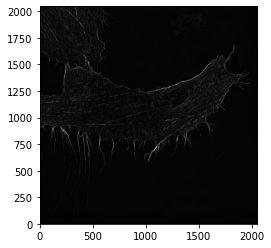

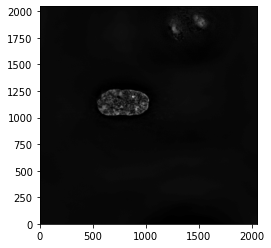

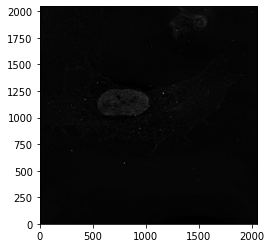

finished cropping
finished four_panel


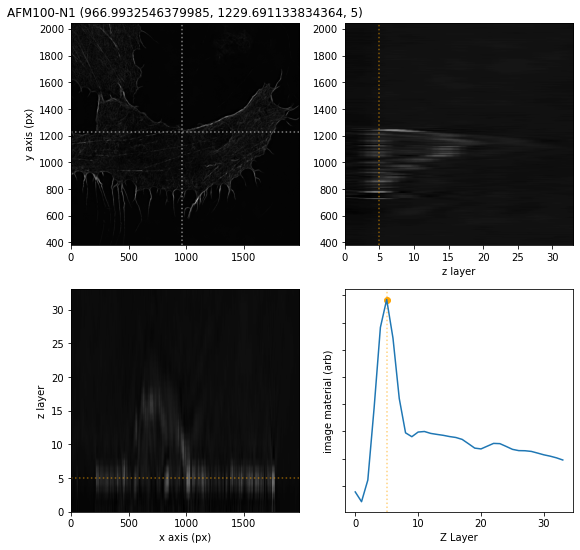

source: datasets/SR_HUVEC1/HUVEC Cell 3/
(0, 2047, 0, 2047, 0.0, 33.0)
0.0 33.0
figpath: datasets/SR_HUVEC1/HUVEC Cell 3/annotation/cyto_linear3D_00.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 3/annotation/cyto_linear3D_01.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 3/annotation/cyto_linear3D_02.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 3/annotation/cyto_linear3D_03.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 3/annotation/cyto_linear3D_04.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 3/annotation/cyto_linear3D_05.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 3/annotation/cyto_linear3D_06.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 3/annotation/cyto_linear3D_07.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 3/annotation/cyto_linear3D_08.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 3/annotation/cyto_linear3D_09.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 3/annotation/cyto_linear3D_10.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 3/annotation/cyto_linear3D_11.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 3/ann

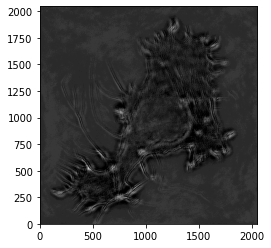

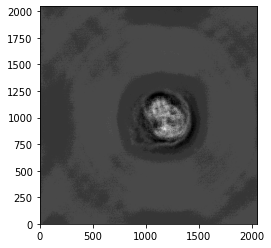

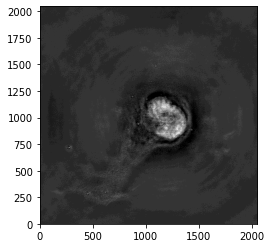

finished cropping
finished four_panel


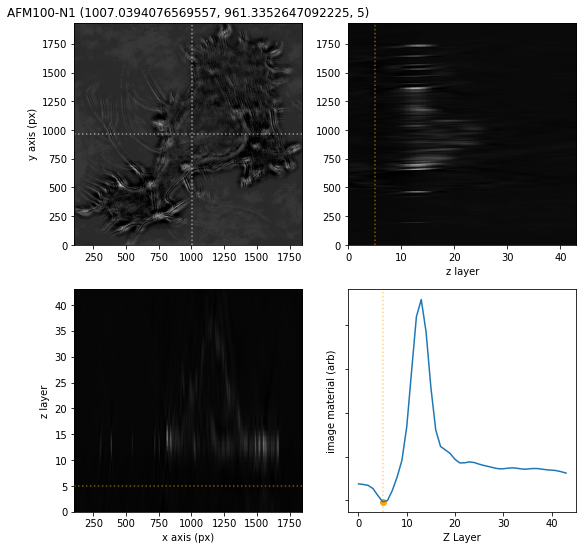

source: datasets/SR_HUVEC1/HUVEC Cell 4/
(0, 2047, 0, 2047, 0.0, 43.0)
0.0 43.0
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/cyto_linear3D_00.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/cyto_linear3D_01.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/cyto_linear3D_02.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/cyto_linear3D_03.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/cyto_linear3D_04.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/cyto_linear3D_05.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/cyto_linear3D_06.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/cyto_linear3D_07.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/cyto_linear3D_08.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/cyto_linear3D_09.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/cyto_linear3D_10.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/cyto_linear3D_11.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/ann

figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/nucleus_linear3D_22.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/nucleus_linear3D_23.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/nucleus_linear3D_24.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/nucleus_linear3D_25.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/nucleus_linear3D_26.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/nucleus_linear3D_27.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/nucleus_linear3D_28.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/nucleus_linear3D_29.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/nucleus_linear3D_30.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/nucleus_linear3D_31.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/nucleus_linear3D_32.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/nucleus_linear3D_33.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 4/annotation/nucleus_linear3D_34.png
figpath: dat

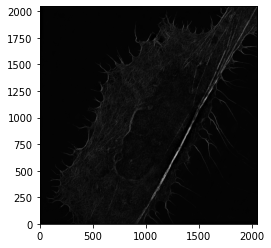

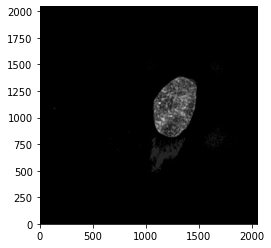

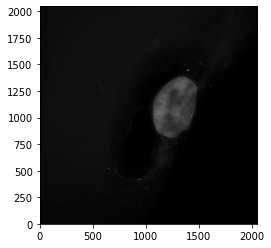

finished cropping
finished four_panel


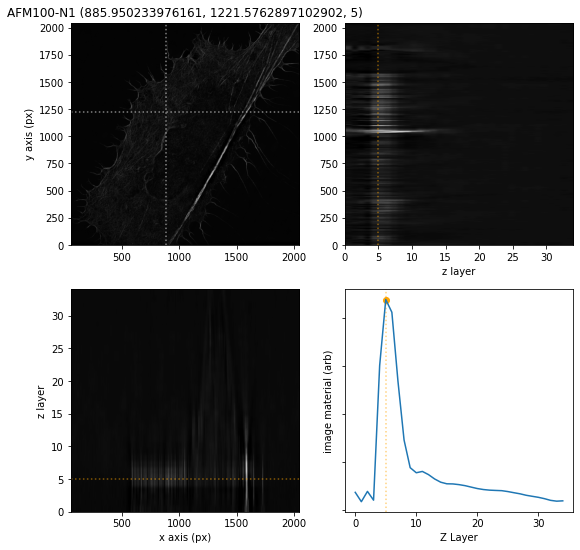

source: datasets/SR_HUVEC1/HUVEC Cell 5/
(0, 2047, 0, 2047, 0.0, 34.0)
0.0 34.0
figpath: datasets/SR_HUVEC1/HUVEC Cell 5/annotation/cyto_linear3D_00.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 5/annotation/cyto_linear3D_01.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 5/annotation/cyto_linear3D_02.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 5/annotation/cyto_linear3D_03.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 5/annotation/cyto_linear3D_04.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 5/annotation/cyto_linear3D_05.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 5/annotation/cyto_linear3D_06.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 5/annotation/cyto_linear3D_07.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 5/annotation/cyto_linear3D_08.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 5/annotation/cyto_linear3D_09.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 5/annotation/cyto_linear3D_10.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 5/annotation/cyto_linear3D_11.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 5/ann

cwd: /Users/asears/work/confocal
Found 1 files, ie: datasets/SR_HUVEC1/HUVEC Cell 6/objects/Nucleus_1.png
Results: 1 files w/ indices: [1]
cwd: /Users/asears/work/confocal
Found 1 files, ie: datasets/SR_HUVEC1/HUVEC Cell 6/objects/Cytoplasm_1.png
Results: 1 files w/ indices: [1]


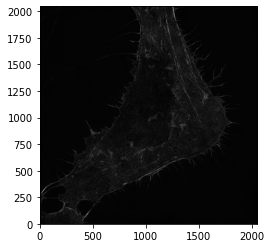

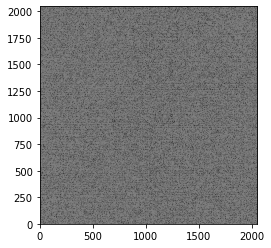

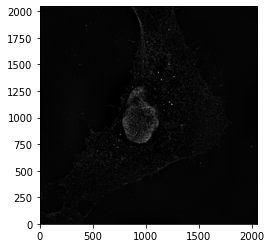

finished cropping
finished four_panel


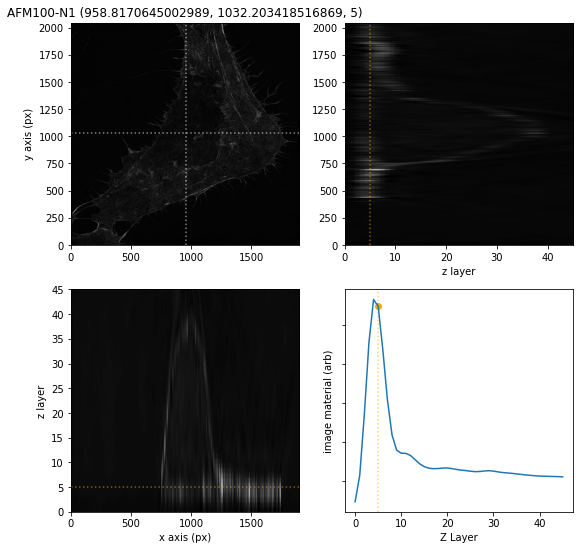

source: datasets/SR_HUVEC1/HUVEC Cell 6/
(0, 2047, 0, 2047, 0.0, 45.0)
0.0 45.0
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/cyto_linear3D_00.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/cyto_linear3D_01.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/cyto_linear3D_02.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/cyto_linear3D_03.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/cyto_linear3D_04.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/cyto_linear3D_05.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/cyto_linear3D_06.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/cyto_linear3D_07.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/cyto_linear3D_08.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/cyto_linear3D_09.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/cyto_linear3D_10.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/cyto_linear3D_11.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/ann

figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/nucleus_linear3D_18.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/nucleus_linear3D_19.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/nucleus_linear3D_20.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/nucleus_linear3D_21.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/nucleus_linear3D_22.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/nucleus_linear3D_23.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/nucleus_linear3D_24.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/nucleus_linear3D_25.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/nucleus_linear3D_26.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/nucleus_linear3D_27.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/nucleus_linear3D_28.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/nucleus_linear3D_29.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 6/annotation/nucleus_linear3D_30.png
figpath: dat

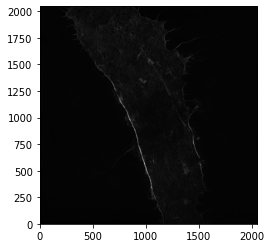

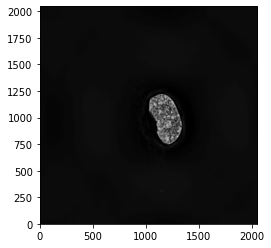

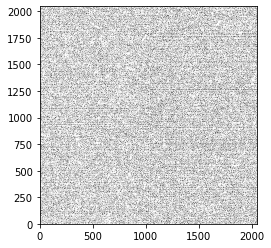

finished cropping
finished four_panel


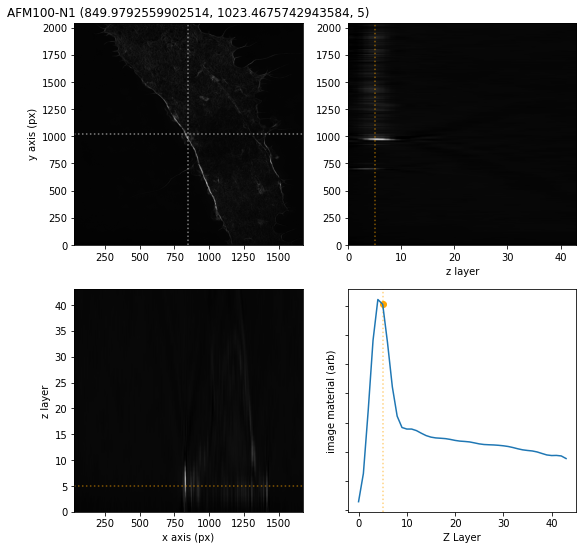

source: datasets/SR_HUVEC1/HUVEC Cell 7/
(0, 2047, 0, 2047, 0.0, 43.0)
0.0 43.0
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/cyto_linear3D_00.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/cyto_linear3D_01.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/cyto_linear3D_02.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/cyto_linear3D_03.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/cyto_linear3D_04.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/cyto_linear3D_05.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/cyto_linear3D_06.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/cyto_linear3D_07.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/cyto_linear3D_08.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/cyto_linear3D_09.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/cyto_linear3D_10.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/cyto_linear3D_11.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/ann

figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/nucleus_linear3D_22.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/nucleus_linear3D_23.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/nucleus_linear3D_24.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/nucleus_linear3D_25.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/nucleus_linear3D_26.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/nucleus_linear3D_27.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/nucleus_linear3D_28.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/nucleus_linear3D_29.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/nucleus_linear3D_30.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/nucleus_linear3D_31.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/nucleus_linear3D_32.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/nucleus_linear3D_33.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 7/annotation/nucleus_linear3D_34.png
figpath: dat

<Figure size 432x288 with 0 Axes>

In [1153]:
# cs1 = confocal.make_huvec26_obj(1)
example_z = 5
###### AFM 100x Group [unfinished]
# case = 'DECONVOLUTION'
# case = 'AFM Test 2 - LMNA(g) Actin(r).export'
# case = 'AFM Test 1 - LMNA(y) Actin(g).export'
# case = 'AFM Test - Oversampling Raw.export' # needs re-export

##### 2020.07.20 ['adopting old params' group]
# case = 'HUVEC Cyto(g) Nucleus(b).export'
# case = 'AFM Test 2.export'
# case = 'AFM Test - LMNA DAPI Adjust.export'

##### HUVEC 3D Reconstruction Files [deconvolution test group]
# case = 'HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export'
# case = 'HUVEC Tubulin AD 0.7_raw.export'
# case = 'HUVEC Tubulin AD 0.7_decon_0002.png.frames'

##### May Dataset
# case = 'HUVEC YAPr Centromere ZStack.export'

##### Test 3 (2020_07_27 regular/low-power comparison)
case = 'HUVEC Cyto(g) Nucleus(b) 2 (Low Power).export'
# case = 'HUVEC Cyto(g) Nucleus(b).export'

##### Test 4 (2020_07_29 Multiple trials)
case = 'Test4/HUVEC Nuc(b) Cyto(g)_0001.export'
case = 'Test4/HUVEC Nuc(b) Cyto(g)_0002.export'
# case = 'Test4/HUVEC Nuc(b) Cyto(g)_0003.export'
# case = 'Test4/HUVEC Nuc(b) Cyto(g)_0004.export'
# case = 'Test4/HUVEC Nuc(b) Cyto(g).export'

##### Test 5

case = 'Test5/Bead 3.export'
case = 'Test5/Cell 4 High Cyto.export'
case = 'Test5/Cell 4 High Decon 1.export'
case = 'Test5/Cell 4 High Decon 5.export'
case = 'Test5/Cell 4 High Decon 10.export'

###### SR1

case = 'SR1'
# case = 'SR2'
case = 'SR3a'
case = 'SR3b'
# case = 'SR3c'

####### SRH1_*
case = 'SRH1_1'
case = 'SRH1_2' 


if case=='DECONVOLUTION':
    globular_full = 'datasets/AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = 'datasets/AFM Test 100x/AFM Oversampling - Deconvolution/'
    desc = 'afm_100_oversampling_deconv'
    confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                    filedesc=desc)
    plt.show()

    o = dict(
        globular_full = 'datasets/AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png',
        globular_nucleus = 'datasets/AFM Test 100x/AFM Oversampling - Deconvolution/objects/Nucleus*.png',
        globular_cyto = 'datasets/AFM Test 100x/AFM Oversampling - Deconvolution/objects/Cytoplasm*.png',
        source_folder = 'datasets/AFM Test 100x/AFM Oversampling - Deconvolution/',
        nuc_color=2,
        cyto_color=1,
        other_color=0,    
    )

    cs1 = confocal.gen_load(o)
    
if case=='AFM Test 2 - LMNA(g) Actin(r).export':
    
    globular_full = 'datasets/AFM Test 100x/AFM Test 2 - LMNA(g) Actin(r).export/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = 'datasets/AFM Test 100x/AFM Test 2 - LMNA(g) Actin(r).export/'
    desc = 'afm_100_actin-r'
    confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                    filedesc=desc)
    plt.show()

    o = dict(
        globular_full = 'datasets/AFM Test 100x/AFM Test 2 - LMNA(g) Actin(r).export/Intensity.png.export/*.png',
        globular_nucleus = 'datasets/AFM Test 100x/AFM Test 2 - LMNA(g) Actin(r).export/objects/Nucleus*.png',
        globular_cyto = 'datasets/AFM Test 100x/AFM Test 2 - LMNA(g) Actin(r).export/objects/Cytoplasm*.png',
        source_folder = 'datasets/AFM Test 100x/AFM Test 2 - LMNA(g) Actin(r).export/',
        nuc_color=1,
        cyto_color=0,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)
    
# Does not work because of yellow
if case=='AFM Test 1 - LMNA(y) Actin(g).export':
    
    if False:
        confocal.export_tif('datasets/AFM Test 100x/AFM Test 1 - LMNA(y) Actin(g).export/Intensity.png.export/',
                            'datasets/AFM Test 100x/AFM Test 1 - LMNA(y) Actin(g).export/Intensity.tif.export/Intensity_40Z_CH.ome.tif')
    
    globular_full = 'datasets/AFM Test 100x/AFM Test 1 - LMNA(y) Actin(g).export/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = 'datasets/AFM Test 100x/AFM Test 2 - LMNA(g) Actin(r).export/'
    desc = 'afm_100_actin-r'
    confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                    filedesc=desc)
    plt.show()

    o = dict(
        globular_full = 'datasets/AFM Test 100x/AFM Test 1 - LMNA(y) Actin(g).export/Intensity.png.export/*.png',
        # use Test 2 segmentations
        globular_nucleus = 'datasets/AFM Test 100x/AFM Test 2 - LMNA(g) Actin(r).export/objects/Nucleus*.png',
        globular_cyto = 'datasets/AFM Test 100x/AFM Test 2 - LMNA(g) Actin(r).export/objects/Cytoplasm*.png',
        source_folder = 'datasets/AFM Test 100x/AFM Test 1 - LMNA(y) Actin(g).export/',
        nuc_color=2,
        cyto_color=1,
        other_color=0,    
    )

    cs1 = confocal.gen_load(o)
    
if case == 'AFM Test - Oversampling Raw.export':
    
    if False:
        confocal.export_tif('datasets/AFM Test 100x/AFM Test - Oversampling Raw.export/Intensity.png.export/',
                        'datasets/AFM Test 100x/AFM Test - Oversampling Raw.export/Intensity.tif.export/Intensity_161Z_CH.ome.tif')

    
    globular_full = 'datasets/AFM Test 100x/AFM Test - Oversampling Raw.export/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = 'datasets/AFM Test 100x/AFM Oversampling - Deconvolution/'
    desc = 'afm_100_oversampling_deconv'
    confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                    filedesc=desc)
    
    example_z = 130
    plt.show()

    o = dict(
        globular_full = 'datasets/AFM Test 100x/AFM Test - Oversampling Raw.export/Intensity.png.export/*.png',
        # reuse segmentation
        globular_nucleus = 'datasets/AFM Test 100x/AFM Oversampling - Deconvolution/objects/Nucleus*.png',
        globular_cyto = 'datasets/AFM Test 100x/AFM Oversampling - Deconvolution/objects/Cytoplasm*.png',
        source_folder = 'datasets/AFM Test 100x/AFM Test - Oversampling Raw.export/',
        nuc_color=2,
        cyto_color=1,
        other_color=0,    
    )

    cs1 = confocal.gen_load(o)
    
if case == 'HUVEC Cyto(g) Nucleus(b).export':
    print('Case:', case)
    
    globular_full = 'datasets/AFM Test 2020.07.20/HUVEC Cyto(g) Nucleus(b).export/Intensity.png.export/Intensity*.png' #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = 'datasets/AFM Test 2020.07.20/HUVEC Cyto(g) Nucleus(b).export/'
    desc = 'afm_20200720_gb'
    
    o = dict(
        globular_full = 'datasets/AFM Test 2020.07.20/HUVEC Cyto(g) Nucleus(b).export/Intensity.png.export/Intensity*.png',
        # reuse segmentation
        globular_nucleus = 'datasets/AFM Test 2020.07.20/HUVEC Cyto(g) Nucleus(b).export/objects/Nucleus*.png',
        globular_cyto = 'datasets/AFM Test 2020.07.20/HUVEC Cyto(g) Nucleus(b).export/objects/Cytoplasm*.png',
        source_folder = 'datasets/AFM Test 2020.07.20/HUVEC Cyto(g) Nucleus(b).export/',
        nuc_color=2,
        cyto_color=1,
        other_color=0,    
    )

    cs1 = confocal.gen_load(o)
    example_z = 6
    
if case == 'AFM Test 2.export':
    
    print('Case:', case)
    
    globular_full = 'datasets/AFM Test 2020.07.20/AFM Test 2.export/Intensity.png.export/Intensity*.png' #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = 'datasets/AFM Test 2020.07.20/AFM Test 2.export/'
    desc = 'afm_20200720_test2'
    
    o = dict(
        globular_full = 'datasets/AFM Test 2020.07.20/AFM Test 2.export/Intensity.png.export/Intensity*.png',
        # reuse segmentation
        globular_nucleus = 'datasets/AFM Test 2020.07.20/AFM Test 2.export/objects/Nucleus*.png',
        globular_cyto = 'datasets/AFM Test 2020.07.20/AFM Test 2.export/objects/Cytoplasm*.png',
        source_folder = 'datasets/AFM Test 2020.07.20/AFM Test 2.export/',
        nuc_color=2,
        cyto_color=1,
        other_color=0,    
    )

    cs1 = confocal.gen_load(o)
    example_z = 13
    
if case == 'AFM Test - LMNA DAPI Adjust.export':

    print('Case:', case)
    
    globular_full = 'datasets/AFM Test 2020.07.20/AFM Test - LMNA DAPI Adjust.export/Intensity.png.export/Intensity*.png' #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print(len(glob.glob(globular_full)))
    destdir = 'datasets/AFM Test 2020.07.20/AFM Test - LMNA DAPI Adjust.export/'
    desc = 'afm_20200720_lmna'
    
    o = dict(
        globular_full = 'datasets/AFM Test 2020.07.20/AFM Test - LMNA DAPI Adjust.export/Intensity.png.export/Intensity*.png',
        # reuse segmentation
        globular_nucleus = 'datasets/AFM Test 2020.07.20/AFM Test - LMNA DAPI Adjust.export/objects/Nucleus*.png',
        globular_cyto = 'datasets/AFM Test 2020.07.20/AFM Test - LMNA DAPI Adjust.export/objects/Cytoplasm*.png',
        source_folder = 'datasets/AFM Test 2020.07.20/AFM Test - LMNA DAPI Adjust.export/',
        nuc_color=1,
        cyto_color=2,
        other_color=0,    
    )

    cs1 = confocal.gen_load(o)
    example_z = 20
    
if case == 'HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export':

    print('Case:', case)
    
    base_folder = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    objects_folder_base = base_folder
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*_CH.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'decon_cellSens'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=2,
        cyto_color=1,
        other_color=0,    
    )

    cs1 = confocal.gen_load(o)
    example_z = 20
    
if case == 'HUVEC Tubulin AD 0.7_raw.export':
    
    
    print('Case:', case)
    
    base_folder = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7_raw.export/'
    
    objects_folder_base = base_folder
    objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*_CH.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'decon_cellSens'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=2,
        cyto_color=1,
        other_color=0,    
    )

    cs1 = confocal.gen_load(o)
    example_z = 20

if case == 'HUVEC Tubulin AD 0.7_decon_0002.png.frames':
    
    
    print('Case:', case)
    
    base_folder = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7_decon_0002.png.frames/'
    
    objects_folder_base = base_folder
    objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'HUVEC Tubulin AD 0.7_0002_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'decon_cellSens'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=1,
        cyto_color=0,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)
    example_z = 20

if case == 'HUVEC YAPr Centromere ZStack.export':
    
    
    print('Case:', case)
    
    base_folder = 'datasets/HUVEC YAPr Centromere ZStack.export/'
    
    objects_folder_base = base_folder
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*_CH.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'decon_cellSens'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=2,
        cyto_color=1,
        other_color=0,    
    )

    cs1 = confocal.gen_load(o)
    example_z = 20
    
if case == 'HUVEC Cyto(g) Nucleus(b).export':
    example_z = 10
    
    print('Case:', case)
    
    base_folder = 'datasets/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'reg'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=2,
        cyto_color=0,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)

if case == 'HUVEC Cyto(g) Nucleus(b) 2 (Low Power).export':
    example_z = 19
    
    print('Case:', case)
    
    base_folder = 'datasets/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b) 2 (Low Power).export'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'reg'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=2,
        cyto_color=0,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)
    
if case == 'Test4/HUVEC Nuc(b) Cyto(g)_0001.export':
    example_z = 15
    
    print('Case:', case)
    
    base_folder = 'datasets/20200728 AFM Test 4/HUVEC Nuc(b) Cyto(g)_0001.export/'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'reg'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=2,
        cyto_color=0,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)
    
if case == 'Test4/HUVEC Nuc(b) Cyto(g)_0002.export':
    example_z = 15
    
    print('Case:', case)
    
    base_folder = 'datasets/20200728 AFM Test 4/HUVEC Nuc(b) Cyto(g)_0002.export/'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'reg'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=2,
        cyto_color=0,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)
    
if case == 'Test4/HUVEC Nuc(b) Cyto(g)_0003.export':
    example_z = 15
    
    print('Case:', case)
    
    base_folder = 'datasets/20200728 AFM Test 4/HUVEC Nuc(b) Cyto(g)_0003.export/'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'reg'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=2,
        cyto_color=0,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)
    
if case == 'Test4/HUVEC Nuc(b) Cyto(g)_0004.export':
    example_z = 5
    
    print('Case:', case)
    
    base_folder = 'datasets/20200728 AFM Test 4/HUVEC Nuc(b) Cyto(g)_0004.export/'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'reg'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=2,
        cyto_color=0,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)
    
if case == 'Test4/HUVEC Nuc(b) Cyto(g).export':
    example_z = 10
    
    print('Case:', case)
    
    base_folder = 'datasets/20200728 AFM Test 4/HUVEC Nuc(b) Cyto(g).export/'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'reg'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=2,
        cyto_color=0,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)
    

if case == 'Test5/Bead 3.export':
    
    example_z = 40
    
    print('Case:', case)
    
    base_folder = 'datasets/AFM Test 5/Bead 3.export'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'reg'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=0, # 2 0 2
        cyto_color=0,
        other_color=0,    
    )

    cs1 = confocal.gen_load(o)
    
if case == 'Test5/Cell 4 High Cyto.export':
    
    example_z = 13
    
    print('Case:', case)
    
    base_folder = 'datasets/AFM Test 5/Cell 4 High Cyto.export'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'reg'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=2, # 2 0 2
        cyto_color=0,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)

if case == 'Test5/Cell 4 High Decon 1.export':
    
    example_z = 13
    
    print('Case:', case)
    
    base_folder = 'datasets/AFM Test 5/Cell 4 High Decon 1.export'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'reg'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=2, # 2 0 2
        cyto_color=0,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)
    
if case == 'Test5/Cell 4 High Decon 5.export':
    
    example_z = 13
    
    print('Case:', case)
    
    base_folder = 'datasets/AFM Test 5/Cell 4 High Decon 5.export'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'reg'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=2, # 2 0 2
        cyto_color=0,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)
    
if case == 'Test5/Cell 4 High Decon 10.export':
    
    example_z = 13
    
    print('Case:', case)
    
    base_folder = 'datasets/AFM Test 5/Cell 4 High Decon 10.export'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'reg'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=2, # 2 0 2
        cyto_color=0,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)
    
if case == 'SR1':
    
    example_z = 13
    
    print('Case:', case)
    
    base_folder = 'datasets/SR1/Export - Original Channel tiff Stack/'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'sr1'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=0, # 2 0 2
        cyto_color=1,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)

if case == 'SR2':
    example_z = 2
    
    print('Case:', case)
    
    base_folder = 'datasets/SR2/ome/'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'sr2'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=0, # 2 0 2
        cyto_color=1,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)
    
if case == 'SR3a':
    example_z = 2
    
    print('Case:', case)
    
    base_folder = 'datasets/SR3/HUVEC Geometry 1_Reconstructed_crop_crop_crop/'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'sr3a'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=0, # 2 0 2
        cyto_color=1,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)

if case == 'SR3b':
    example_z = 2
    
    print('Case:', case)
    
    base_folder = 'datasets/SR3/HUVEC Geometry 2_Reconstructed_crop/'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'sr3B'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=0, # 2 0 2
        cyto_color=1,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)


if case == 'SRH1_1':
    
    example_z = 15
    print('Case:', case)
    
    base_folder = 'datasets/SR_HUVEC1/HUVEC Cell 1/'
    
    objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
#     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'
    
    globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
    print('Raw png count:', globular_full, len(glob.glob(globular_full)))
    destdir = base_folder
    desc = 'srh1_1'
    # 'index_re': r'_Z(\d+)',
    o = dict(
        globular_full=globular_full,
        # reuse segmentation
        globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
        globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
        source_folder = base_folder, # diagnostics folder will be created here
        
        nuc_color=0, # 2 0 2
        cyto_color=1,
        other_color=2,    
    )

    cs1 = confocal.gen_load(o)

if True:
    for celln in range(3,8):
        case = 'SRH1_%d' % celln

        example_z = 15
        print('Case:', case)

        base_folder = 'datasets/SR_HUVEC1/HUVEC Cell %d/' % celln

        objects_folder_base = base_folder # 'dataset/20200724 AFM Test 3/HUVEC Cyto(g) Nucleus(b).export'
    #     objects_folder_base = 'datasets/HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/'

        globular_full = os.path.join(base_folder, 'Intensity.png.export/Intensity_Z*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
        print('Raw png count:', globular_full, len(glob.glob(globular_full)))
        destdir = base_folder
        desc = 'srh1_%d' % celln
        # 'index_re': r'_Z(\d+)',
        o = dict(
            globular_full=globular_full,
            # reuse segmentation
            globular_nucleus = os.path.join(objects_folder_base,'objects/Nucleus*.png'),
            globular_cyto = os.path.join(objects_folder_base,'objects/Cytoplasm*.png'),
            source_folder = base_folder, # diagnostics folder will be created here

            nuc_color=0, # 2 0 2
            cyto_color=1,
            other_color=2,    
        )

        cs1 = confocal.gen_load(o)
        
        example_z=5
        res = cs1.render_image('cyto_linear3D',sliced=example_z, series=False, do_plot=True)
        plt.show()
        res = cs1.render_image('other_linear3D',sliced=example_z, series=False, do_plot=True)
        plt.show()
        res = cs1.render_image('nucleus_linear3D',sliced=example_z, series=False, do_plot=True)
        plt.show()


        cs1.create_cropped('cyto_linear3D', cropped_name='cyto_test', debug=False, series=False, window=cs1.data['cyto_linear_mask2D'][cyto_id]['extent'])
        cs1.create_cropped('nucleus_linear3D', cropped_name='nucleus_test', debug=False, series=False, window=cs1.data['cyto_linear_mask2D'][cyto_id]['extent'])
        cs1.create_cropped('other_linear3D', cropped_name='other_test', debug=False, series=False, window=cs1.data['cyto_linear_mask2D'][cyto_id]['extent'])
        print('finished cropping')
        if True:
            cs1.four_panel('cyto_test',desc='AFM100-N1', center_on='nucleus_test', z=example_z,upscale=1) # upscale=1.0, z=13,
            print('finished four_panel')
            plt.show()
        #     cs1.four_panel('cyto_test',desc='AFM100-N1')
        
        if True:
            confocal.export_set_for_annotation(cs1,'cyto_linear3D', use_log=False, do_show=False)
            confocal.export_set_for_annotation(cs1,'other_linear3D', use_log=False, do_show=False)
            confocal.export_set_for_annotation(cs1,'nucleus_linear3D', use_log=False, do_show=False)
#         break



    
print(cs1.data.keys())

In [ ]:
# !ls "datasets/SR1/Export - Original Channel tiff Stack/objects"

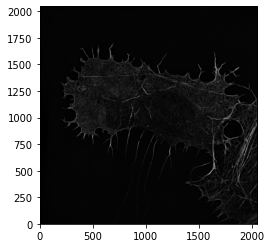

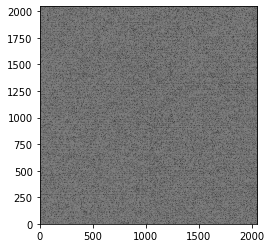

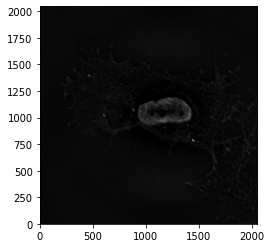

In [959]:
example_z=5
res = cs1.render_image('cyto_linear3D',sliced=example_z, series=False, do_plot=True)
plt.show()
res = cs1.render_image('other_linear3D',sliced=example_z, series=False, do_plot=True)
plt.show()
res = cs1.render_image('nucleus_linear3D',sliced=example_z, series=False, do_plot=True)
plt.show()
# from scipy.ndimage import gaussian_filter

# plt.imshow(gaussian_filter(res,0))

In [ ]:
if True:
    ww=np.array(cs1.get_weights('cyto_linear3D'))
    plt.plot(ww[0],ww[1])

finished cropping
finished four_panel


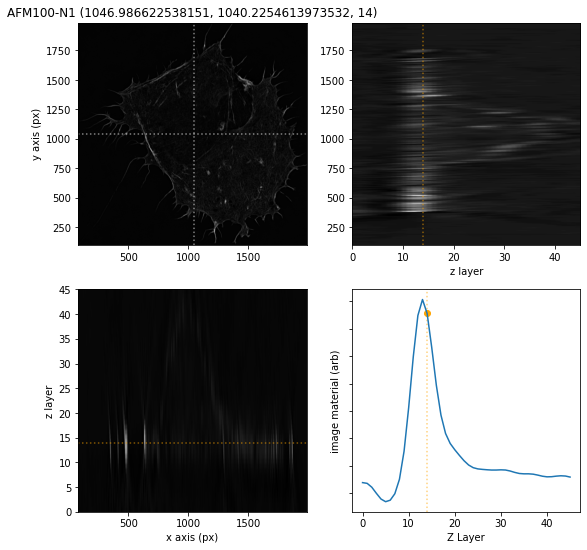

CPU times: user 6min 45s, sys: 2min 12s, total: 8min 57s
Wall time: 9min 7s


In [878]:
%%time
cyto_id = 1 #6 #3

if False:
    cs1.create_cropped('cyto_linear3D', cropped_name='cyto_test', debug=False, series=False,
                       mask=cs1.data['cyto_linear_mask2D'][cyto_id])
    cs1.four_panel('cyto_test',desc='AFM100-N1')

    plt.show()
    
if True:
    
    cs1.create_cropped('cyto_linear3D', cropped_name='cyto_test', debug=False, series=False, window=cs1.data['cyto_linear_mask2D'][cyto_id]['extent'])
    cs1.create_cropped('nucleus_linear3D', cropped_name='nucleus_test', debug=False, series=False, window=cs1.data['cyto_linear_mask2D'][cyto_id]['extent'])
    cs1.create_cropped('other_linear3D', cropped_name='other_test', debug=False, series=False, window=cs1.data['cyto_linear_mask2D'][cyto_id]['extent'])
    print('finished cropping')
    if True:
        cs1.four_panel('cyto_test',desc='AFM100-N1', center_on='nucleus_test', z=example_z,upscale=1) # upscale=1.0, z=13,
        print('finished four_panel')
        plt.show()
    #     cs1.four_panel('cyto_test',desc='AFM100-N1')

#     plt.show()




In [962]:
%%time
if True:
    confocal.export_set_for_annotation(cs1,'cyto_linear3D', use_log=False, do_show=False)
    confocal.export_set_for_annotation(cs1,'other_linear3D', use_log=False, do_show=False)
    confocal.export_set_for_annotation(cs1,'nucleus_linear3D', use_log=False, do_show=False)


source: datasets/SR_HUVEC1/HUVEC Cell 2/
(0, 2047, 0, 2047, 0.0, 43.0)
0.0 43.0
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/cyto_linear3D_00.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/cyto_linear3D_01.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/cyto_linear3D_02.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/cyto_linear3D_03.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/cyto_linear3D_04.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/cyto_linear3D_05.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/cyto_linear3D_06.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/cyto_linear3D_07.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/cyto_linear3D_08.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/cyto_linear3D_09.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/cyto_linear3D_10.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/cyto_linear3D_11.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/ann

figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/nucleus_linear3D_22.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/nucleus_linear3D_23.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/nucleus_linear3D_24.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/nucleus_linear3D_25.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/nucleus_linear3D_26.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/nucleus_linear3D_27.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/nucleus_linear3D_28.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/nucleus_linear3D_29.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/nucleus_linear3D_30.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/nucleus_linear3D_31.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/nucleus_linear3D_32.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/nucleus_linear3D_33.png
figpath: datasets/SR_HUVEC1/HUVEC Cell 2/annotation/nucleus_linear3D_34.png
figpath: dat

<Figure size 432x288 with 0 Axes>

In [465]:
# cs1.four_panel('cyto_test',desc='AFM100-N1', upscale=1, z=example_z, center_on='nucleus_test')


  0%|          | 0/1 [00:00<?, ?it/s]

datasets/SR3/HUVEC Geometry 2_Reconstructed_crop/diagnostic/
Cell: 1


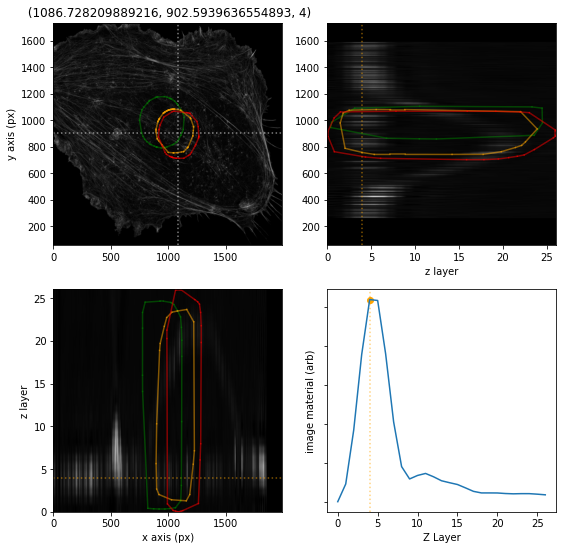

100%|██████████| 1/1 [05:53<00:00, 353.64s/it]


In [466]:
diagnostic_folder=os.path.join(cs1.data['source_folder'],'diagnostic/')
os.makedirs(diagnostic_folder,exist_ok=True)

print(diagnostic_folder)
# raise Exception()

for cyto_id in tqdm(cs1.data['cyto_linear_mask2D']):
#     cyto_id=1
    if True:
        cs1.create_cropped('cyto_linear3D', cropped_name='cyto_test_%02d' % cyto_id, debug=False, series=False,
                           mask=cs1.data['cyto_linear_mask2D'][cyto_id])
#         print('created ','green_test_%02d' % cyto_id)
        cs1.create_cropped('nucleus_linear3D', cropped_name='nucleus_test_%02d' % cyto_id, debug=False, series=False,
                           mask=cs1.data['cyto_linear_mask2D'][cyto_id])
        cs1.create_cropped('other_linear3D', cropped_name='other_test_%02d' % cyto_id, debug=False, series=False,
                   mask=cs1.data['cyto_linear_mask2D'][cyto_id])

        cs1.find_envelope3D('cyto_test_%02d' % cyto_id, 'cyto_test_env_%02d' % cyto_id, n_angle=320, max_r=200, n_r=201, pct=0.95)
        cs1.find_envelope3D('nucleus_test_%02d' % cyto_id, 'nucleus_test_env_%02d' % cyto_id, n_angle=320, max_r=200, pct=0.95)
        cs1.find_envelope3D('other_test_%02d' % cyto_id, 'other_test_env_%02d' % cyto_id, n_angle=320, max_r=200, pct=0.90)

    print('Cell:', cyto_id)
    save_four_to = os.path.join(diagnostic_folder,'four_z%02d' % cyto_id)
    cs1.four_panel('cyto_test_%02d' % cyto_id, envelopes=[
        {'target':'cyto_test_env_%02d' % cyto_id,'color':'green'},
        {'target':'other_test_env_%02d' % cyto_id,'color':'orange'}, 
        'nucleus_test_env_%02d' % cyto_id
    ], do_save=save_four_to,upscale=1, center_on='nucleus_test_%02d' % cyto_id, env_alpha=0.5)
    plt.show()

    if False:
        for layer in cs1.data['full_image']:
            print('layer:', layer)
            save_four_to = os.path.join(diagnostic_folder,'four_z%02d_%02d' % (cyto_id,layer))
            cs1.four_panel('cyto_test_%02d' % cyto_id, envelopes=[
                {'target':'cyto_test_env_%02d' % cyto_id,'color':'green'},
                {'target':'other_test_env_%02d' % cyto_id,'color':'orange'}, 
                'nucleus_test_env_%02d' % cyto_id
            ], do_save=save_four_to,upscale=1, center_on='nucleus_test_%02d' % (cyto_id,), env_alpha=0.5, z=layer)
            plt.show()

    
    
    
#     break

In [ ]:
cs1.create_cropped('cyto_linear3D', cropped_name='cyto_test', debug=False, series=False, window=cs1.data['cyto_linear_mask2D'][cyto_id]['extent'])
for f in tqdm(cs1.data['full_image']):
    print('layer', f)
    cs1.four_panel('cyto_test',desc='Group 1 - Nucleus 5', z=f)

    plt.show()
#     break

In [ ]:
cyto_id=11
cs1.create_cropped('green_linear3D', cropped_name='green_test', debug=False, series=False,
                   mask=cs1.data['cyto_linear_mask2D'][cyto_id])
cs1.create_cropped('blue_linear3D', cropped_name='blue_test', debug=False, series=False,
                   mask=cs1.data['nucleus_linear_mask2D'][cyto_id])
cs1.find_envelope3D('green_test', 'green_cropped_env', n_angle=320, max_r=200, pct=0.95)
cs1.find_envelope3D('blue_test', 'blue_cropped_env', n_angle=320, max_r=200, pct=0.95)

cs1.four_panel('green_test',
               envelopes=[{'target': 'green_cropped_env', 'color': 'lightgreen'}, 'blue_cropped_env'], desc='Group 1 - Nucleus 2', do_save='images/first_fitting.png' )
# plt.show()


In [ ]:
for f in cs1.data['full_image']:
#     cs1.render_image('green_test', sliced=f, do_plot=True)
#     plt.title(f)

    cs1.four_panel('green_test', z=f,
               envelopes=[{'target': 'green_cropped_env', 'color': 'lightgreen'}, 'blue_cropped_env'], desc='Group 1 - Nucleus 5' )

    plt.show()
    break

## Improve Contours

Cell: 1
Cannot do XZ contour for env 0
Cannot do YZ contour for env 0


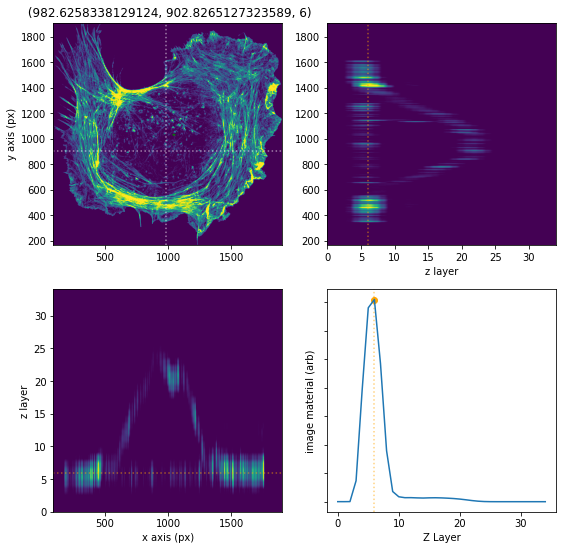

CPU times: user 2min 26s, sys: 14.7 s, total: 2min 41s
Wall time: 2min 41s


In [155]:
%%time
cyto_id = 1
cs1.find_envelope3D('cyto_test_%02d' % cyto_id, 'cyto_test_env_%02d' % cyto_id, n_angle=32, max_r=2000, n_r=201, pct=0.95)
# cs1.find_envelope3D('nucleus_test_%02d' % cyto_id, 'nucleus_test_env_%02d' % cyto_id, n_angle=320, max_r=200, pct=0.95)
# cs1.find_envelope3D('other_test_%02d' % cyto_id, 'other_test_env_%02d' % cyto_id, n_angle=320, max_r=200, pct=0.90)

print('Cell:', cyto_id)
save_four_to = None # os.path.join(diagnostic_folder,'four_z%02d' % cyto_id)
cs1.four_panel('cyto_test_%02d' % cyto_id, envelopes=[
    {'target':'cyto_test_env_%02d' % cyto_id,'color':'green'},
#     {'target':'other_test_env_%02d' % cyto_id,'color':'orange'}, 
#     'nucleus_test_env_%02d' % cyto_id
], do_save=save_four_to,upscale=1, center_on='nucleus_test_%02d' % cyto_id, env_alpha=0.5)
plt.show()


In [221]:
%%time 
def find_envelope3D(self, target, result, n_angle=101, n_r=1001, max_r=2000, pct=0.95, force_int_z=True, debug=False, x0=None):

    if x0 is None:
        x0 = self.getCoM(target)
    if force_int_z: x0 = [x0[0], x0[1], int(x0[2])]
    if debug: print('x0:', x0)
#     return
    envelope = np.zeros((n_angle, n_angle, 3))

    rspace = np.linspace(0, max_r, n_r)
    phi_space = np.linspace(-np.pi / 2, np.pi / 2, envelope.shape[0])
    theta_space = np.linspace(0, 2 * np.pi, envelope.shape[1])

    def get_pct(x, pct=0.95):
        x_min = np.repeat(np.expand_dims(np.min(x, 0) * pct, 0), np.shape(x)[0], 0)
        return np.argmin(x_min - x < 0, 0)

    for i, phi in tqdm(enumerate(phi_space)):
        x0_repeats = np.array([[x0]]).repeat(len(theta_space), 1)
        x_nor = np.array([[[np.cos(th0) * np.cos(phi),
                            np.sin(th0) * np.cos(phi),
                            np.sin(phi)] for th0 in theta_space]])

        r_repeats = np.expand_dims(np.expand_dims(rspace, 1), 1)
        radial_xy = x0_repeats + x_nor * r_repeats

        indata = self.data[target]['fxn'](radial_xy)

        envelope[i] = np.array([radial_xy[arg, i, :]
                                for arg, i in zip(get_pct(list(accumulate(-indata)), pct=pct),
                                                  range(len(np.argmin(list(accumulate(-indata)), 0))))])


    self.data[result] = envelope


# res = find_radial_envelope(cs1, 'cyto_test_01')
# res = find_radial_envelope(cs1, 'nucleus_test_01')
res = find_envelope3D(cs1, 'cyto_test_01', 'junk', debug=True, x0=[1052.1966173110545, 1031.1895287248226, 6])

3it [00:00, 26.06it/s]

x0: [1052.1966173110545, 1031.1895287248226, 6]


101it [00:04, 24.95it/s]

CPU times: user 3.88 s, sys: 174 ms, total: 4.05 s
Wall time: 4.05 s


In [222]:
cs1.data['junk'].shape
for _ in cs1.data['junk']:
    print(_)

[[1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.19661731 1031.18952872    6.        ]
 [1052.196

 [1056.66047501 1031.18952872   21.36469897]]
[[1056.17565551 1031.18952872   21.49733058]
 [1056.16780378 1031.4393746    21.49733058]
 [1056.1442796  1031.68823445   21.49733058]
 [1056.1051758  1031.93512613   21.49733058]
 [1056.0506467  1032.17907528   21.49733058]
 [1055.98090751 1032.41911915   21.49733058]
 [1055.89623346 1032.65431038   21.49733058]
 [1055.79695871 1032.88372079   21.49733058]
 [1055.68347506 1033.10644499   21.49733058]
 [1055.55623038 1033.32160401   21.49733058]
 [1055.41572683 1033.52834869   21.49733058]
 [1055.26251893 1033.72586313   21.49733058]
 [1055.09721132 1033.91336781   21.49733058]
 [1054.92045639 1034.09012274   21.49733058]
 [1054.73295171 1034.25543035   21.49733058]
 [1054.53543728 1034.40863825   21.49733058]
 [1054.32869259 1034.54914179   21.49733058]
 [1054.11353358 1034.67638647   21.49733058]
 [1053.89080937 1034.78987013   21.49733058]
 [1053.66139897 1034.88914487   21.49733058]
 [1053.42620773 1034.97381893   21.49733058]
 [1053.18

cannot hull slice 0
cannot hull slice 1


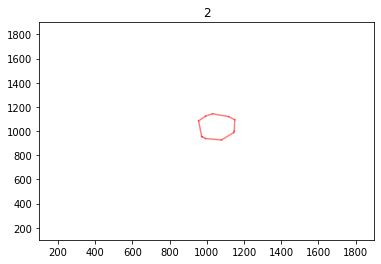

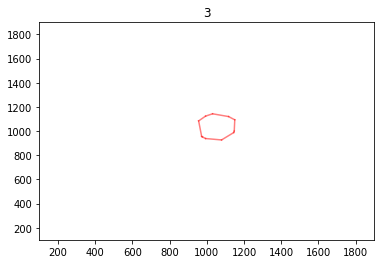

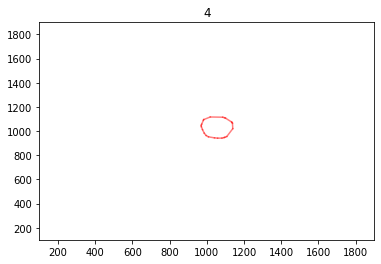

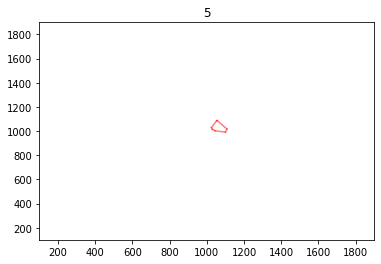

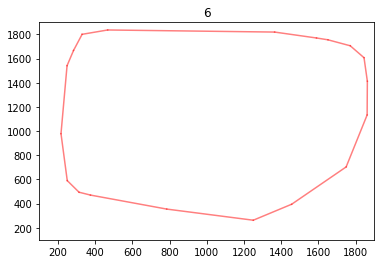

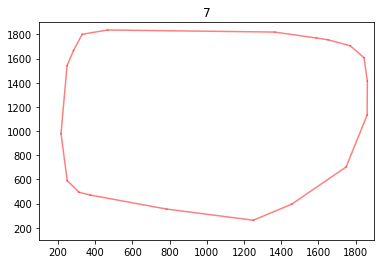

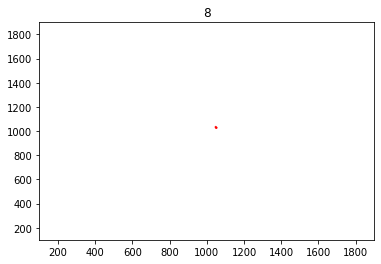

cannot hull slice 9
cannot hull slice 10
cannot hull slice 11


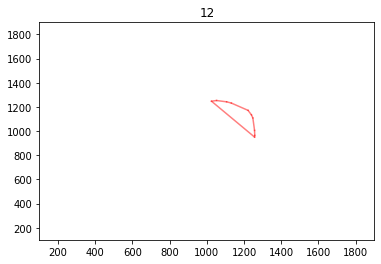

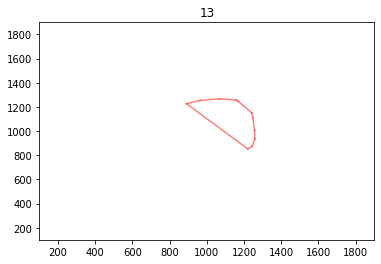

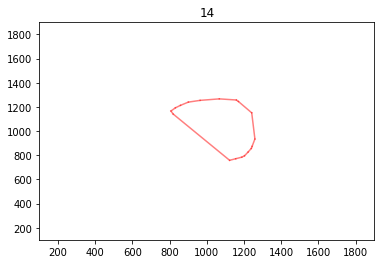

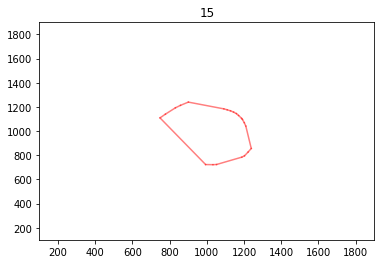

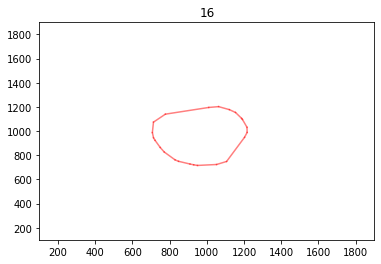

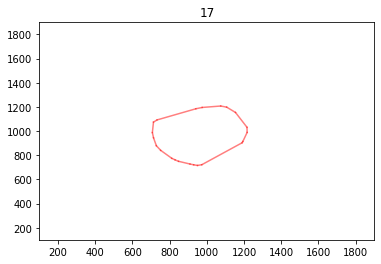

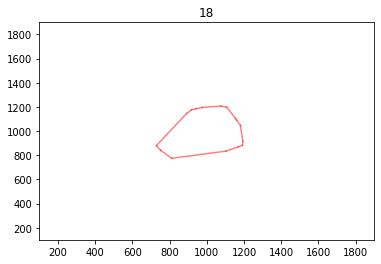

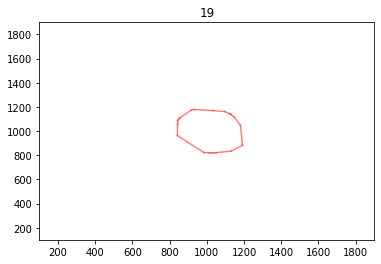

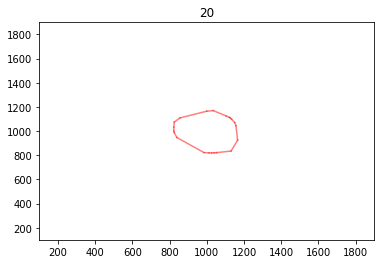

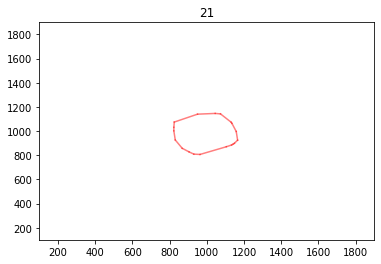

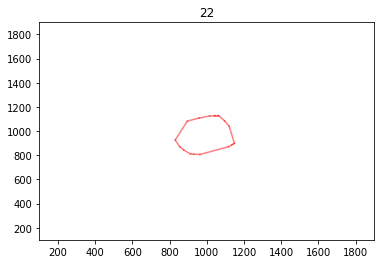

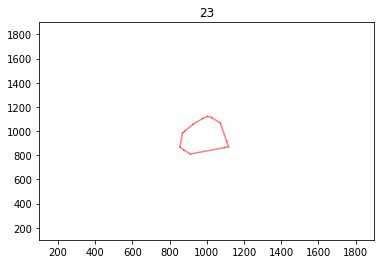

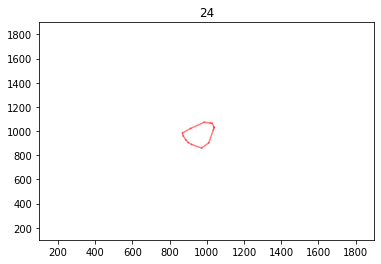

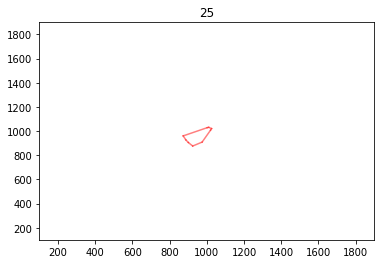

cannot hull slice 26
cannot hull slice 27
cannot hull slice 28
cannot hull slice 29
cannot hull slice 30
cannot hull slice 31
cannot hull slice 32
cannot hull slice 33


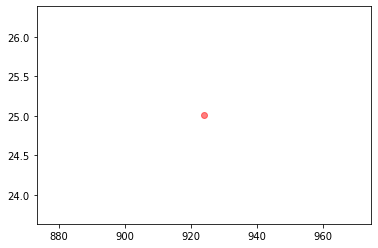

In [223]:
env = cs1.data['junk']
for slice_xy in range(34):
#     slice_xy = 5
    thickness = 1
    applies = abs(env[:, :, 2] - slice_xy) < thickness

    res = env[applies]
    plt.scatter(res.T[0], res.T[2], color='red', alpha=0.5)



    try:
        hull = ConvexHull(res[:, [0,1]])
        for simplex in hull.simplices:
            plt.plot(res[simplex, 0], res[simplex, 1], color='red', alpha=0.5)
        plt.title(slice_xy)
        plt.xlim(100,1900)
        plt.ylim(100,1900)
        plt.show()
        
    except:
        print('cannot hull slice', slice_xy)

[1182.62583381 1199.77689159 1210.27457988 1195.13527997 1158.50324176
 1135.02519159 1096.23878316 1059.79049487  982.62583381  982.62583381
  975.37796459  946.62120893  911.7048564   982.62583381  830.83894367
  982.62583381  982.62583381  725.03158959  710.76212493  723.4689337
  743.40407986  769.01863398  817.02953395  813.5878167   832.92368418
  868.78566621  882.62583381  911.7048564   950.62172281  975.37796459
 1001.91170265 1016.01192948 1059.79049487 1084.87748822 1079.6072433
 1094.54782069 1159.71703894 1191.30385104 1199.77689159 1182.62583381]


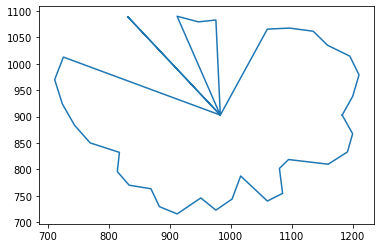

In [174]:
dd = np.array([r for r in res]).T[0]
print(dd)
plt.plot(np.array([r for r in res]).T[0],np.array([r for r in res]).T[1])
# res

### Generate contours from envelopes

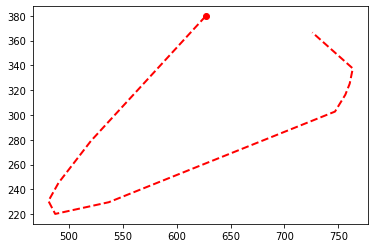

In [10]:
envelope_target = 'green_cropped_env'
env = cs1.data[envelope_target]
slice_xy = 40
thickness = 1
scatter_too = False

applies = abs(env[:, :, 2] - slice_xy) < thickness

res = env[applies]
if scatter_too:
    plt.scatter(res.T[0], res.T[1], color='red', alpha=0.5)
# print('res:', res)

if not len(res):
    print('Cannot do XY contour for env %d' % nenv)
hull = ConvexHull(res[:, [0,1]])
# for simplex in hull.simplices:
#     print(res[simplex,0], res[simplex,1])
#     plt.plot(res[simplex, 0], res[simplex, 1], alpha=0.75)
    
    
plt.plot(res[hull.vertices,0], res[hull.vertices,1], 'r--', lw=2)
plt.plot(res[hull.vertices[0],0], res[hull.vertices[0],1], 'ro')
plt.show()



In [11]:
res[hull.vertices,0]

array([626.85454842, 520.4282676 , 490.43871396, 481.05736947,
       487.35152283, 537.05412682, 746.88587092, 756.47668883,
       760.53490274, 763.40397011, 725.87545792])

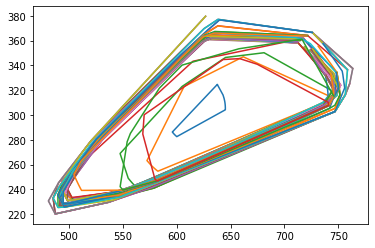

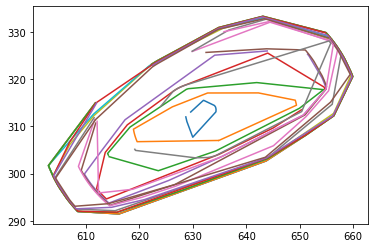

In [12]:
# produceds contour from an envelope, found using complex hull
def produce_envelope_contour(self, target, thickness=1, debug=False):
    
    env = cs1.data[target]
    
    contours = {}
    if debug: print('range:', int(np.min(env[:,:,2])), int(np.max(env[:,:,2])+1))
    for slice_xy in np.arange(int(np.min(env[:,:,2])), int(np.max(env[:,:,2])+1)):
        applies = abs(env[:, :, 2] - slice_xy) < thickness

        res = env[applies]
#         if scatter_too:
#             plt.scatter(res.T[0], res.T[1], color='red', alpha=0.5)
        # print('res:', res)

        if not len(res):
            print('Cannot do XY contour for level', slice_xy)

        hull = ConvexHull(res[:, [0,1]])

        vertices = np.array([res[hull.vertices,0], res[hull.vertices,1]])
        if debug: print(slice_xy,np.shape(res[hull.vertices,0]))
        contours[slice_xy] = vertices
        plt.plot(vertices[0], vertices[1])
#         break

    return contours


cyto_contour = produce_envelope_contour(cs1, 'green_cropped_env')
plt.show()
nucleus_contour = produce_envelope_contour(cs1, 'blue_cropped_env')
plt.show()

In [913]:
importlib.reload(confocal)

<module 'confocal' from '/Users/asears/work/confocal/confocal.py'>

Moving to mean
max level: 4 57
max level: 30 47
Wrote meta (for AFM-C HUVEC 20200626 Group #1, Cell #2) to export_contours/test_reply2/file.txt


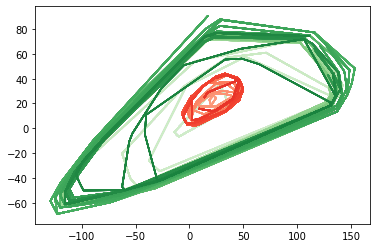

In [60]:
# X/Y Pixel scale
#     0.397 um/pixel

# Z-slice distance:
#     Group 1 - 0.35 um
#     Group 2 - 0.3 um
#     Group 3 - 0.35 um
#     Group 4 - 0.3 um
#     Group 5 - 0.3 um

# nuc_mean = [np.mean()]
cyto_meta = confocal.export_contours(cyto_contour, ncvar='NCY', filen='C_Cyto_Z', scaling=(0.397, 0.397, 0.35),
            export_dir='export_contours/test_reply2/', color_range='green', move_to_mean=None)
nuc_meta = confocal.export_contours(nucleus_contour, ncvar='NC', filen='C_Nuc_Z', scaling=(0.397, 0.397, 0.35),
            export_dir='export_contours/test_reply2/', color_range='red', move_to_mean=cyto_meta['move_to_mean'])

meta_fname = 'export_contours/test_reply2/file.txt'
confocal.export_contours_meta('AFM-C HUVEC 20200626 Group #1, Cell #2', meta_fname, cyto_meta, nuc_meta)

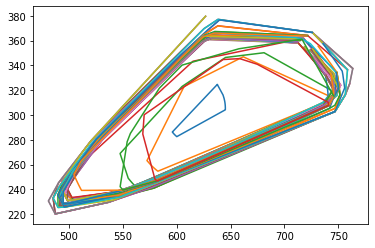

In [141]:
for _ in cyto_contour:
    plt.plot(cyto_contour[_][0],cyto_contour[_][1])

Moving to mean


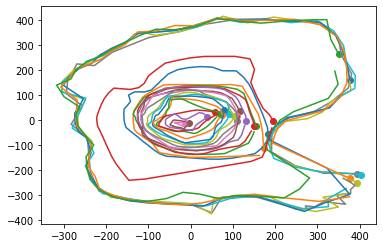

{10: array([[ 183.04456053,  181.74932806,  176.3269366 ,  170.7963306 ,
          164.86385607,  158.79120657,  152.56570239,  145.95385436,
          137.22351295,  124.79496545,  107.75140065,   74.87535626,
           51.11917535,   23.0987736 ,   -4.52233092,  -30.3582069 ,
          -52.96379374,  -69.62169925,  -82.64231762,  -93.54473278,
         -109.03169065, -132.68670547, -147.20799148, -142.62339142,
         -149.54147959, -157.50088237, -158.50987149, -157.93752139,
         -158.18604007, -156.14411198, -153.22288749, -143.77060331,
         -134.59247838, -125.2449173 , -116.75481253, -107.3839042 ,
          -97.39756994,  -86.65834386,  -73.69322011,  -57.41994909,
          -38.78176758,  -20.04062566,   -0.48235008,   20.54397384,
           43.95445605,   69.46781981,   96.03416757,  123.37665263,
          152.20185263,  168.92689972,  179.63518276],
        [ -58.2541597 ,  -30.5782625 ,   -4.15562875,   20.702744  ,
           44.66300529,   68.41294831,   92.

In [732]:
def heal_contour(contours, move_to_mean=None, connect=False):

    if move_to_mean is None:
        print('Moving to mean')
        xm = np.mean(np.hstack([contours[_][0] for _ in contours]))
        ym = np.mean(np.hstack([contours[_][1] for _ in contours]))
    else:
        xm, ym = move_to_mean
    
    new_contours = {}
    for level,c in contours.items():

        # re-center contour
        
        c = np.array([[_-xm for _ in c[0]], [_-ym for _ in c[1]]])

        # Connect beginning to end
        
        if connect:
            c = np.hstack([c, [[c[0][0]],[c[1][0]]]])        

        # Verify direction of rotation; reverse if necessary

        dx = c[0][1:]-c[0][:-1]
        dy = c[1][1:]+c[1][:-1]
        area = np.dot(dx, dy)/2.0 # for all points, the sum of: (x2 − x1)(y2 + y1)
#         print('area:',area)
        if area > 0: c = np.array([c[0][::-1], c[1][::-1]]) # reverse
            
        # Identify farthest point in x, and rotate contour indices
        
        idx = np.argmax(c[0])
        c = np.roll(c,-idx,axis=1)
        idx = np.argmax(c[0])
        
        plt.plot(c[0],c[1])
        plt.scatter(c[0][idx], c[1][idx])        
        
        new_contours[level] = c
    
    plt.show()
    
    return new_contours
        
heal_contour(cyto_contour)
        

In [97]:
foo = list(range(10))
len(foo), len([foo[0],]+foo[:-1])

(10, 10)

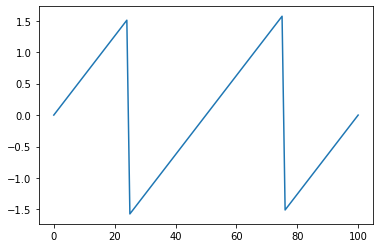

In [107]:
foo0 = np.cos(np.linspace(0,2*np.pi,101))
foo1 = np.sin(np.linspace(0,2*np.pi,101))
plt.plot(np.arctan(foo1/foo0))

## Quantifying uncertainty in the volumetric envelope

In [16]:
import confocal
importlib.reload(confocal)

<module 'confocal' from '/Users/asears/work/confocal/confocal.py'>

cwd: /Users/asears/work/confocal
Found 26 files, ie: HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/Intensity.png.export/Intensity_Z23_CH.png
Results: 26 files w/ indices: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
cwd: /Users/asears/work/confocal
Found 41 files, ie: HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/objects/Nucleus_9.png
Results: 41 files w/ indices: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
cwd: /Users/asears/work/confocal
Found 41 files, ie: HUVEC 3D Reconstruction Files/HUVEC Tubulin AD 0.7 ZStack Decon cellSens.export/objects/Cytoplasm_8.png
Results: 41 files w/ indices: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
non-series
item

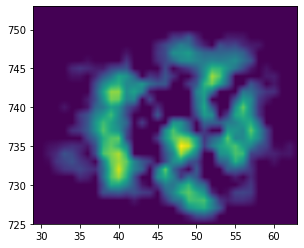

In [17]:
cs1 = confocal.make_default_obj(1, quiet=False)

Cell: 20


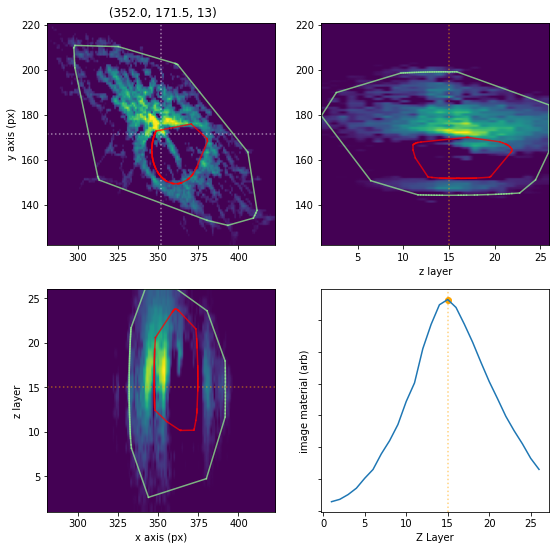

In [18]:
for cyto_id in sorted(cs1.data['cyto_linear_mask2D'].keys()):
    cyto_id=20
    print('Cell:', cyto_id)
    
    if False: # windowed
        cs1.create_cropped('cyto_linear3D', cropped_name='cyto_test_%02d' % cyto_id, debug=False, series=False,
                           mask=None,window=cs1.data['cyto_linear_mask2D'][cyto_id]['extent']) # 
        cs1.create_cropped('nucleus_linear3D', cropped_name='nucleus_test_%02d' % cyto_id, debug=False, series=False,
                           mask=None,window=cs1.data['cyto_linear_mask2D'][cyto_id]['extent']) # cs1.data['nucleus_linear_mask2D'][cyto_id]
    else: # masked
        cs1.create_cropped('cyto_linear3D', cropped_name='cyto_test_%02d' % cyto_id, debug=False, series=False,
                           mask=cs1.data['cyto_linear_mask2D'][cyto_id]) # 
        cs1.create_cropped('nucleus_linear3D', cropped_name='nucleus_test_%02d' % cyto_id, debug=False, series=False,
                           mask=cs1.data['cyto_linear_mask2D'][cyto_id]) # cs1.data['nucleus_linear_mask2D'][cyto_id]

    
    cs1.find_envelope3D('cyto_test_%02d' % cyto_id, 'cyto_cropped_env_%02d' % cyto_id, n_angle=320, max_r=200,
                        pct=0.95)
    cs1.find_envelope3D('nucleus_test_%02d' % cyto_id, 'nucleus_cropped_env_%02d' % cyto_id, n_angle=320, max_r=200,
                        pct=0.95)

    cs1.four_panel('cyto_test_%02d' % cyto_id,
                   envelopes=[{'target': 'cyto_cropped_env_%02d' % cyto_id, 'color': 'lightgreen'},
                              'nucleus_cropped_env_%02d' % cyto_id])
    plt.show()
    break


In [74]:
def custom_find_envelope3D(self, target, result, n_angle=40, n_r=41, max_r=30, pct=0.95, force_int_z=True, 
                compute_uncertainty=False, r_scaling=(1.0,1.0,1.0)):

    x0 = self.getCoM(target)
    if force_int_z: x0 = [x0[0], x0[1], int(x0[2])]

    envelope = np.zeros((n_angle, n_angle, 3))
    full_record = np.zeros((n_angle, n_angle, n_r))
    full_record_r = np.zeros((n_angle, n_angle, 3))
    
    rspace = np.linspace(0, max_r, n_r)
    phi_space = np.linspace(-np.pi / 2, np.pi / 2, envelope.shape[0])
    theta_space = np.linspace(0, 2 * np.pi, envelope.shape[1])

    def get_pct(x, pct=0.95):
        x_min = np.repeat(np.expand_dims(np.min(x, 0) * pct, 0), np.shape(x)[0], 0)
        return np.argmin(x_min - x < 0, 0)

    for i, phi in enumerate(phi_space):
        x0_repeats = np.array([[x0]]).repeat(len(theta_space), 1)
        x_nor = np.array([[[np.cos(th0) * np.cos(phi),
                            np.sin(th0) * np.cos(phi),
                            np.sin(phi)] for th0 in theta_space]])

        r_repeats = np.expand_dims(np.expand_dims(rspace, 1), 1)
        radial_xy = x0_repeats + x_nor * r_repeats

        indata = self.data[target]['fxn'](radial_xy)
#         print(indata.shape)
#         print(x_nor.shape)
        full_record[i] = indata.T
        full_record_r[i] = np.squeeze(x_nor)

        envelope[i] = np.array([radial_xy[arg, i, :]
                                for arg, i in zip(get_pct(list(accumulate(-indata)), pct=pct),
                                                  range(len(np.argmin(list(accumulate(-indata)), 0))))])

    self.data[result] = envelope
    
    res = {
        'full_record':full_record, # the [angle x angle x interpolated-data] (no accumulation)
        'full_record_r':'full_record_r', # the unit norm vector direction used
    }
    
    if compute_uncertainty:
        for phin in range(np.shape(res)[0]):
        for thetan in range(np.shape(res)[1]):
            accumulated = np.array(list(accumulate(-res[phin][thetan])))
            accumulated /= np.min(accumulated)
    #         plt.plot(accumulated)
    #         plt.axhline(0.95, linestyle=':')
            u1 = np.argmax(accumulated>0.95)-np.argmax(accumulated>0.9)
            u2 = np.argmax(accumulated>0.99)-np.argmax(accumulated>0.95)
            if u1>0: ac.update([u1])
            if u2>0: bc.update([u2])
            # Not clear what's happening with u1==u2==0, but the accumulation line is constant. Ok to skip.
#             if u1==0:
#                 plt.plot(accumulated)
#                 plt.axhline(0.95, linestyle=':')
#                 plt.show()
    #         print(np.argmax(accumulated>0.9), np.argmax(accumulated>0.95), np.argmax(accumulated>0.99))

        idx1 = np.argmax(np.array(list(ac.items())).T[1])
        idx2 = np.argmax(np.array(list(bc.items())).T[1])
        
        uncertainty1_mode_px = np.array(list(ac.items())).T[0][idx1]
        uncertainty2_mode_px = np.array(list(bc.items())).T[0][idx2]
        
        res.update({
            'uncertainty1_px':None,
            'uncertainty1_r':None,
            'uncertainty1_histogram_px':None,
            'uncertainty2_px':None,
            'uncertainty2_r':None,
            'uncertainty2_histogram_px':None,
        })
        
        print('Uncertainty:',,)
    #     break

    
    return full_record, full_record_r
    



In [76]:
#     cs1.find_envelope3D('nucleus_test_%02d' % cyto_id, 'nucleus_cropped_env_%02d' % cyto_id, n_angle=320, max_r=200,
#                         pct=0.95)


# res = custom_find_envelope3D(cs1,'cyto_test_%02d' % cyto_id, 'cyto_exp_env_%02d', n_r=101,max_r=200)
res, res_r = custom_find_envelope3D(cs1,'nucleus_test_%02d' % cyto_id, 'nucleus_exp_env_%02d', n_r=101,max_r=30)

In [77]:
from collections import Counter

for cyto_id in sorted(cs1.data['cyto_linear_mask2D'].keys()):
#     cyto_id=39
    ac = Counter()
    bc = Counter()
    
    if True: # windowed
        cs1.create_cropped('cyto_linear3D', cropped_name='cyto_test_%02d' % cyto_id, debug=False, series=False,
                           mask=None,window=cs1.data['cyto_linear_mask2D'][cyto_id]['extent']) # 
        cs1.create_cropped('nucleus_linear3D', cropped_name='nucleus_test_%02d' % cyto_id, debug=False, series=False,
                           mask=None,window=cs1.data['cyto_linear_mask2D'][cyto_id]['extent']) # cs1.data['nucleus_linear_mask2D'][cyto_id]
    else: # masked
        cs1.create_cropped('cyto_linear3D', cropped_name='cyto_test_%02d' % cyto_id, debug=False, series=False,
                           mask=cs1.data['cyto_linear_mask2D'][cyto_id]) # 
        cs1.create_cropped('nucleus_linear3D', cropped_name='nucleus_test_%02d' % cyto_id, debug=False, series=False,
                           mask=cs1.data['cyto_linear_mask2D'][cyto_id]) # cs1.data['nucleus_linear_mask2D'][cyto_id]


    
    res, res_r = custom_find_envelope3D(cs1,'cyto_test_%02d' % cyto_id, 'cyto_exp_env_%02d', n_r=201,max_r=200)
#     res = custom_find_envelope3D(cs1,'nucleus_test_%02d' % cyto_id, 'nucleus_exp_env_%02d', n_r=101,max_r=30)
    print(res.shape)
    for phin in range(np.shape(res)[0]):
        for thetan in range(np.shape(res)[1]):
            accumulated = np.array(list(accumulate(-res[phin][thetan])))
            accumulated /= np.min(accumulated)
    #         plt.plot(accumulated)
    #         plt.axhline(0.95, linestyle=':')
            u1 = np.argmax(accumulated>0.95)-np.argmax(accumulated>0.9)
            u2 = np.argmax(accumulated>0.99)-np.argmax(accumulated>0.95)
            if u1>0: ac.update([u1])
            if u2>0: bc.update([u2])
            # Not clear what's happening with u1==u2==0, but the accumulation line is constant. Ok to skip.
#             if u1==0:
#                 plt.plot(accumulated)
#                 plt.axhline(0.95, linestyle=':')
#                 plt.show()
    #         print(np.argmax(accumulated>0.9), np.argmax(accumulated>0.95), np.argmax(accumulated>0.99))

    idx1 = np.argmax(np.array(list(ac.items())).T[1])
    idx2 = np.argmax(np.array(list(bc.items())).T[1])
    print('Cell:', cyto_id,'-',np.array(list(ac.items())).T[0][idx1],np.array(list(bc.items())).T[0][idx2])
#     break

(40, 40, 201)
Cell: 1 - 2 2
(40, 40, 201)
Cell: 2 - 1 1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater


(40, 40, 201)
Cell: 3 - 1 1
(40, 40, 201)
Cell: 4 - 2 2
(40, 40, 201)
Cell: 5 - 1 2
(40, 40, 201)
Cell: 6 - 1 1
(40, 40, 201)
Cell: 7 - 1 2
(40, 40, 201)
Cell: 8 - 1 3
(40, 40, 201)
Cell: 9 - 1 1
(40, 40, 201)
Cell: 10 - 1 1
(40, 40, 201)
Cell: 11 - 1 1
(40, 40, 201)
Cell: 12 - 1 1
(40, 40, 201)
Cell: 13 - 1 2
(40, 40, 201)
Cell: 14 - 1 2
(40, 40, 201)
Cell: 15 - 2 2
(40, 40, 201)
Cell: 16 - 2 2
(40, 40, 201)
Cell: 17 - 1 1
(40, 40, 201)
Cell: 18 - 1 1
(40, 40, 201)
Cell: 19 - 2 2
(40, 40, 201)
Cell: 20 - 1 1
(40, 40, 201)
Cell: 21 - 1 2
(40, 40, 201)
Cell: 22 - 1 1
(40, 40, 201)
Cell: 23 - 1 2
(40, 40, 201)
Cell: 24 - 1 2
(40, 40, 201)
Cell: 25 - 1 2
(40, 40, 201)
Cell: 26 - 1 1
(40, 40, 201)
Cell: 27 - 1 2
(40, 40, 201)
Cell: 28 - 1 2
(40, 40, 201)
Cell: 29 - 1 2
(40, 40, 201)
Cell: 30 - 1 1
(40, 40, 201)
Cell: 31 - 2 1
(40, 40, 201)
Cell: 32 - 1 1
(40, 40, 201)
Cell: 33 - 1 1
(40, 40, 201)
Cell: 34 - 1 1
(40, 40, 201)
Cell: 35 - 1 3
(40, 40, 201)
Cell: 36 - 1 1
(40, 40, 201)
Cell: 3

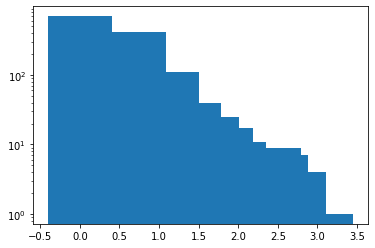

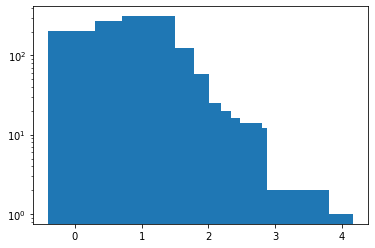

In [63]:
plt.bar(np.log(np.array(list(ac.items())).T[0]),np.array(list(ac.items())).T[1])
plt.yscale('log')
plt.show()
plt.bar(np.log(np.array(list(bc.items())).T[0]),np.array(list(bc.items())).T[1])
plt.yscale('log')

In [64]:
# to do:
# fit the log-normal instead of returning the max
# execute a fit on the "old" dataset

In [86]:
sum(([1,1,1]*res_r[10][10])**2)

1.0

# TIF Export

In [32]:
# Several of the AFM_100 datasets are unavailable as png, only a single TIF. This exports them.

from PIL import Image, ImageSequence


target_dir = os.path.join('datasets/AFM Test 100x/AFM Test 2 - LMNA(g) Actin(r).export/','Intensity.png.export')
im = Image.open(os.path.join('datasets/AFM Test 100x/AFM Test 2 - LMNA(g) Actin(r).export/','Intensity.tif.export',"Intensity_45Z_CH.ome.tif"))

os.makedirs(target_dir,exist_ok=True)
for i, page in tqdm(enumerate(ImageSequence.Iterator(im))):
    page.save(os.path.join(target_dir,"Intensity_Z%03d.png" % i))
#     break

45it [00:09,  4.87it/s]


# Extract discrete colors?

(800, 800, 3)


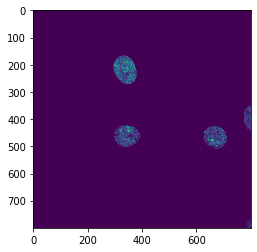

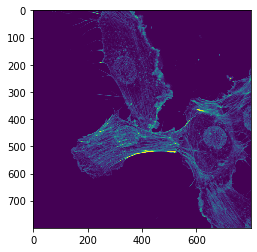

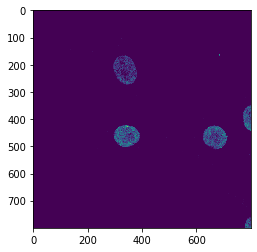

In [34]:
cs1.data.keys()
# cs1.render_image('full_image',sliced=10,series=False)
print(cs1.data['full_image'][10].shape)
plt.imshow(cs1.data['full_image'][140][:,:,2])
plt.show()
plt.imshow(cs1.data['full_image'][140][:,:,1])
plt.show()
plt.imshow(cs1.data['full_image'][140][:,:,0])

r, g, b = cs1.data['full_image'][140][:,:,0], cs1.data['full_image'][140][:,:,1], cs1.data['full_image'][140][:,:,2]

In [192]:
from matplotlib import colors
from skimage import io, color
from sklearn.cluster import KMeans


nemo_rgb = cs1.data['full_image'][140]
nemo_lab = color.rgb2lab(nemo_rgb)

# pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
# norm = colors.Normalize(vmin=-1.,vmax=1.)
# norm.autoscale(pixel_colors)
# pixel_colors = np.array(norm(pixel_colors).tolist())


In [194]:
nemo_ab = nemo_lab[:,:,1:3] #.reshape((-1,2))
print(nemo_ab.shape)
res = KMeans(n_clusters=3).fit(nemo_ab.reshape((-1,2))) # C F A

(800, 800, 2)


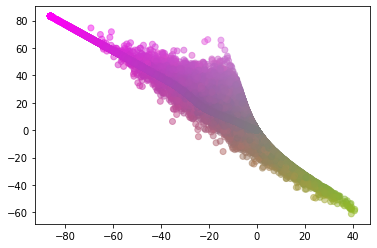

In [195]:
nemo_ab.shape
plt.scatter(nemo_ab[:,:,0],nemo_ab[:,:,1], facecolors=pixel_colors, alpha=0.5)

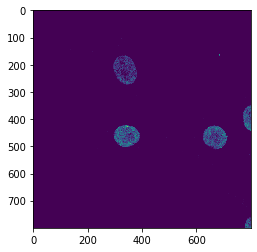

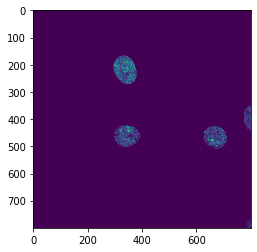

In [191]:
plt.imshow(nemo_rgb[:,:,0])
plt.show()
plt.imshow(nemo_rgb[:,:,2])

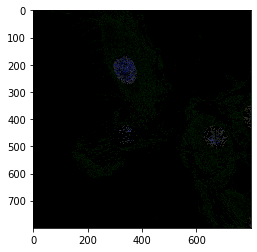

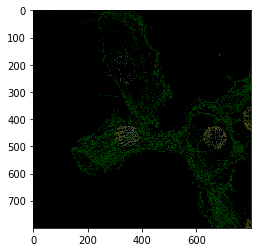

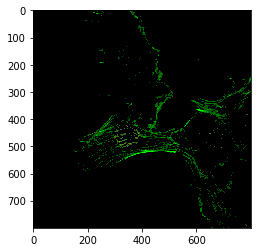

In [142]:
k0 = nemo_rgb*np.array(res.predict(nemo_ab.reshape((-1,2)))==0).reshape((800,800,1))
plt.imshow(k0)
plt.show()
k1 = nemo_rgb*np.array(res.predict(nemo_ab.reshape((-1,2)))==1).reshape((800,800,1))
plt.imshow(k1)
plt.show()
k2 = nemo_rgb*np.array(res.predict(nemo_ab.reshape((-1,2)))==2).reshape((800,800,1))
plt.imshow(k2)
plt.show()


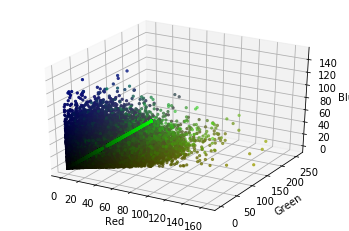

In [73]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

decimator = 1

#your code

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
ax.scatter(r[::decimator].flatten(), g[::decimator].flatten(), b[::decimator].flatten(), marker='.', facecolors=pixel_colors[::decimator])
# ax.set_xlim(0,100); ax.set_ylim(0,100)

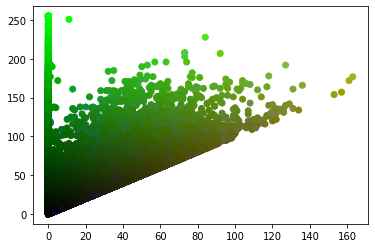

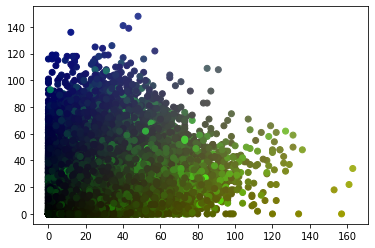

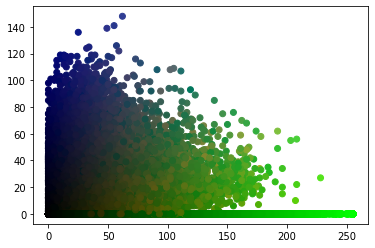

In [72]:
plt.scatter(r.flatten(),g.flatten(), facecolors=pixel_colors) # facecolors=pixel_colors[:,0:2]
plt.show()
plt.scatter(r.flatten(),b.flatten(), facecolors=pixel_colors) # facecolors=pixel_colors[:,0:2]
plt.show()
plt.scatter(g.flatten(),b.flatten(), facecolors=pixel_colors) # facecolors=pixel_colors[:,0:2]
plt.show()

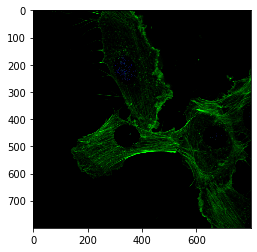

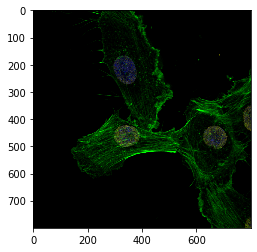

(800, 800, 1)


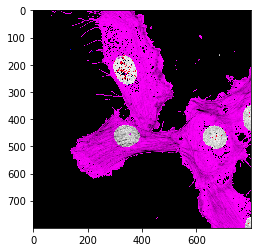

In [175]:
plt.imshow(nemo_rgb*np.expand_dims(np.array(nemo_rgb[:,:,0]<10),-1))
plt.show()
plt.imshow(nemo_rgb)
plt.show()
padded = np.pad(np.expand_dims(nemo_rgb[:,:,1],-1),
print(padded.shape)
plt.imshow(nemo_rgb*np.expand_dims(np.array(nemo_rgb[:,:,0]<10),-1)- padded)

In [203]:
import cv2
bright = cv2.imread('datasets/AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/Intensity_Z136_CH.png')
bright_lab = cv2.cvtColor(bright, cv2.COLOR_BGR2LAB)
bright_rgb = cv2.cvtColor(bright, cv2.COLOR_BGR2RGB)

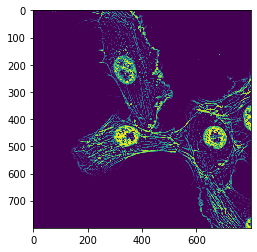

In [212]:
# plt.imshow(bright_rgb[:,:,2])
plt.imshow(bright_lab[:,:,0])

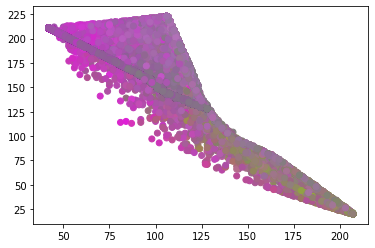

In [214]:
plt.scatter(bright_lab[:,:,1],bright_lab[:,:,2], facecolors=pixel_colors)

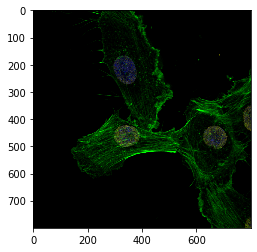

In [215]:
plt.imshow(nemo_rgb)
# rgb = io.imread(filename)
# lab = color.rgb2lab(rgb)



Ok. You're not going to get a good result. But what are you trying to do?


## Advanced TIF Export Dev

In [231]:
from PIL import Image, ImageSequence

fname_tif= 'datasets/AFM Test 2020.07.20/AFM Test 2.export/Intensity.tif.export/Intensity_45Z_3CH.ome.tif'

im = Image.open(fname_tif)

# os.makedirs(target_dir, exist_ok=True)
for i, page in tqdm(enumerate(ImageSequence.Iterator(im))):
#     page.save(os.path.join(target_dir, "Intensity_Z%03d.png" % i))
    print(page)
    break
    
#     confocal.export_tif('datasets/AFM Test 2020.07.20/AFM Test 2.export/Intensity.png.export/',
#                     'datasets/AFM Test 2020.07.20/AFM Test 2.export/Intensity.tif.export/Intensity_45Z_3CH.ome.tif')

#     globular_full = 'datasets/AFM Test 2020.07.20/AFM Test 2.export/Intensity.png.export/Intensity*.png' #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
#     print(len(glob.glob(globular_full)))
#     destdir = 'datasets/AFM Test 2020.07.20/AFM Test 2.export/'
#     os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
#     desc = 'afm_20200720_test2'
#     confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
#                     filedesc=desc)
#     plt.show()
# #     'AFM Test 2.export'




0it [00:00, ?it/s]

<PIL.TiffImagePlugin.TiffImageFile image mode=I;16 size=800x800 at 0x7FA7785611D0>


In [233]:
im.__dict__

{'im': <ImagingCore at 0x7faa9b0e09b0>,
 'mode': 'I;16',
 '_size': (800, 800),
 'palette': None,
 'info': {'compression': 'raw', 'dpi': (96, 96)},
 'category': 0,
 'readonly': 0,
 'pyaccess': None,
 '_exif': None,
 '_min_frame': 0,
 'custom_mimetype': None,
 'tile': [],
 'decoderconfig': (),
 'decodermaxblock': 65536,
 'fp': None,
 'filename': 'datasets/AFM Test 2020.07.20/AFM Test 2.export/Intensity.tif.export/Intensity_45Z_3CH.ome.tif',
 '_exclusive_fp': True,
 'tag_v2': <PIL.TiffImagePlugin.ImageFileDirectory_v2 at 0x7fa778561310>,
 'tag': <PIL.TiffImagePlugin.ImageFileDirectory_v1 at 0x7fa7785615d0>,
 'ifd': <PIL.TiffImagePlugin.ImageFileDirectory_v1 at 0x7fa7785615d0>,
 '_TiffImageFile__first': 1331516,
 '_TiffImageFile__next': 2678354,
 '_TiffImageFile__frame': 0,
 '_TiffImageFile__fp': <_io.BufferedReader name='datasets/AFM Test 2020.07.20/AFM Test 2.export/Intensity.tif.export/Intensity_45Z_3CH.ome.tif'>,
 '_frame_pos': [1331516],
 '_n_frames': None,
 '_is_animated': True,
 '_c

Hmm, well, don't know what I was expecting

<module 'confocal' from '/Users/asears/work/confocal/confocal.py'>

In [59]:
fname_tif = 'datasets/AFM Test 2020.07.20/HUVEC Cyto(g) Nucleus(b).export/Intensity.tif.export/Intensity_15Z_2CH.ome.tif'
fname_tif = 'datasets/AFM Test 2020.07.20/AFM Test 2.export/Intensity.tif.export/Intensity_45Z_3CH.ome.tif'
fname_tif = 'datasets/AFM Test 2020.07.20/AFM Test - LMNA DAPI Adjust.export/Intensity.tif.export/Intensity_40Z_5CH.ome.tif'

from skimage import io
im = io.imread(fname_tif)
print(im.shape)


(5, 40, 800, 800)


In [300]:
import confocal
importlib.reload(confocal)

<module 'confocal' from '/Users/asears/work/confocal/confocal.py'>

In [307]:
confocal.export_tif('datasets/AFM Test 2020.07.20/AFM Test 2.export/Intensity.png.export/',
                'datasets/AFM Test 2020.07.20/AFM Test 2.export/Intensity.tif.export/Intensity_45Z_3CH.ome.tif',as_colors=[1,2,0])


  0%|          | 0/45 [00:00<?, ?it/s]

Data shape: (3, 45, 800, 800)
Using channel colors: [1, 2, 0]


100%|██████████| 45/45 [04:57<00:00,  6.60s/it]


In [284]:
imageio.plugins.freeimage.download()


Imageio: 'libfreeimage-3.16.0-osx10.6.dylib' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/freeimage/libfreeimage-3.16.0-osx10.6.dylib (4.3 MB)
Downloading: 8192/4461680 bytes (0.2%794624/4461680 bytes (17.81564672/4461680 bytes (35.1%2850816/4461680 bytes (63.9%4120576/4461680 bytes (92.4%4461680/4461680 bytes (100.0%)
  Done
File saved as /Users/asears/Library/Application Support/imageio/freeimage/libfreeimage-3.16.0-osx10.6.dylib.


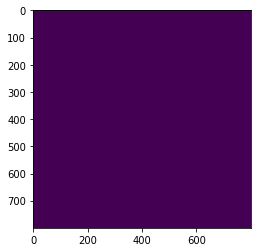

In [302]:
plt.imshow(np.array(im[0,0,:,:]*16, dtype=np.uint16))

In [288]:
np.max(im[0,20,:,:]), 2**8, 2**16

(3830, 256, 65536)

In [295]:
np.max(im[4,:,:,:]), 2**16/4096, 2**12

(127, 16.0, 4096)

In [55]:
import sys
sys.executable

'/usr/local/opt/python/bin/python3.7'

In [56]:
import cellpose

In [61]:
# nplanes x channels x nY x nX or as nplanes x nY x nX. You can test this by running in python

# import skimage.io
# data = skimage.io.imread('img.tif')
# print(data.shape)

import skimage.io
from cellpose import models



In [82]:
imgs = np.transpose(im, [1,0,2,3])
# imgs = im
imgs.shape

(40, 5, 800, 800)

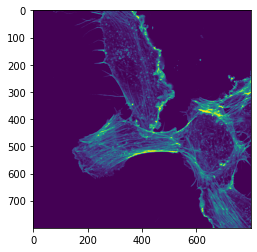

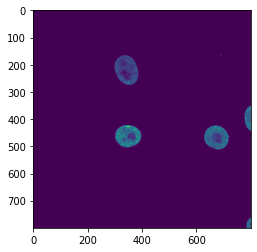

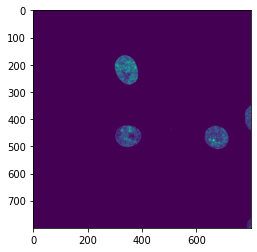

In [83]:
plt.imshow(imgs[23,1,:,:])
plt.show()
plt.imshow(imgs[23,3,:,:])
plt.show()
plt.imshow(imgs[23,0,:,:])
plt.show()


In [145]:
cyto_model = models.Cellpose(model_type='cyto')
nucleus_model = models.Cellpose(model_type='nuclei')

masks, flows, styles, diams = cyto_model.eval([_ for _ in imgs][23], diameter=None, channels=[1,0])

# masks, flows, styles, diams = cyto_model.eval(imgs, diameter=None, channels=[1,0], do_3D=True)









  0%|          | 0/1 [00:00<?, ?it/s]

>>>> using CPU
>>>> using CPU
processing 1 image(s)









100%|██████████| 1/1 [00:18<00:00, 18.83s/it]


estimated cell diameters for all images


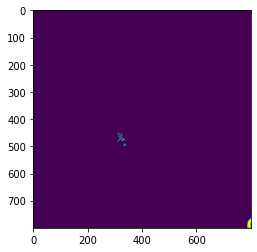

In [146]:
plt.imshow(masks)

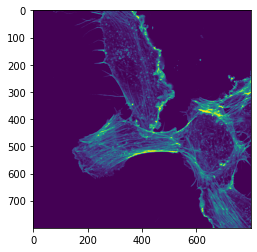

In [147]:
plt.imshow(imgs[23][1])

# Filtering scratch

In [102]:
import skimage, scipy

/Users/asears/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
/Users/asears/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


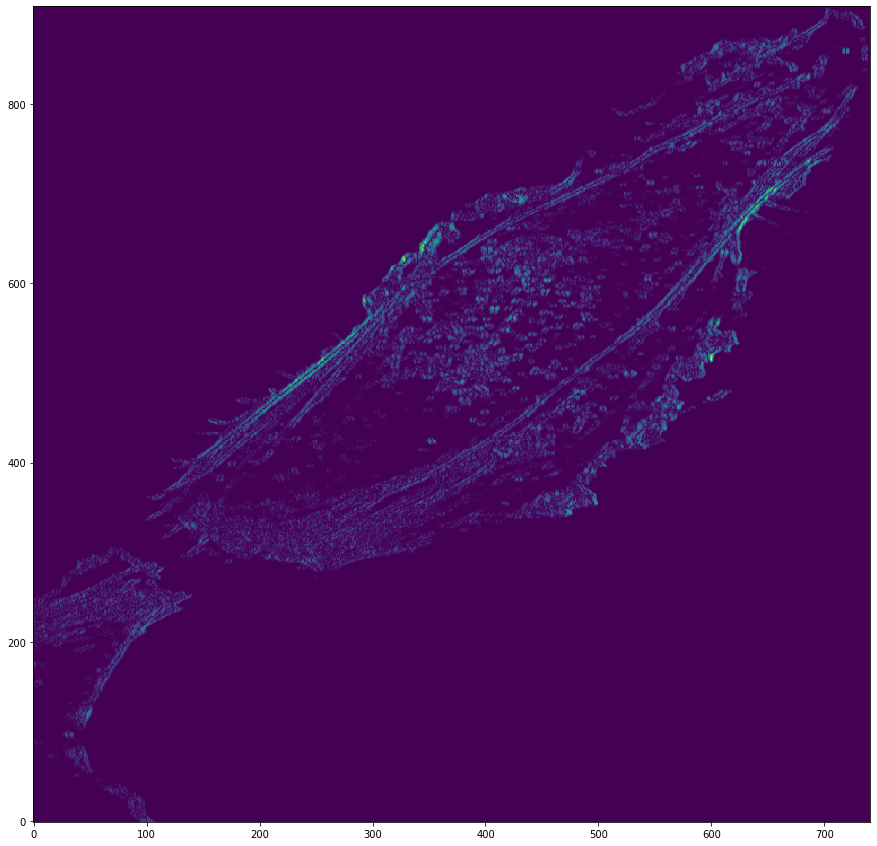

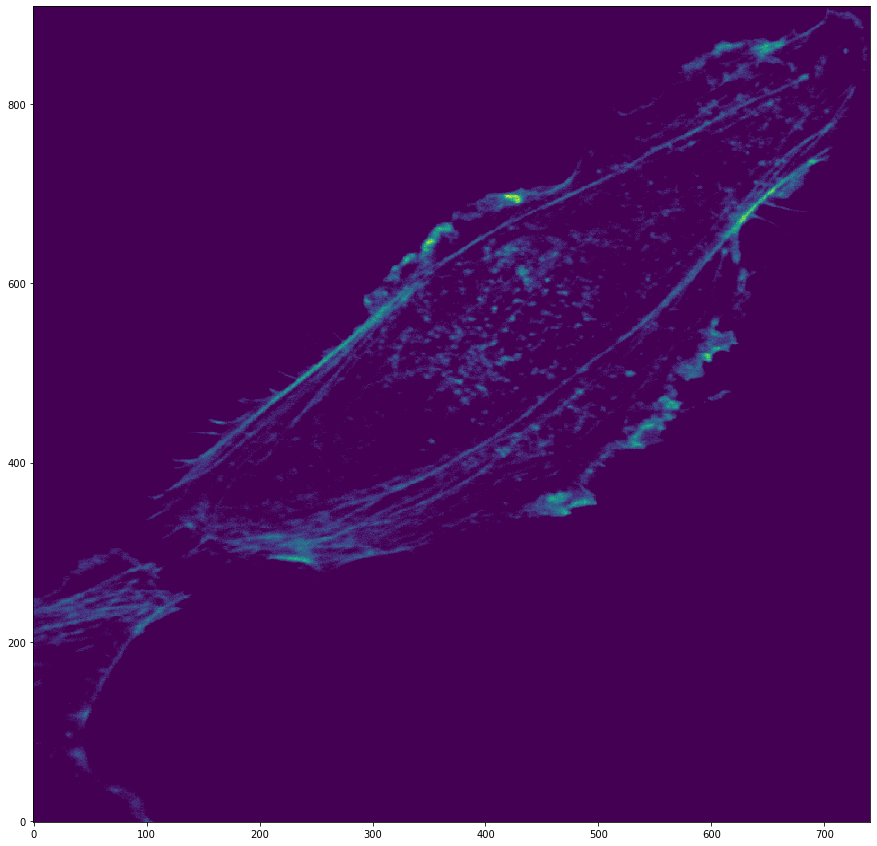

In [128]:
# pixel_data = cs1.render_image('nucleus_test_%02d' % 1,sliced=23)
pixel_data = cs1.render_image('cyto_test_%02d' % 1,sliced=23)
sobel_image = np.abs(scipy.ndimage.sobel(pixel_data))
fig1,ax1 = plt.subplots(figsize=(15,15))
fig2,ax2 = plt.subplots(figsize=(15,15))

ax1.imshow(sobel_image, origin='lower', aspect='auto')
fig1.show()
ax2.imshow(pixel_data, origin='lower', aspect='auto')
fig2.show()

## PSF Kernel observations

{'count': [909, 741, 28], 'extent': [0, 908, 0, 740, 0.0, 27.0], 'fxn': <scipy.interpolate.interpolate.RegularGridInterpolator object at 0x1371c2e10>}


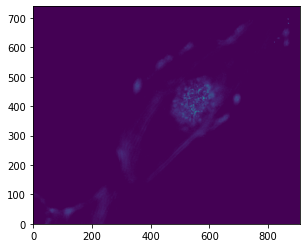

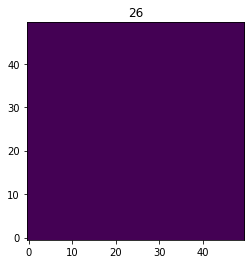

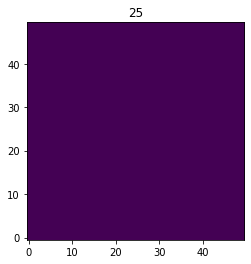

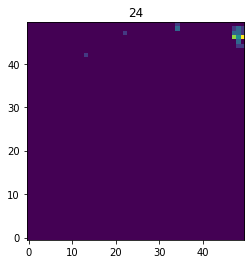

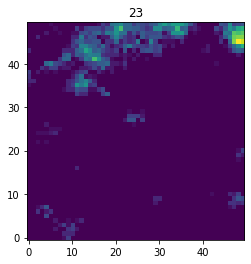

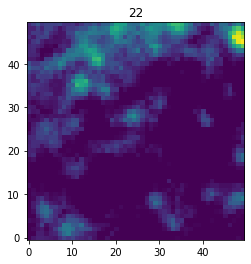

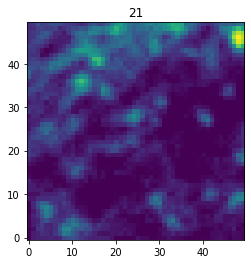

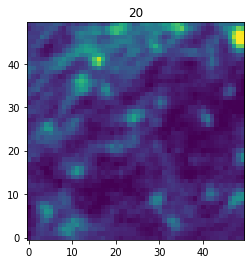

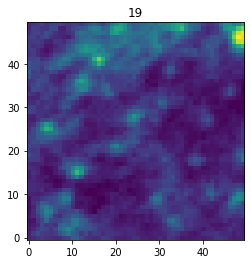

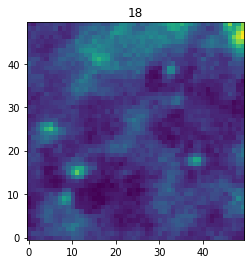

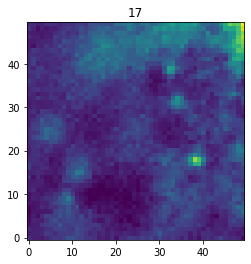

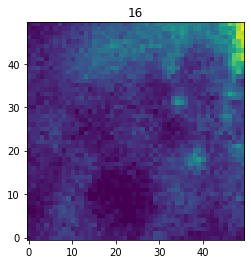

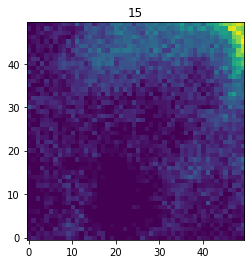

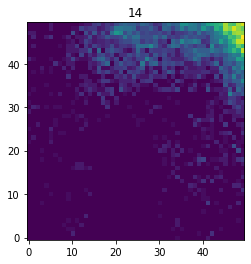

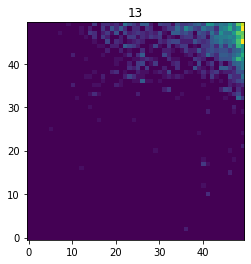

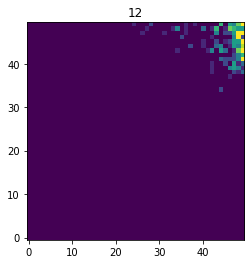

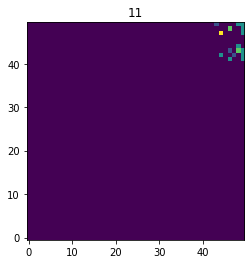

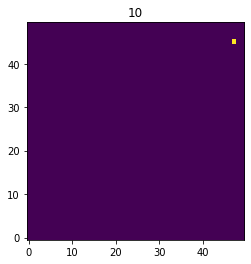

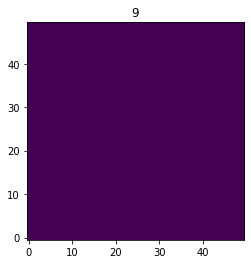

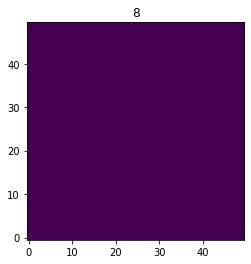

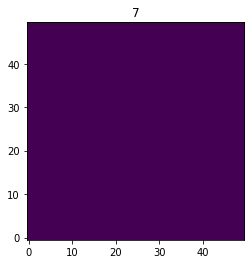

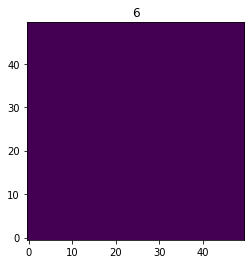

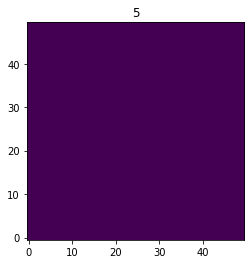

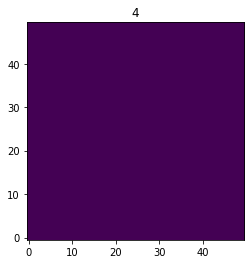

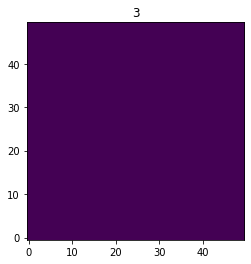

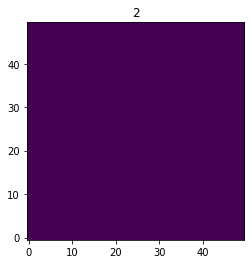

In [56]:
print(cs1.data['cyto_test_01'])
print(cs1.data['cyto_test_01']['fxn'])

ups=1
c = [450, 300]
d = 50
foo = cs1.render_image('cyto_test_01',sliced=13,do_plot=True,upscale=ups)[c[0]*ups:(c[0]+d)*ups,c[1]*ups:(c[1]+d)*ups]
plt.show()

for _ in range(26,1,-1):
    foo = cs1.render_image('cyto_test_01',sliced=_,do_plot=False,upscale=ups)[c[0]*ups:(c[0]+d)*ups,c[1]*ups:(c[1]+d)*ups]
#     plt.show()
    plt.imshow(foo,origin='lower')
    plt.title(_)
    plt.show()
    

## Annotation Dev

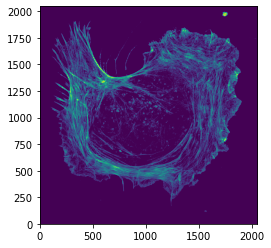

(2048, 2048)


In [242]:
sliced = cs1.render_image('cyto_linear3D',sliced=4, series=False, do_plot=True)
plt.show()
print(sliced.shape)

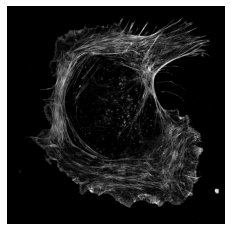

In [246]:
from matplotlib.lines import Line2D
import numpy as np
import dicom


class Annotator(object):
    def __init__(self, axes):
        self.axes = axes

        self.xdata = []
        self.ydata = []

    def mouse_move(self, event):
        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata

        self.xdata.append(x)
        self.ydata.append(y)
        line = Line2D(self.xdata,self.ydata)
        line.set_color('r')
        self.axes.add_line(line)

        plt.draw()

    def mouse_release(self, event):
        # Erase x and y data for new line
        self.xdata = []
        self.ydata = []

if False:
    path = '../sample.dcm'

    data = dicom.read_file(path)

    img = data.pixel_array

else:
    img = np.array([sliced,])

fig, axes = plt.subplots()
axes.imshow(img[0])
plt.axis("off")
plt.gray()
cursor = Annotator(axes)
plt.connect('motion_notify_event', cursor.mouse_move)
plt.connect('button_release_event', cursor.mouse_release)

axes.plot()

plt.show()

(0, 2047, 0, 2047, 0.0, 34.0)
0.0 34.0


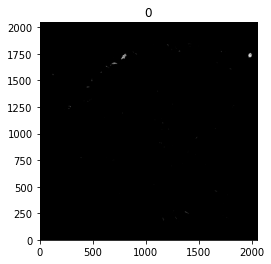

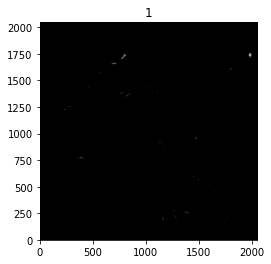

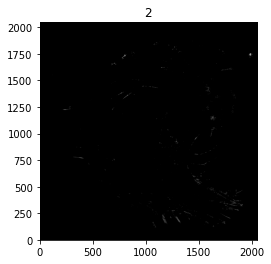

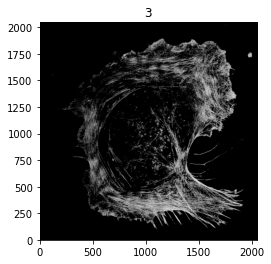

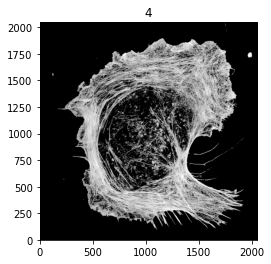

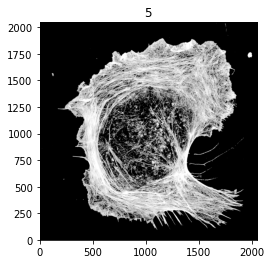

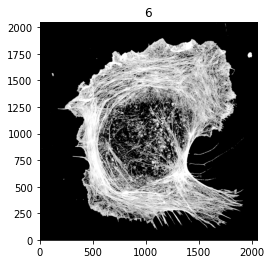

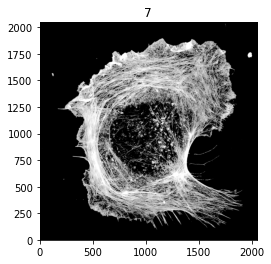

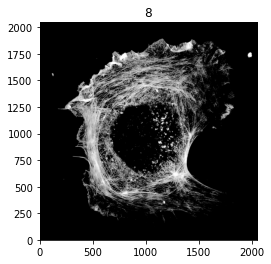

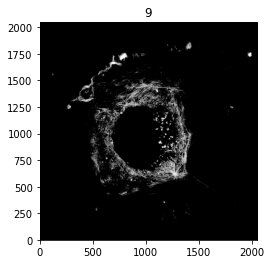

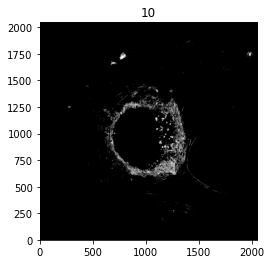

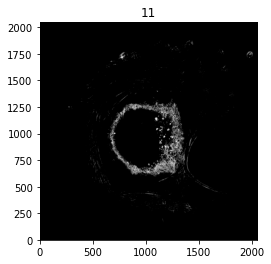

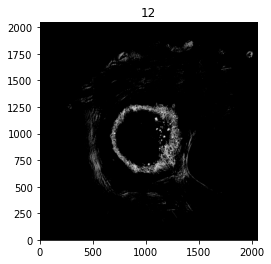

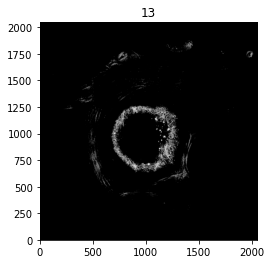

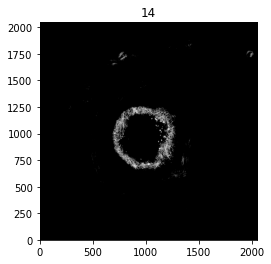

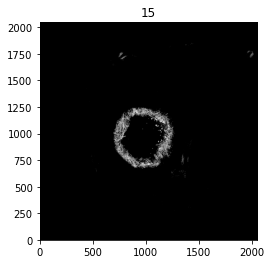

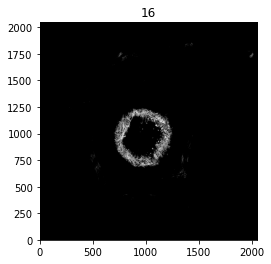

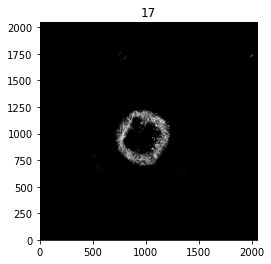

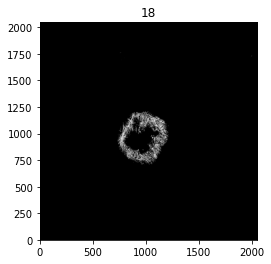

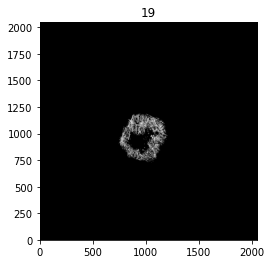

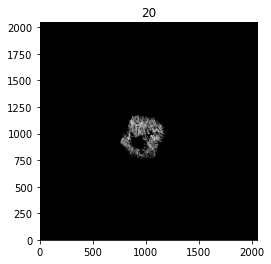

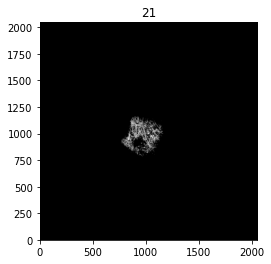

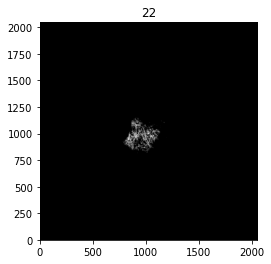

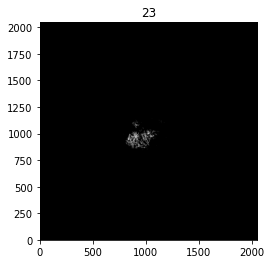

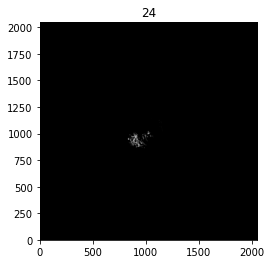

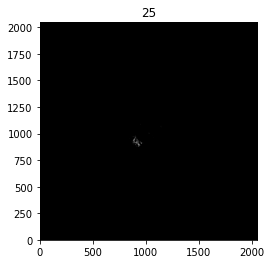

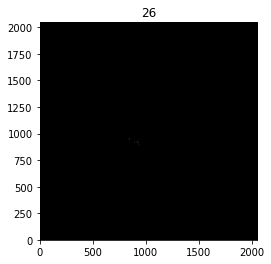

KeyboardInterrupt: 

In [272]:
tag = 'cyto_linear3D'
# tag = 'nucleus_linear3D'
ranged = np.array(cs1.data[tag]['extent'])
print(cs1.data[tag]['extent'])
print(ranged[2],ranged[5])
for f in range(int(ranged[2]),int(ranged[5])):
    sliced = cs1.render_image(tag,sliced=int(f), series=False, do_plot=False)
    plt.imshow(np.log(sliced+1), origin='lower')
    plt.title(f)
    plt.show()

# Load Graded Exports

In [298]:
import json

In [918]:
annotation_folder = 'datasets/SR1/Export - Original Channel tiff Stack/annotation'
annotation_folder = 'datasets/SR_HUVEC1/HUVEC Cell 1/annotation'

tags = ['nucleus_linear3D','cyto_linear3D', 'other_linear3D']

graded = {tag:{} for tag in tags}
for tag in tags:

    fnames = list(sorted(glob.glob(os.path.join(annotation_folder,tag+'*.json'))))
    
    for fname in tqdm(fnames):
        data = json.load(open(fname))
#         print(len(fnames), fnames[0] if len(fnames) else 'None')
        level = fname.split('_')[-1].split('.json')[0]
        print('tag: {} / '.format(t)+'file:', level, len(data['shapes'][0]['points']))
        
        graded[tag][level] = np.array(data['shapes'][0]['points'])


100%|██████████| 27/27 [00:00<00:00, 466.17it/s]
0it [00:00, ?it/s]

tag: other_linear3D / file: 12 19
tag: other_linear3D / file: 13 16
tag: other_linear3D / file: 14 15
tag: other_linear3D / file: 15 19
tag: other_linear3D / file: 16 17
tag: other_linear3D / file: 17 16
tag: other_linear3D / file: 18 17
tag: other_linear3D / file: 19 14
tag: other_linear3D / file: 20 18
tag: other_linear3D / file: 21 15
tag: other_linear3D / file: 22 14
tag: other_linear3D / file: 23 14
tag: other_linear3D / file: 24 16
tag: other_linear3D / file: 25 15
tag: other_linear3D / file: 26 14
tag: other_linear3D / file: 27 14
tag: other_linear3D / file: 28 10
tag: other_linear3D / file: 29 11
tag: other_linear3D / file: 30 8
tag: other_linear3D / file: 31 10
tag: other_linear3D / file: 32 9
tag: other_linear3D / file: 33 8
tag: other_linear3D / file: 34 7
tag: other_linear3D / file: 35 8
tag: other_linear3D / file: 36 8
tag: other_linear3D / file: 37 9
tag: other_linear3D / file: 38 9
tag: other_linear3D / file: 39 8
tag: other_linear3D / file: 40 6
tag: other_linear3D / fi

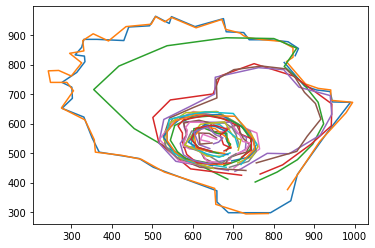

In [919]:
for key,leveldata in graded['cyto_linear3D'].items():
#     levelda
#     print(np.array(leveldata))
#     print('')
    plt.plot(leveldata.T[0], leveldata.T[1])

In [920]:
import copy
nuc_contour_raw = copy.deepcopy(leveldata)

In [338]:
heal_contour(nuc_contour_raw)

Moving to mean


IndexError: arrays used as indices must be of integer (or boolean) type

49it [00:00, 236.42it/s]

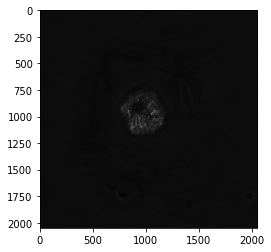

87it [00:00, 118.80it/s]
37it [00:00, 367.00it/s]

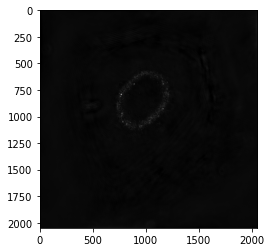

105it [00:00, 156.15it/s]
22it [00:00, 212.03it/s]

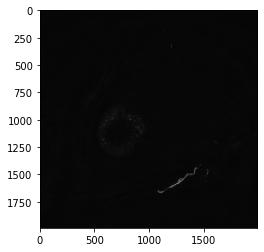

72it [00:00, 100.43it/s]

38538 0


In [449]:
if True:
    fname_tif = 'datasets/SR1/Export - SuperRes Stack 1 - OME/Export_Nikon.ome.tif'
    im = Image.open(fname_tif)

    for i, page in tqdm(enumerate(ImageSequence.Iterator(im))):
    #     page.save(os.path.join(target_dir, "Intensity_Z%03d.png" % i))
        if i==16+3*15: 
            im2 = page
            plt.imshow(im2)
            plt.show()

    fname_tif = 'datasets/SR2/ome/HUVEC Actin LMNA SIM 1_Reconstructed_HUVEC Actin LMNA SIM 1_Reconstructed.ome.tif'
    im = Image.open(fname_tif)

    for i, page in tqdm(enumerate(ImageSequence.Iterator(im))):
    #     page.save(os.path.join(target_dir, "Intensity_Z%03d.png" % i))
        if i==16+3*15: 
            im2 = page
            plt.imshow(im2)
            plt.show()

# 15 bad
fname_tif = 'datasets/SR3/HUVEC Geometry 1_Reconstructed_crop_crop_crop/HUVEC Geometry 1_Reconstructed_crop_crop_crop_HUVEC Geometry 1_Reconstructed_crop_crop_crop.ome.tif'

# 15
# fname_tif = 'datasets/SR3/HUVEC Geometry 2_Reconstructed_crop/HUVEC Geometry 2_Reconstructed_crop_HUVEC Geometry 2_Reconstructed_crop.ome.tif'

# 15 bad
fname_tif = 'datasets/SR3/HUVEC Geometry 3_Reconstructed_crop/HUVEC Geometry 3_Reconstructed_crop_HUVEC Geometry 3_Reconstructed_crop.ome.tif'

im = Image.open(fname_tif)

for i, page in tqdm(enumerate(ImageSequence.Iterator(im))):
#     page.save(os.path.join(target_dir, "Intensity_Z%03d.png" % i))
    if i==1+3*15: 
        im2 = np.asarray(page)
        plt.imshow(im2)
        plt.show()
        print(np.max(im2), np.min(im2))
        
# print(len(list(ImageSequence.Iterator(im))))

In [381]:
im2.__dict__.keys()

dict_keys(['im', 'mode', '_size', 'palette', 'info', 'category', 'readonly', 'pyaccess', '_exif', '_min_frame', 'custom_mimetype', 'tile', 'decoderconfig', 'decodermaxblock', 'fp', 'filename', '_exclusive_fp', 'tag_v2', 'tag', 'ifd', '_TiffImageFile__first', '_TiffImageFile__next', '_TiffImageFile__frame', '_TiffImageFile__fp', '_frame_pos', '_n_frames', 'is_animated', '_compression', '_planar_configuration', 'use_load_libtiff', '_tile_orientation', 'map', 'encoderinfo', 'encoderconfig'])

In [389]:
np.max(np.asarray(im2)), np.min(np.asarray(im2))

(2520, 593)

In [391]:
2**12

4096

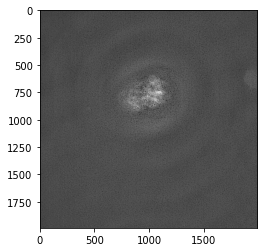

In [395]:
plt.imshow(im2)

## Dev contour expansion

In [473]:
from importlib import reload
reload(confocal)
from confocal import convert_annotated

In [479]:
annotation_folder = 'datasets/SR1/Export - Original Channel tiff Stack/annotation'

tags = ['nucleus_linear3D', 'cyto_linear3D', 'other_linear3D']

envelope_nucleus = convert_annotated(annotation_folder, 'nucleus_linear3D')
envelope_cyto = convert_annotated(annotation_folder, 'cyto_linear3D')
envelope_other = convert_annotated(annotation_folder, 'other_linear3D')

# print(res)

100%|██████████| 23/23 [00:00<00:00, 875.86it/s]


In [486]:
print(list(sorted(envelope_nucleus.keys())))
print(list(sorted(envelope_cyto.keys())))

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [502]:
def expand_cyto(nuc, cyto, center=None):
    
    # find center (of nuc I guess)
    center = [
            np.mean(np.hstack([envelope_nucleus[_][0] for _ in envelope_nucleus])), 
            np.mean(np.hstack([envelope_nucleus[_][1] for _ in envelope_nucleus]))
    ]
    
    # draw line from center to cyto point
    # Extend cyto if necessary
    # return result
    
    
        
    
    for level, pts in cyto.items():
        print(pts.shape)
#         if level in nuc:
#         plt.scatter(pts[0], pts[1])
        for pt in pts:
            dx, dy = center[0]-pt[0], center[1]-pt[1]
            print(dx,dy)
            
            
                       
expand_cyto(envelope_nucleus, envelope_cyto)

# won't always have enough discrete points. Find where we interpolate the curve, then work there

(2, 21)
-79.53234479001344 -12.721439230641636
219.03908378141512 144.42141791221553
(2, 15)
-26.67520193287055 -7.0071535163558565
211.896226638558 132.99284648364414
(2, 13)
-8.103773361441995 7.278560769358364
199.03908378141512 98.70713219792981
(2, 15)
17.610512352843784 15.849989340787033
190.46765520998656 85.84998934078698
(2, 15)
-15.246630504299105 -29.864296373498746
181.896226638558 108.70713219792981
(2, 12)
-35.246630504299105 -38.4357249449273
184.75336949570084 117.27856076935842
(2, 12)
23.32479806712945 18.70713219792981
176.18194092427228 54.42141791221553
(2, 14)
-36.67520193287055 -48.4357249449273
170.46765520998656 107.27856076935842
(2, 16)
-5.246630504299105 -12.721439230641636
160.46765520998656 74.42141791221553
(2, 12)
-12.389487647156216 -7.0071535163558565
156.18194092427228 55.849989340786976
(2, 13)
-2.3894876471562156 -24.150010659212967
153.32479806712945 58.70713219792981
(2, 13)
-49.53234479001344 -69.86429637349875
116.18194092427228 77.278560769358

In [501]:
np.mean(np.hstack([envelope_nucleus[_][0] for _ in envelope_nucleus]))

575.6105123528437

## Reparam re-test

In [605]:
def reparam_contour2(c, npts=21, guide_contour=None, debug=False):
    
    def make_more_pts_dist(contour, cX, cY):
        
        # Get points from this level
        lx = contour[0]
        ly = contour[1]

        # Accumulate distance along the contour described, so that we can interpolate along it
        dist = np.array(
            [0, ] + [np.sqrt((i1 - i0) ** 2 + (j1 - j0) ** 2) for i0, i1, j0, j1 in zip(lx[1:], lx, ly[1:], ly)])
        sumdist = np.array(list(itertools.accumulate(dist)))
        
        # Interpolation of x, y after distance sumdist along the curve
        fx = interp1d(sumdist, lx)
        fy = interp1d(sumdist, ly)

        # Interpolate 101 pieces
        gd = np.linspace(0, sumdist[-1], 101)
        gx_, gy_ = fx(gd), fy(gd)
        
        return gx_, gy_
    

    def get_radius_theta(x,y):
        dX = x-cX
        dY = y-cY

        radius = np.sqrt(dX**2+dY**2)
        theta = np.arctan2(dY, dX)
        
#         ftx_ = interp1d(theta, dX)
#         fty_ = interp1d(theta, dY)

        st, sr = zip(*sorted(zip(theta, radius)))
    
    
        ftr = interp1d(st, sr, bounds_error=False, fill_value=(sr[0]+sr[-1])/2)
        
#         print('funciont theta:', st)
        
        return radius, theta, ftr

    def expand_contour(f1, f2, cX, cY, npts=21, expansion=0):
        
        theta = np.linspace(0, 2*np.pi,npts)
        
        will_be_expanded = np.max(f2(theta)+expansion -  f1(theta))
        print('expansion needed:', will_be_expanded)
        
        r = np.max([f1(theta), f2(theta)+expansion], axis=0)
        

        gx_, gy_ = cX+r*np.cos(theta), cY + r*np.sin(theta)
        
        return gx_, gy_
    
    #     print(c.keys())
    for level in c:
        
        # Calculate middle
        M = cv2.moments(c[level].T.astype(np.int32))
        cX, cY = int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"])

        # Fill in points and generate radius/theta interpolation
        gx, gy =  make_more_pts_dist(c[level], cX=cX, cY=cY)       
        r,t, ftr1 = get_radius_theta(gx, gy)

        # Expand inner contour if requested
        if guide_contour is not None and level in guide_contour:
            gx2, gy2 = make_more_pts_dist(guide_contour[level], cX=cX, cY=cY)
            r2, t2, ftr2 = get_radius_theta(gx2, gy2)
            
            print('level:', level)
            gx, gy = expand_contour(ftr1, ftr2, cX, cY, expansion=0)
            
        else:
            r1, t1, ftr1 = get_radius_theta(gx, gy)
            
            theta = np.linspace(-np.pi, np.pi,npts)
#             print('theta', ftr1.__dict__, theta)
            for t in theta:
#                 print(t)
#                 print(ftr1(t))
                pass
            r = ftr1(theta)

            gx, gy = cX+r*np.cos(theta), cY + r*np.sin(theta)

            
        
        if debug: print('Rad/theta:', r, t)
        
        # Find the point closest to making angle pi; this is the halfway distance
        gtheta = np.unwrap(np.arctan2((gy - cY), (gx - cX)))
        afterpt = np.argmax(gtheta > gtheta[0] + np.pi)
        hd = npts // 2 # gd[afterpt]  # halfway point is closest to pi angle

        if False: # deprecated
            # Ensure we have a midpoint at the halfway point
            gd1 = np.linspace(0, hd, npts // 2 + 1)
            gd2 = np.linspace(hd, sumdist[-1], npts // 2)[1:]

            newx = np.hstack([fx(gd1), fx(gd2)])
            newy = np.hstack([fy(gd1), fy(gd2)])

            c[level] = np.array([newx, newy])
            
        c[level] = np.array([gx, gy])

    return c

How do I deal with nucleus peeking? 
Generate two oversampled contours (1000 points)
Do the radial thing: 
* find the mean center
* calculate an interpolation wrt angle theta
* calculate the same interpolation for the other contour
* Re-generate the cytoplasm contour, with a buffer of size X over the nucleus

level: 10
expansion needed: -43.524113606046456
level: 11
expansion needed: -29.04901438466834
level: 12
expansion needed: -16.459117273206033
level: 13
expansion needed: -10.43645647391591
level: 14
expansion needed: -11.171667634729346
level: 15
expansion needed: 4.477481555573561
level: 16
expansion needed: 8.439913429423541
level: 17
expansion needed: 0.5597472479205123
level: 18
expansion needed: 4.959015670841609
level: 19
expansion needed: -3.9786256157234163
level: 20
expansion needed: -5.009070077258784
level: 21
expansion needed: -2.4533148240429767
level: 22
expansion needed: -3.0871064591396333
level: 23
expansion needed: -9.371236303666777
level: 24
expansion needed: -1.5469195220442487
level: 25
expansion needed: 6.357085175915522
level: 6
expansion needed: -172.19456049033974
level: 7
expansion needed: -215.09956290544326
level: 8
expansion needed: -187.88709448591464
level: 9
expansion needed: -85.34388050805745


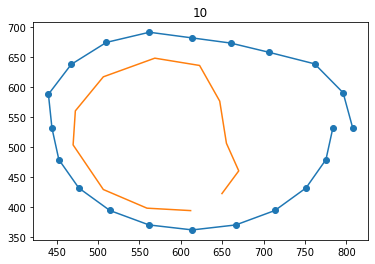

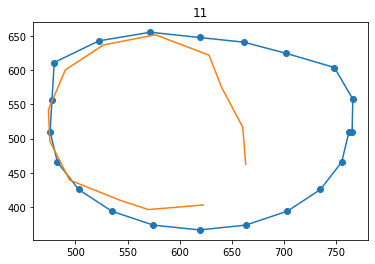

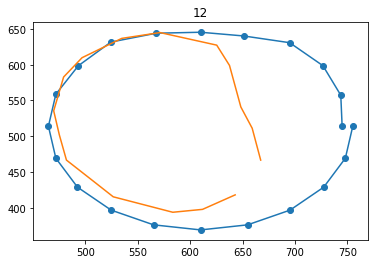

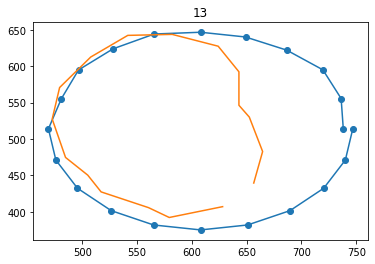

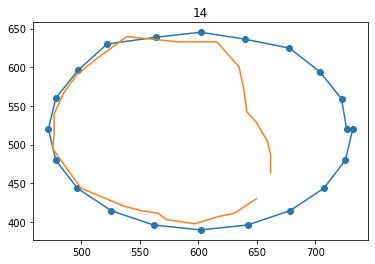

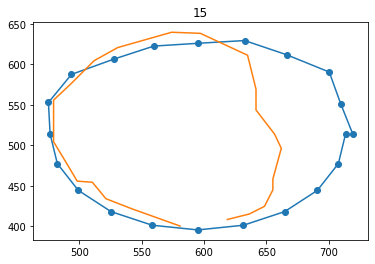

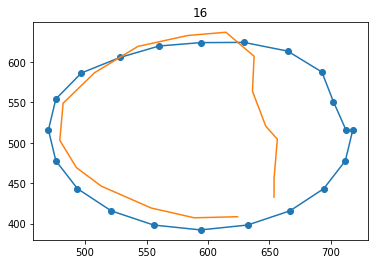

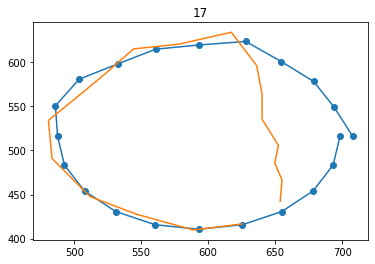

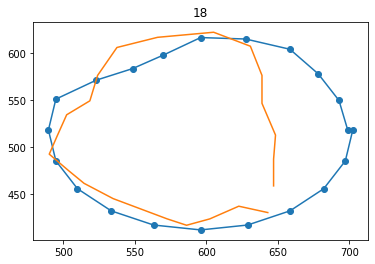

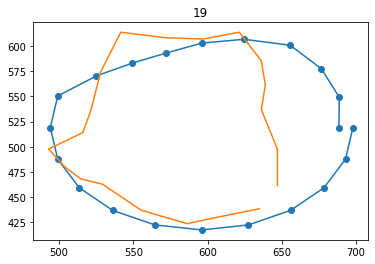

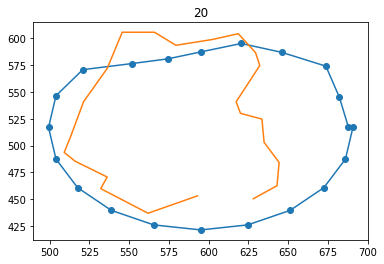

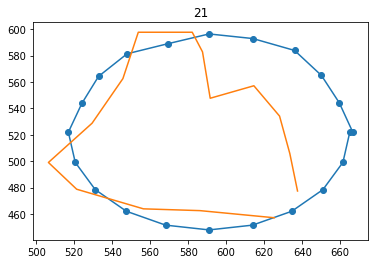

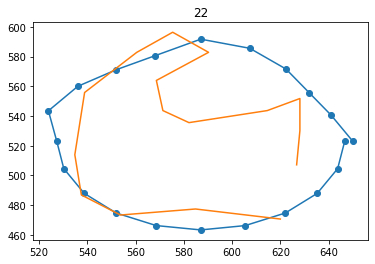

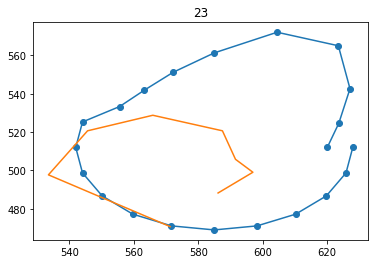

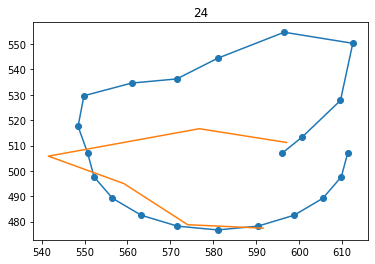

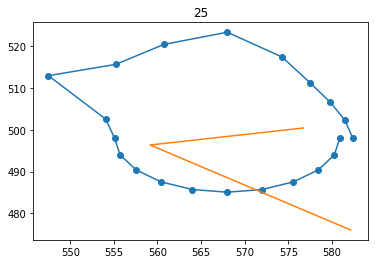

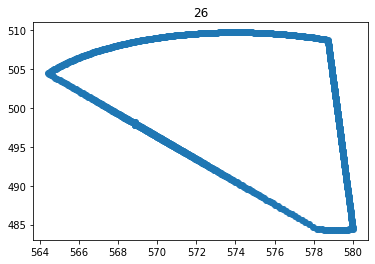

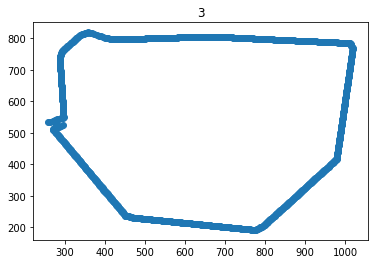

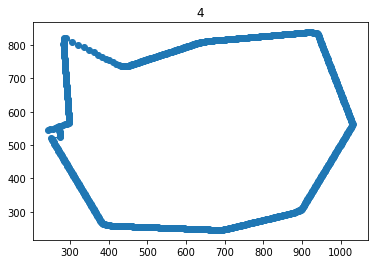

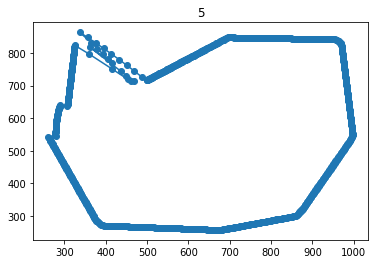

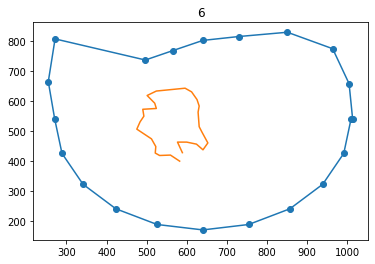

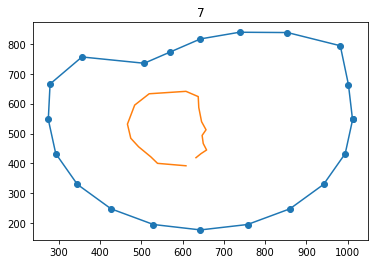

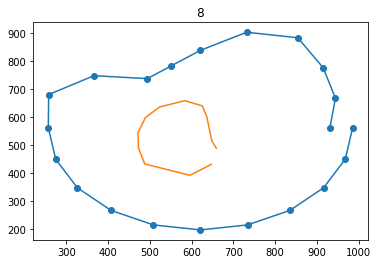

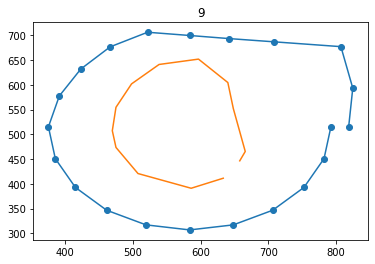

In [608]:
from copy import deepcopy
for ii in range(10):
    ee = deepcopy(envelope_cyto)
    ne = deepcopy(envelope_nucleus)
    new_e = reparam_contour2(ee, npts=1001, guide_contour=ne)
    for layer in new_e:
        plt.plot(new_e[layer][0], new_e[layer][1])
        if layer in ne:
            plt.plot(ne[layer][0], ne[layer][1])
        plt.scatter(ee[layer][0], ee[layer][1])
        plt.title(layer)
        plt.show()
#     plt.show()
        
    break

In [602]:
# this is almost finished.  Needed:
# Don't include the last wrap-around point (in theta). Skip it. 
# Note only those layers that need expansion
# Graph examples: before and after, in new plots.
# Full cycle integration

# redo this


In [986]:
def reparam_contour3(c, guide_contour=None, npts=21, debug=False, doPlot=False, padding=0):
    
    for level in sorted(c.keys()):
        
        if guide_contour is not None and level in guide_contour:
            guide_level = guide_contour[level]
        else:
#             print('No guide')
            guide_level = None
        
#         print('c[level]', c[level])
        if len(c[level]):
            edited_level = edit_level(c[level], guide_level, npts, debug=debug, leveln=level, doPlot=doPlot, padding=padding)
            c[level] = np.array(edited_level)
        
    return c

def edit_level(c, guide_c, npts=21, debug=False, leveln=-1, doPlot=False, padding=0):
    
    def make_more_pts_dist(contour, cX, cY, heal=False):
        
        # Get points from this level
        lx = contour[0]
        ly = contour[1]
        
        if heal:
#             print('healing!', lx)
            lx = np.hstack([lx, [lx[0],]])
            ly = np.hstack([ly, [ly[0],]])            

        # Accumulate distance along the contour described, so that we can interpolate along it
        dist = np.array(
            [0, ] + [np.sqrt((i1 - i0) ** 2 + (j1 - j0) ** 2) for i0, i1, j0, j1 in zip(lx[1:], lx, ly[1:], ly)])
        sumdist = np.array(list(itertools.accumulate(dist)))
        
        # Interpolation of x, y after distance sumdist along the curve
        fx = interp1d(sumdist, lx)
        fy = interp1d(sumdist, ly)

        # Interpolate 101 pieces
        gd = np.linspace(0, sumdist[-1], npts)
        gx_, gy_ = fx(gd), fy(gd)
        
        return gx_, gy_
    

    def get_radius_theta(x,y, cX, cY):
        dX = x-cX
        dY = y-cY

        radius = np.sqrt(dX**2+dY**2)
        theta = np.arctan2(dY, dX)
#         print('theta:', theta)
        
#         ftx_ = interp1d(theta, dX)
#         fty_ = interp1d(theta, dY)

        st, sr = zip(*sorted(zip(theta, radius)))
    
#         print('theta interp:', st, sr)
    
    
        ftr = interp1d(st, sr, bounds_error=False, fill_value=(sr[0]+sr[-1])/2)
        
#         print('funciont theta:', st)
        
        return radius, theta, ftr
    
#     print('Editing level:', leveln, guide_c is not None)

#     print(c)
    M = cv2.moments(c.T.astype(np.int32))
    cX, cY = int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"])

    # Fill in points and generate radius/theta interpolation
    gx, gy =  make_more_pts_dist(c, cX=cX, cY=cY, heal=True)       


#     plt.show()
    
    r,t, ftr1 = get_radius_theta(gx, gy, cX=cX, cY=cY)
    gx, gy = cX+r*np.cos(t), cY + r*np.sin(t)
    
    if guide_c is not None:
        
        # flesh out guide contour
        Mg = cv2.moments(guide_c.T.astype(np.int32))
        cXg, cYg = int(Mg["m10"] / Mg["m00"]), int(Mg["m01"] / Mg["m00"])
        ggx, ggy =  make_more_pts_dist(guide_c, cX=cXg, cY=cYg, heal=True)    
#         plt.plot(guide_c[0], guide_c[1])
        rg,tg, ftr1g = get_radius_theta(ggx, ggy, cX=cXg, cY=cYg)

        if True:
            # Replace guide contour with theta points
            t0g = np.linspace(-np.pi,np.pi-np.pi/npts,npts)
            r0g = ftr1g(t0g)
    #         gx, gy = cXg+r*np.cos(t), cYg + r*np.sin(t)
            ggx, ggy = cXg + r0g*np.cos(t0g), cYg + r0g*np.sin(t0g)

    
        if doPlot:
            plt.scatter(ggx, ggy)
            plt.plot(ggx, ggy)
    
        gx, gy =  make_more_pts_dist(c, cX=cXg, cY=cYg, heal=True)
        r,t, ftr1 = get_radius_theta(gx, gy, cX=cXg, cY=cYg)
        
        if True:
            # Replace contour with theta points
            t0 = np.linspace(-np.pi,np.pi-np.pi/npts,npts)
            r0 = ftr1(t0)
    #         gx, gy = cXg+r*np.cos(t), cYg + r*np.sin(t)
            gx, gy = cXg + r0*np.cos(t0), cYg + r0*np.sin(t0)

            # expand contour
    #         print(r0-r0g)
    
            if padding is not None:
                diff = np.array(r0-r0g)
                r0 = np.array(r0)
    #             print('edit:', -diff*(diff<0))
    #             padding = 10
                r0 += -(diff-padding)*(diff<padding)
                gx, gy = cXg+r0*np.cos(t0), cYg + r0*np.sin(t0)
    #         print(t - tg)

        
        


    
        # remake real contour with guide's center
        
    if doPlot:
        plt.plot(gx, gy)
        plt.scatter(gx, gy)
        plt.show()
    
    return [gx, gy]
    
ee = deepcopy(envelope_cyto)
ne = deepcopy(envelope_nucleus)
res = reparam_contour3(ee, ne, doPlot=False, padding=0, npts=51)
    

In [726]:
ee[10], res[10]

([array([449.71531631, 448.3328791 , 447.24555864, 453.65058761,
         461.85933262, 471.17424767, 479.98207233, 489.1291042 ,
         499.05432108, 509.92366795, 522.08139228, 539.39471684,
         557.51556067, 576.03564598, 595.41314272, 616.36884735,
         639.8959337 , 665.58542563, 692.39000678, 712.53289824,
         728.92913107, 745.6610178 , 763.2389178 , 775.22828156,
         772.84844374, 768.06036855, 763.70497626, 759.39753282,
         754.18591831, 746.62564086, 738.22801173, 729.17820276,
         719.25009491, 700.53022098, 671.58971982, 644.33595976,
         618.11498027, 591.00699179, 566.10842227, 546.12049108,
         529.37567702, 514.68660292, 501.11884681, 487.86979051,
         474.37902259, 462.63762112, 455.97269934, 454.55592511,
         453.26129004, 451.57010643, 449.94156014]),
  array([517.        , 501.90720824, 486.05835078, 471.82238002,
         458.78462938, 446.84203878, 434.63637306, 422.13049545,
         409.14770942, 394.98660467, 

# Export example, full cycle

In [ ]:
# load envelopes
# reparametrize them using v3
# rotate
# apply metadata creation
# repeat for several paddings

100%|██████████| 23/23 [00:00<00:00, 1192.20it/s]


Moving to mean


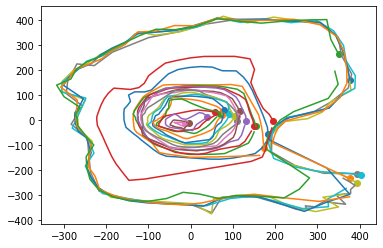

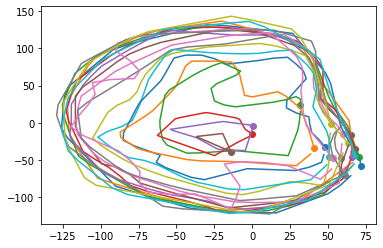

Moving to mean
levels skip: 1 [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
max level: 3 26
removing zeroes
recursing level 26! 40 0.0 [13.966597696656738, 14.81500775387763, 14.588712283914935, 14.494064801933714, 14.533637531150358, 14.70634700785602, 15.00759746823231, 15.429861899768156, 15.963540075677024, 16.597888488418622, 17.321850646643362, 18.124691291154793, 18.99641218754512, 19.927976179807256, 20.911387095819972, 21.939674175882608, 23.006821002497524, 24.10766764667278, 25.2378046412186, 26.393469720341844, 27.571453020711242, 26.536535623647797, 25.13987585398213, 23.74321608431646, 22.346556314650794, 20.94989654498509, 19.553236775319423, 18.156577005653755, 16.759917235988084, 15.363257466322416, 13.966597696656748, 12.56993792699108, 11.173278157325381, 9.776618387659711, 8.379958617994042, 6.983298848328374, 5.5866390786627065, 4.189979308997005, 2.793319539331337, 1.3966597696656684, 0.0, 1.3966597696656662, 2.793319539

setting old z_max to z_out: 1.75 2.0999999999999996
setting old z_max to z_out: 2.0999999999999996 2.4499999999999997
setting old z_max to z_out: 2.4499999999999997 2.8
setting old z_max to z_out: 2.8 3.15
setting old z_max to z_out: 3.15 3.5
setting old z_max to z_out: 3.5 3.8499999999999996
setting old z_max to z_out: 3.8499999999999996 4.199999999999999
setting old z_max to z_out: 4.199999999999999 4.55
setting old z_max to z_out: 4.55 4.8999999999999995
setting old z_max to z_out: 4.8999999999999995 5.25
setting old z_max to z_out: 5.25 5.6
setting old z_max to z_out: 5.6 5.949999999999999
setting old z_max to z_out: 5.949999999999999 6.3
setting old z_max to z_out: 6.3 6.6499999999999995
setting old z_max to z_out: 6.6499999999999995 7.0
setting old z_max to z_out: 7.0 7.35
setting old z_max to z_out: 7.35 7.699999999999999
Wrote meta (for AFM-C HUVEC 20200626 Group #1, Cell #2) to export_contours/test_reply5/file.txt


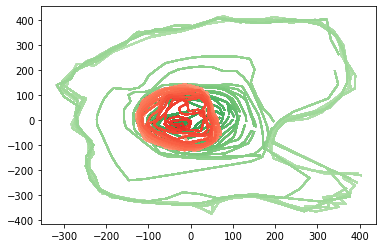

In [817]:
annotation_folder = 'datasets/SR1/Export - Original Channel tiff Stack/annotation'

tags = ['nucleus_linear3D', 'cyto_linear3D', 'other_linear3D']

envelope_nucleus = convert_annotated(annotation_folder, 'nucleus_linear3D')
envelope_cyto = convert_annotated(annotation_folder, 'cyto_linear3D')
envelope_other = convert_annotated(annotation_folder, 'other_linear3D')

ee = deepcopy(envelope_cyto)
ne = deepcopy(envelope_nucleus)
cyto_padded = reparam_contour3(ee, ne, doPlot=False, padding=0, npts=51)
nuc_padded = reparam_contour3(ne, None, doPlot=False, padding=0, npts=51)

cyto_contour,moved = confocal.heal_contour(cyto_padded)
# # print(res.keys())
nucleus_contour, moved = confocal.heal_contour(nuc_padded, move_to_mean=moved)

# Export (note: these are the wrong scalings)
cyto_meta = confocal.export_contours(cyto_contour, ncvar='NCY', filen='C_Cyto_Z', scaling=(0.397, 0.397, 0.35),
            export_dir='export_contours/test_reply5/', color_range='green', move_to_mean=None)
nuc_meta = confocal.export_contours(nucleus_contour, ncvar='NC', filen='C_Nuc_Z', scaling=(0.397, 0.397, 0.35),
            export_dir='export_contours/test_reply5/', color_range='red', move_to_mean=cyto_meta['move_to_mean'])

meta_fname = 'export_contours/test_reply5/file.txt'
confocal.export_contours_meta('AFM-C HUVEC 20200626 Group #1, Cell #2', meta_fname, cyto_meta, nuc_meta)



In [1025]:
moved

(643.574371750083, 546.6925335555379)

## Export for multiple paddings

In [975]:
reload(confocal)

<module 'confocal' from '/Users/asears/work/confocal/confocal.py'>

In [976]:
annotation_folder = 'datasets/SR1/Export - Original Channel tiff Stack/annotation'
annotation_folder = 'datasets/SR_HUVEC1/HUVEC Cell 1/annotation'

tags = ['nucleus_linear3D', 'cyto_linear3D', 'other_linear3D']

In [1119]:
scaling_json = json.load(open(os.path.join(annotation_folder, 'scaling.json')))
scaling_points = np.array(scaling_json['shapes'][0]['points'])
s0 = scaling_points[0]
ds = [np.sqrt((nex[0]-pre[0])**2+(nex[1]-pre[1])**2) for nex,pre in zip(scaling_points[1:],  scaling_points[0:-1])]
print(scaling_points)
# ds = [nex for nex,pre in zip(scaling_points[1:],  scaling_points[0:-1])]
print(ds, np.mean(ds)/2048.0)
scaling_factor_dots_per_px = np.mean(ds)/2048.0
sf = scaling_factor_dots_per_px
print('sf',sf)
    

[[ 163.72972973 1003.10810811]
 [1074.54054054 1001.75675676]
 [1073.18918919   90.94594595]
 [ 165.08108108   90.94594595]]
[910.8118132964248, 910.8118132964248, 908.1081081081081] 0.4442922745281506
sf 0.4442922745281506


100%|██████████| 27/27 [00:00<00:00, 424.42it/s]


Adding cyto layer 39
Adding cyto layer 40
Adding cyto layer 41
Adding cap layer
Moving to mean


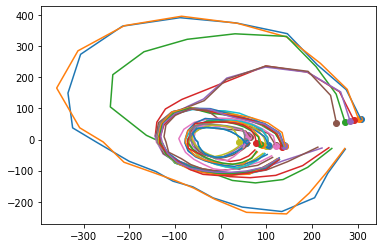

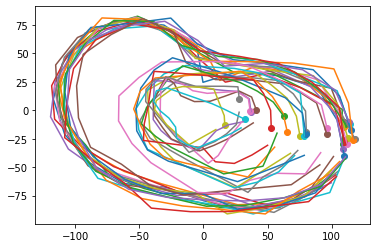

Moving to mean
levels skip: 3 [12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42]
max level: 12 42
removing zeroes
levels skip: 3 [12, 15, 18, 21, 24, 27, 30, 33, 36, 39]
max level: 12 39
removing zeroes
Wrote meta (for SRH1) to export_contours/test_reply16/25/file.txt
Adding cyto layer 39
Adding cyto layer 40
Adding cyto layer 41
Adding cap layer
Moving to mean


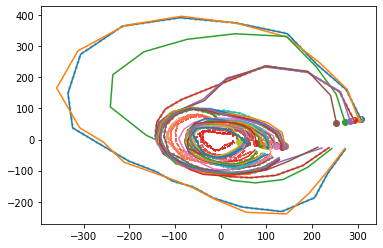

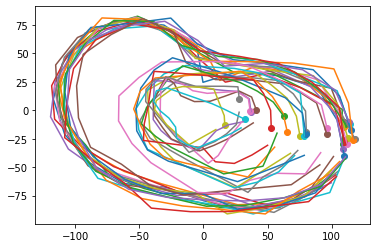

Moving to mean
levels skip: 3 [12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42]
max level: 12 42
removing zeroes
levels skip: 3 [12, 15, 18, 21, 24, 27, 30, 33, 36, 39]
max level: 12 39
removing zeroes
Wrote meta (for SRH1) to export_contours/test_reply16/25/file.txt
Adding cyto layer 39
Adding cyto layer 40
Adding cyto layer 41
Adding cap layer
Moving to mean


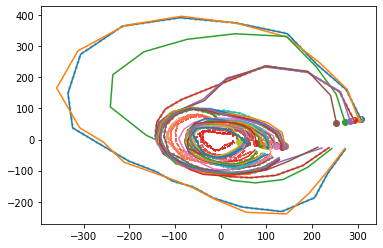

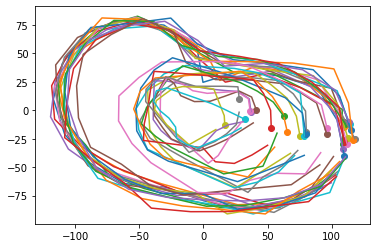

Moving to mean
levels skip: 3 [12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42]
max level: 12 42
removing zeroes
levels skip: 3 [12, 15, 18, 21, 24, 27, 30, 33, 36, 39]
max level: 12 39
removing zeroes
Wrote meta (for SRH1) to export_contours/test_reply16/25/file.txt


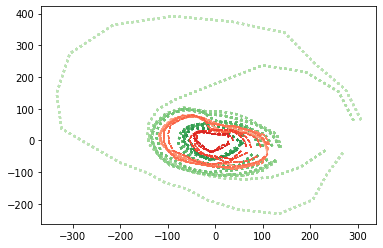

In [1085]:
envelope_nucleus = convert_annotated(annotation_folder, 'nucleus_linear3D')
envelope_cyto = convert_annotated(annotation_folder, 'cyto_linear3D')
# envelope_other = convert_annotated(annotation_folder, 'other_linear3D')

NNN = 21

ii = 25
for ztop in [2.8, 2.9, 3.0]:
    ee = deepcopy(envelope_cyto)
    ne = deepcopy(envelope_nucleus)
    
    cyto_padded = reparam_contour3(ee, ne, doPlot=False, padding=ii, npts=NNN)
    nuc_padded = reparam_contour3(ne, None, doPlot=False, padding=ii, npts=NNN)

    for n in list(sorted(nuc_padded.keys())):
        if n not in envelope_cyto:
            cyto_padded[n] = deepcopy(nuc_padded[n])
            print('Adding cyto layer', n)        
                    
    if False:
        min_ne = min(nuc_padded.keys())
        if min_ne-1 not in cyto_padded: 
            print('Adding bottom layer')
            cyto_padded[min_ne-1] = deepcopy(nuc_padded[min_ne])

    cyto_padded = reparam_contour3(cyto_padded, nuc_padded, doPlot=False, padding=ii, npts=NNN)
    nuc_padded = reparam_contour3(nuc_padded, None, doPlot=False, padding=ii, npts=NNN)

    max_ne = max(nuc_padded.keys())
    if max_ne+1 not in cyto_padded: 
        print('Adding cap layer')
        cyto_padded[max_ne+1] = deepcopy(cyto_padded[max_ne])


    ii = 'None' if ii is None else ii
    cyto_contour,moved = confocal.heal_contour(cyto_padded)
    # # print(res.keys())
    nucleus_contour, moved_nuc = confocal.heal_contour(nuc_padded, move_to_mean=moved)
    max_height = max([_ for _ in cyto_contour])

    # deletion is not the proper strategy -- we need invis cyto to cover nucleus
#     for n in list(nucleus_contour.keys()):
#         if int(n) >= max_height:
#             print('Deleting nucleus layer', n, max_height)
#             del nucleus_contour[n]

    export_base = 'export_contours/test_reply16/'
    
    os.makedirs(export_base+str(ii)+'/', exist_ok=True)
    # Export
    cyto_meta = confocal.export_contours(cyto_contour, ncvar='NCY', filen='C_Cyto_Z', scaling=(0.03237/sf, 0.03237/sf, 0.1),
                export_dir=export_base+str(ii)+'/', color_range='green', move_to_mean=None, skip_z=3, linestyle='dotted')
    nuc_meta = confocal.export_contours(nucleus_contour, ncvar='NC', filen='C_Nuc_Z', scaling=(0.03237/sf, 0.03237/sf, 0.1),
                export_dir=export_base+str(ii)+'/', color_range='red', move_to_mean=cyto_meta['move_to_mean'], skip_z=3, linestyle='dashed', linewidth=1)

    meta_fname = export_base+'{}/file.txt'.format(str(ii))
    confocal.export_contours_meta('SRH1', meta_fname, cyto_meta, nuc_meta)
    time.sleep(1)
#     break



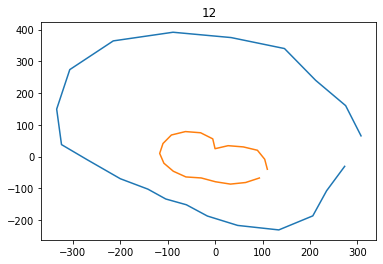

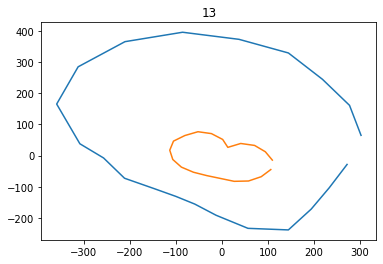

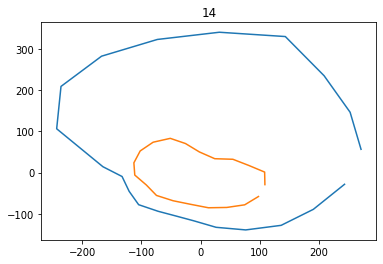

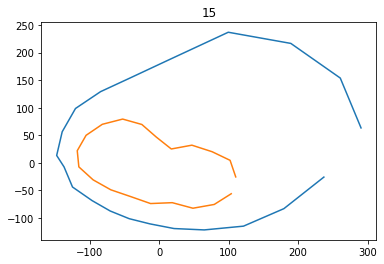

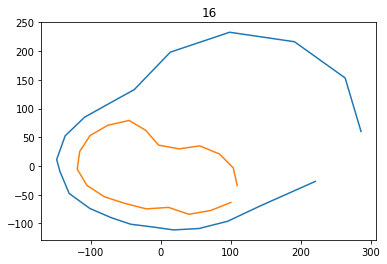

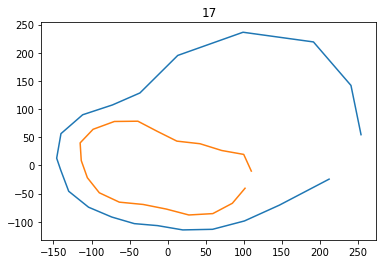

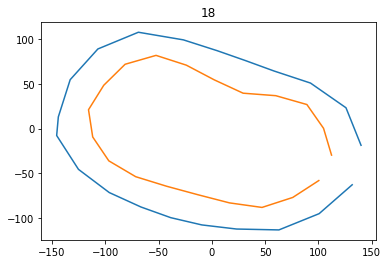

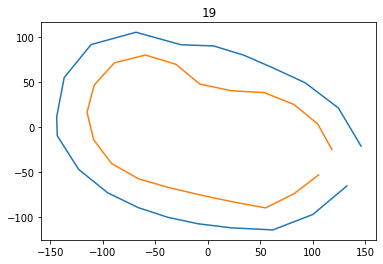

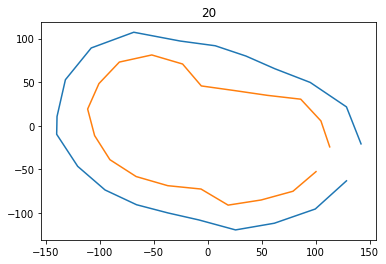

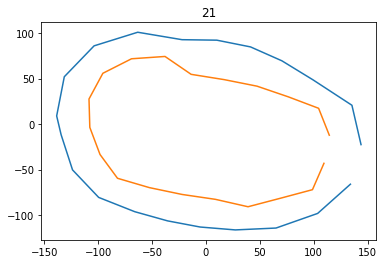

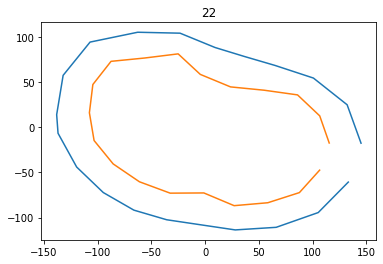

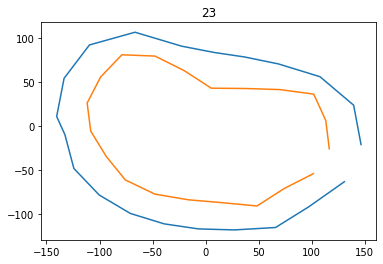

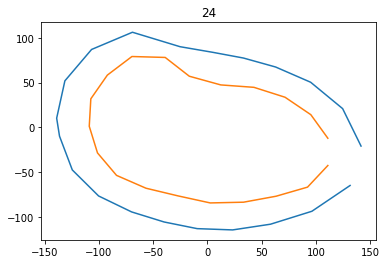

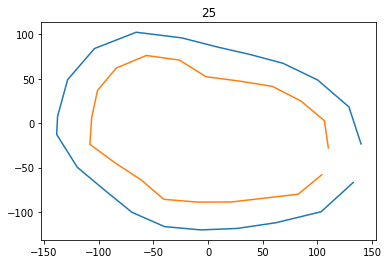

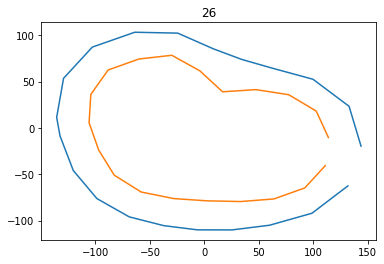

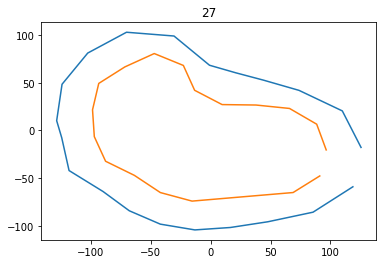

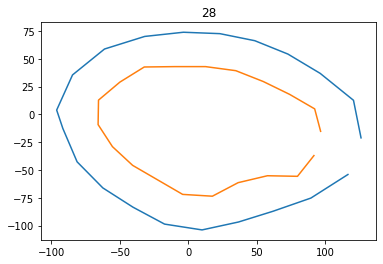

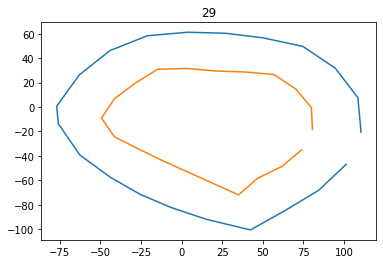

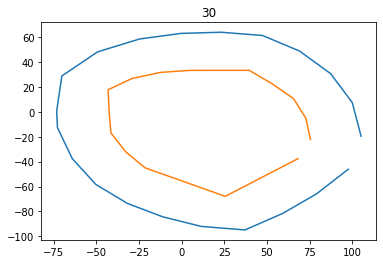

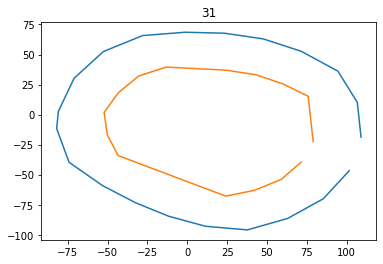

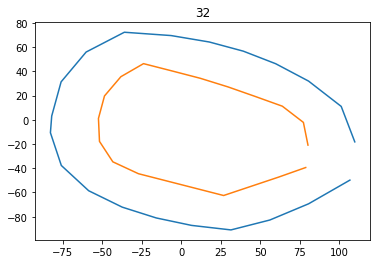

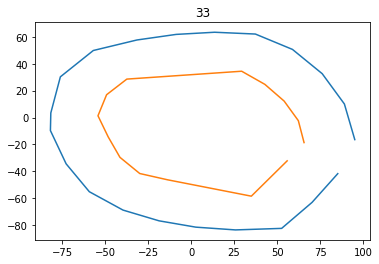

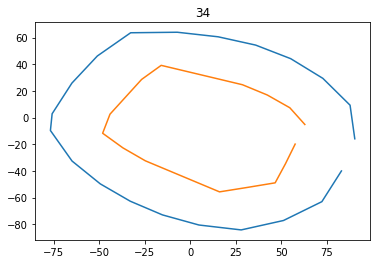

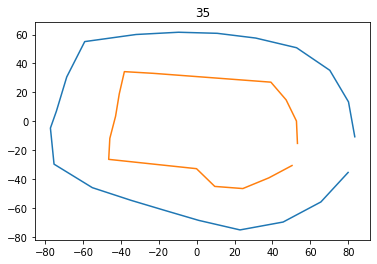

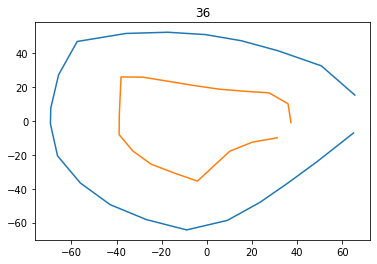

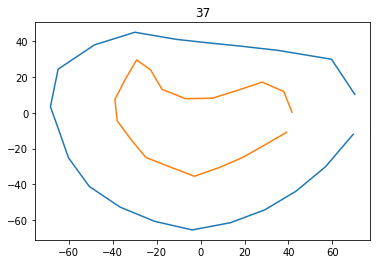

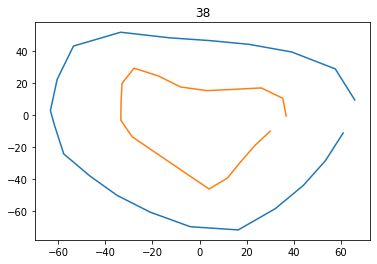

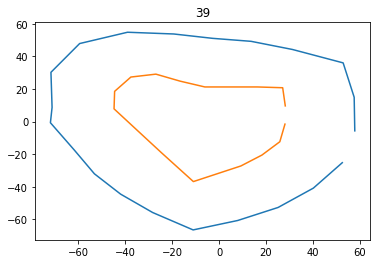

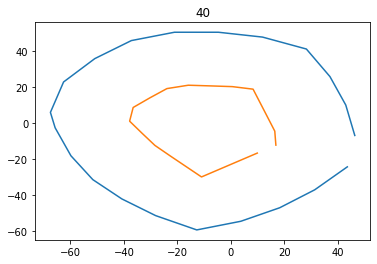

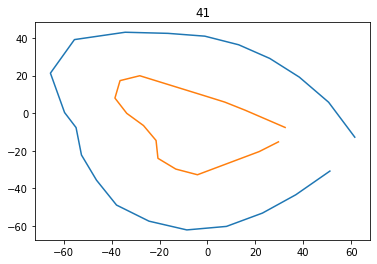

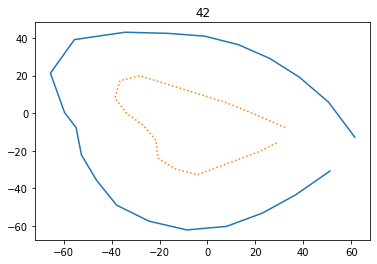

In [1007]:
for lev in cyto_contour:
    plt.plot(cyto_contour[lev][0],cyto_contour[lev][1])
    if lev in nucleus_contour:
        plt.plot(nucleus_contour[lev][0],nucleus_contour[lev][1])
    elif lev not in nucleus_contour and lev-1 in nucleus_contour:
#         print('lev special:', lev)
#         pass
        plt.plot(nucleus_contour[lev-1][0],nucleus_contour[lev-1][1], linestyle=':')

    plt.title(lev)
    plt.show()
    

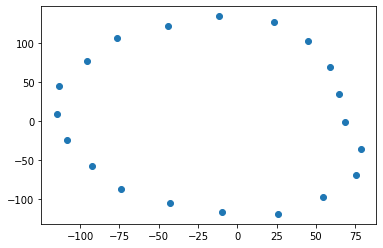

In [802]:
def find_zeroes(lev):
    for n, (xx, yy) in enumerate(lev.T):
        dd = lev.T - [[xx, yy]]
        dists = np.sqrt(dd.T[0] ** 2 + dd.T[1] ** 2)
        dists = [d for nn, d in enumerate(dists) if nn != n]
        mind, argd = np.min(dists), np.argmin(dists)
        if mind < 1e-3:
            print('XX:', xx)
            newx = [_ for nn,_ in enumerate(lev[0]) if nn != argd]
            newy = [_ for nn,_ in enumerate(lev[1]) if nn != argd]
            print('recursing!', argd, mind, dists)
            return find_zeroes(np.array([newx, newy]))
    return lev

r1 = find_zeroes(nucleus_contour[10])
plt.scatter(r1[0], r1[1])


In [1012]:
cyto_contour.keys(), nucleus_contour.keys(), len(list(cyto_contour.keys()))


(dict_keys([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]),
 dict_keys([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]),
 31)

### Convert tip to contour etc

In [1120]:
print(scaling_points)

def tip_to_realspace(tip,CoM, debug=False):
    x,y = tip
    # mirror the axes:
    x = 2048 - x
    y = 2048 - y
    
    if debug: print('Mirrored:', x,y)
    
    x *= np.mean([910.8118132964248, 910.8118132964248, 908.1081081081081])/2048.0
    y *= np.mean([910.8118132964248, 910.8118132964248, 908.1081081081081])/2048.0
    
    # add the annotation offset
    x += (163.72972973+165.08108108)/2.0
    y += (90.94594595+90.94594595)/2.0
    
    if debug: print('On annotation graph:', x,y)

    
    # move to CoM
    x -= CoM[0]
    y -= CoM[1]
    if debug: print('After CoM shift:', x,y)


    # scale from annotation to real micron space
    annotation_scaling = np.mean([910.8118132964248, 910.8118132964248, 908.1081081081081])/2048.0
    scaling_factor = 0.03237/annotation_scaling
    
    x_real = x*scaling_factor
    y_real = y*scaling_factor
    
    # real space (for ansys) and contour space (for plotting)
    return (x_real, y_real)



[[ 163.72972973 1003.10810811]
 [1074.54054054 1001.75675676]
 [1073.18918919   90.94594595]
 [ 165.08108108   90.94594595]]


In [5]:
all_tips = np.load(os.path.join('datasets/SR_HUVEC1/Overlay Images HUVEC/','centered_all.npy'), allow_pickle=True)
print(all_tips)

[[[None None None]
  [773 1250 60]
  [1220 1060 60]
  [1175 400 60]
  [1122 1367 60]
  [1045 967 60]
  [1165 1182 60]
  [773 1260 60]]

 [[None None None]
  [1010 995 60]
  [1037 1050 60]
  [1120 745 60]
  [1005 1190 60]
  [1010 1335 120]
  [1125 925 80]
  [900 1257 60]]]


In [1137]:
# Tip from image:
# (773, 1250, 60), (1010, 995, 60)
# tip_xy = (773, 1250) # cyto
tip_xy = (1010, 995) # nuc position  
# tip_xy = (2048, 2048)
# tip_xy = (0,0)
# with different axes origins of annotation space:
print('move',cyto_meta['move_to_mean'])
tip_to_realspace(tip_xy, moved, debug=True)

move (6.8107322137373655e-15, -2.794146549225586e-15, 12)
Mirrored: 1038 1053
On annotation graph: 625.5807863652203 558.7857110281426
After CoM shift: -18.27584964359164 11.90892531184079


(-1.3315317120725179, 0.8676538721131002)

(1100, 1101, 4)


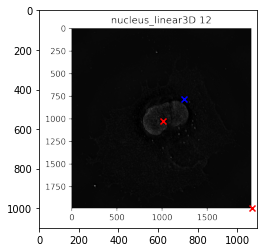

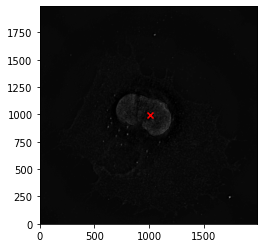

In [1122]:
timg = imageio.imread(os.path.join('datasets/SR_HUVEC1/HUVEC Cell 1/annotation/','nucleus_linear3D_12.png'))
plt.imshow(timg)
print(timg.shape)
plt.scatter(625.5807863652203, 558.7857110281426, marker='x', color='red')
plt.scatter(1074.3159836386526, 1000.8565241836525, marker='x', color='red')
plt.scatter(730.878055428392, 445.4911810234642, marker='x', color='blue')

plt.show()
timg = imageio.imread(os.path.join('datasets/SR_HUVEC1/HUVEC Cell 1/Intensity.png.export/','Intensity_Z012.png'))
plt.scatter(2048-1038, 2048-1053, marker='x', color='red')
plt.imshow(timg[::-1,::-1,0], origin='lower')

In [1096]:
import matplotlib.image as mpimg
img=mpimg.imread(os.path.join('datasets/SR_HUVEC1/HUVEC Cell 1/annotation/','nucleus_linear3D_12.png'))
img.shape


(1100, 1101, 4)

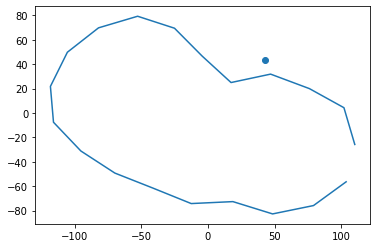

In [1083]:
plt.plot(nucleus_contour[15][0],nucleus_contour[15][1])
plt.scatter(43,43)

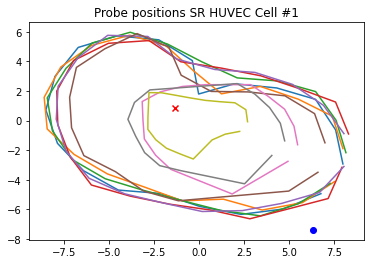

In [1146]:
for layer in range(1,10):
    output_contour = open(os.path.join('export_contours/test_reply16/25_2p8','C_Nuc_Z%02d.txt' % layer)).readlines()
    extracted = []
    for o in output_contour:
        if o[0]=='k':
            line = o.strip().split(',')[2:-1]
    #         print(line)
            extracted.append(np.array(line,dtype=np.float))
    extracted = np.array(extracted)
    plt.plot(extracted.T[0],extracted.T[1])
plt.scatter(6.340158287927484, -7.3866961278869, marker='o', color='blue')
plt.scatter(-1.3315317120725179, 0.8676538721131002, marker='x',color='red')
plt.title('Probe positions SR HUVEC Cell #1')
plt.savefig(os.path.join('export_contours/test_reply16/','probe_positions.png'),dpi=300,bbox_inches='tight')

In [10]:
import json

In [14]:
corners = json.load(open('datasets/SR_HUVEC1/HUVEC Cell 5/annotation/corners.json'))

In [26]:
for _ in corners['shapes']:
    print(np.mean(_['points'],axis=0), _['label'])
    
# print(corners)

[1071.2027027    92.63513514] xzero
[1075.25675676  999.39189189] xy
[160.39189189  95.67567568] zerozero
[169.17567568 999.72972973] zeroy


# Probe point chain of custody

In [43]:
from importlib import reload
import contour
reload(contour)

<module 'contour' from '/Users/asears/work/confocal/contour.py'>

In [46]:
celln = 3

# Part zero: tips
all_tips = np.load(os.path.join('datasets/SR_HUVEC1/Overlay Images HUVEC/', 'centered_all.npy'), allow_pickle=True)
tip_list1 = contour.tip_to_realspace(all_tips[0][celln], None, debug=False)
tip_list2 = contour.tip_to_realspace(probe_info[1][celln], None, debug=False)



# Part one:
img_1 = imageio.imread(os.path.join('datasets/SR_HUVEC1/Overlay Images HUVEC/','Cell %d Nucleus.png' % celln))
plt.imshow(img_1)




# Part two: 

ValueError: too many values to unpack (expected 2)

100%|██████████| 34/34 [00:00<00:00, 1064.89it/s]

orig: [1037 1050 60]
transformed [625.27001953125 556.552734375 60]


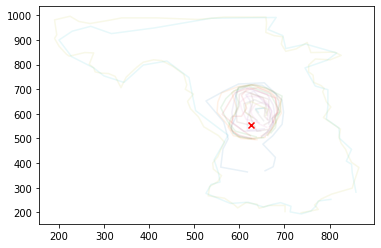

In [294]:
# What are all transformations necessary?
# 1) Find the probe in the overlay picture
#    . How is the overlay image related to contour drawing image?
#    . Find both and compare

reload(contour)
reload(confocal)

cell_n = 2
view_type = 1 # 1 for nuc, 0 for cyto

all_xy_mirror = [[None,1,0,0,0,0,0,0],[None,1,0,0,0,0,0,0]]

mirror_x = all_xy_mirror[0][cell_n]
mirror_y = all_xy_mirror[1][cell_n]

annotation_folder = 'datasets/SR_HUVEC1/HUVEC Cell %d/annotation/' % cell_n
loaded_nuc = contour.convert_annotated(annotation_folder, 'nucleus_linear3D')
loaded_cyto = contour.convert_annotated(annotation_folder, 'cyto_linear3D')
for lev in list(loaded_nuc.keys())[::3]:
#     print(loaded_nuc[lev])
    cur_contour = loaded_nuc[lev]
    plt.plot(cur_contour[0],cur_contour[1], alpha=0.1)
for lev in list(loaded_cyto.keys())[::3]:
#     print(loaded_cyto[lev])
    cur_contour = loaded_cyto[lev]
    plt.plot(cur_contour[0],cur_contour[1],alpha=0.1)

probe_pickle = np.load(os.path.join('datasets/SR_HUVEC1/Overlay Images HUVEC/','centered_all.npy'),allow_pickle=True)
probe_orig = np.array(probe_pickle[view_type][cell_n]) #  1 for nuc, 0 for cyto
probe_pred = np.array(probe_orig)
# need to flip the axis and account for 
# 165, 90 is top left
# 165 or 1074 for x
# 90 or 1000 for y

if mirror_x:
    probe_pred[0] = ((2048-probe_orig[0]) * ((1074-165)/2048)) + 165
else:
    probe_pred[0] = ((2048*0+probe_orig[0]) * ((1074-165)/2048)) + 165

if mirror_y:
    probe_pred[1] = ((2048-probe_orig[1]) * ((1000-90 )/2048)) + 90
else:
    probe_pred[1] = ((2048*0+probe_orig[1]) * ((1000-90 )/2048)) + 90


print('orig:', probe_orig)
print('transformed', probe_pred)
# probe_pred = 
# probe_pred = (700, 800)
plt.scatter(probe_pred[0],probe_pred[1], marker='x', color='r')

plt.show()





#    . Write code to transform probe to outlined contours
#    . Plot outlined contours + probe

Healing: moving to mean
moved (611.2522266683877, 610.1457338324514)


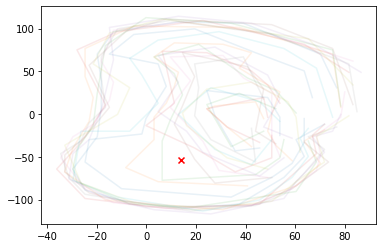

[[ 163.72972973 1003.10810811]
 [1074.54054054 1001.75675676]
 [1073.18918919   90.94594595]
 [ 165.08108108   90.94594595]]
[910.8118132964248, 910.8118132964248, 908.1081081081081] 0.4442922745281506
sf 0.4442922745281506
before scaling [14.01779286286228 -53.592999457451356] after scaling [1.021300573935822 -3.904649015741061]
levels skip: 1 [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
min/max level: 4 37
removing zeroes


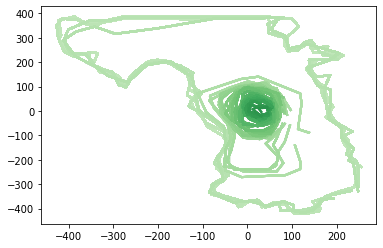

In [295]:
# 2) Transform probe position along with contours, until the end
#    . 
cyto_contour, moved = confocal.heal_contour(loaded_cyto, doPlot=False)
# # print(res.keys())
nucleus_contour, moved = confocal.heal_contour(loaded_nuc, move_to_mean=moved,doPlot=False)

print('moved', moved)
moved_probe = probe_pred[0:2] - moved

for lev in nucleus_contour:
    plt.plot(nucleus_contour[lev][0], nucleus_contour[lev][1], alpha=0.1)
plt.scatter(moved_probe[0], moved_probe[1], marker='x', color='red')
plt.show()

sf = contour.get_scaling_factor(open(os.path.join('datasets/SR_HUVEC1/HUVEC Cell 1/annotation', 'scaling.json')))
print('before scaling', moved_probe, 'after scaling', moved_probe*(0.03237/sf))
# Export
cyto_meta = confocal.export_contours(cyto_contour, ncvar='NCY', filen='C_Cyto_Z', scaling=(0.03237/sf, 0.03237/sf, 0.1))




# 3) Plot at the end


In [296]:
probe_pred

array([625.27001953125, 556.552734375, 60], dtype=object)

In [297]:
reload(contour)

<module 'contour' from '/Users/asears/work/confocal/contour.py'>

In [298]:
nuc_re = contour.load_exported(os.path.join("export_contours/test_HUVEC1_%d/" % cell_n, 'C_Nuc_Z01.txt'))
cyto_re = contour.load_exported(os.path.join("export_contours/test_HUVEC1_%d/" % cell_n, 'C_Cyto_Z01.txt'))
p_c = [float(_.strip()) for _ in open(os.path.join("export_contours/test_HUVEC1_%d/" % cell_n, 'probe_cyto.txt')).readlines()]
p_n = [float(_.strip()) for _ in open(os.path.join("export_contours/test_HUVEC1_%d/" % cell_n, 'probe_nuclear.txt')).readlines()]

Text(0.5, 1.0, 'Confirmation plot: cell #2')

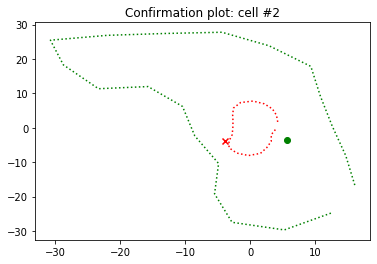

In [299]:
plt.plot(cyto_re.T[0], cyto_re.T[1], color='green', linestyle=':')
plt.scatter(p_c[0], p_c[1], marker='o', color='green')
plt.plot(nuc_re.T[0], nuc_re.T[1], linestyle=':', color='red')
plt.scatter(p_n[0], p_n[1], marker='x', color='red')
plt.title('Confirmation plot: cell #%d' % cell_n)

In [293]:
p_c

[5.599, -3.624]

In [14]:
from skimage import io


In [18]:
im = Image.open('datasets/hTERT/hTERT 7/2021_05_21_hTERT 7_Reconstructed_Sim 405.tif')
iterated = [np.array(_) for _ in ImageSequence.Iterator(im)]

print(np.shape(iterated))

(76, 2048, 2048)


In [3]:
from PIL import Image, ImageSequence

In [7]:
# Show histogram of images
imname = 'datasets/RS/RS HUVEC 3/Intensity.png.export/Intensity_Z%03d.png' % 50
im = Image.open(imname)
imnp = np.array(im)
# from skimage import io
# im = io.imread(fname_tif)
# print(im.shape)


In [8]:
imnp.shape

(2048, 2048, 3)

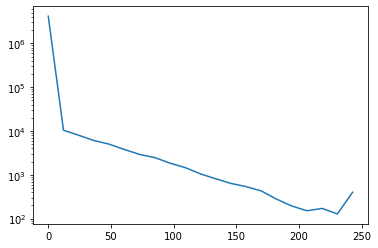

In [31]:
imhist = np.histogram(imnp[:,:,0], bins=21)
imhist[0], imhist[1]
plt.plot(imhist[1][:-1],imhist[0])
plt.yscale('log')

In [29]:
imnp[:,:,0], np.max(imnp[:,:,0])

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 255)

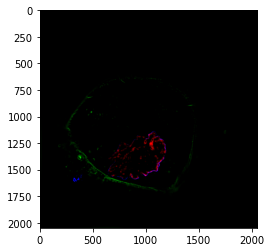

In [33]:
plt.imshow(imnp,vmax=200)

In [34]:
# Count folders with significant number of annotations

In [42]:
check_dirs = ['RS/RS HUVEC %d','hTERT/hTERT %d','Parent/Parent Cell %d']

total_ann = 0
for ch in check_dirs:
    for cell in range(1,9):
        subdir = os.path.join('datasets',ch % cell,'annotation')
        if os.path.isdir(subdir):
            
            globbed = os.path.join(subdir,'*.json')
            print('globbed:', globbed)
            ann = glob.glob(globbed)
            print('Found:', os.path.join('datasets',ch % cell), len(ann))
            total_ann += len(ann)
            
print('Total contours:', total_ann)

globbed: datasets/RS/RS HUVEC 1/annotation/*.json
Found: datasets/RS/RS HUVEC 1 43
globbed: datasets/RS/RS HUVEC 2/annotation/*.json
Found: datasets/RS/RS HUVEC 2 58
globbed: datasets/RS/RS HUVEC 3/annotation/*.json
Found: datasets/RS/RS HUVEC 3 63
globbed: datasets/RS/RS HUVEC 4/annotation/*.json
Found: datasets/RS/RS HUVEC 4 16
globbed: datasets/RS/RS HUVEC 5/annotation/*.json
Found: datasets/RS/RS HUVEC 5 37
globbed: datasets/RS/RS HUVEC 6/annotation/*.json
Found: datasets/RS/RS HUVEC 6 43
globbed: datasets/RS/RS HUVEC 7/annotation/*.json
Found: datasets/RS/RS HUVEC 7 40
globbed: datasets/hTERT/hTERT 1/annotation/*.json
Found: datasets/hTERT/hTERT 1 63
globbed: datasets/hTERT/hTERT 2/annotation/*.json
Found: datasets/hTERT/hTERT 2 40
globbed: datasets/hTERT/hTERT 3/annotation/*.json
Found: datasets/hTERT/hTERT 3 31
globbed: datasets/hTERT/hTERT 4/annotation/*.json
Found: datasets/hTERT/hTERT 4 42
globbed: datasets/hTERT/hTERT 5/annotation/*.json
Found: datasets/hTERT/hTERT 5 42
glob

In [6]:
glob.glob('datasets/hTERT/hTERT 2/annotation/nucleus*.json')

['datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_21.json',
 'datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_37.json',
 'datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_17.json',
 'datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_11.json',
 'datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_07.json',
 'datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_27.json',
 'datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_31.json',
 'datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_29.json',
 'datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_05.json',
 'datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_13.json',
 'datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_33.json',
 'datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_25.json',
 'datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_09.json',
 'datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_35.json',
 'datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_23.json',
 'datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_19

In [8]:
import json

646.3823529411764 456.47058823529403


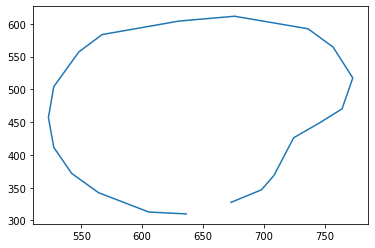

In [34]:
loaded = json.load(open('datasets/hTERT/hTERT 2/annotation/nucleus_linear3D_05.json'))
pts = np.array(loaded['shapes'][0]['points']).T
plt.plot(pts[0], pts[1])
print(np.mean(pts[0]),np.mean(pts[1]))

In [21]:
SCALING_JSON = os.path.join('datasets/hTERT/hTERT 1/annotation', 'scaling.json')

In [27]:
scaling = np.array(json.load(open(SCALING_JSON))['shapes'][0]['points']).T
print(scaling)

[[ 165.64705882  165.64705882 1275.94117647 1277.41176471]
 [  90.88235294 1202.64705882 1202.64705882   92.35294118]]


In [32]:
x0 = np.mean(list(sorted(scaling[0]))[:2])
x1 = np.mean(list(sorted(scaling[0]))[2:4])
y0 = np.mean(list(sorted(scaling[1]))[:2])
y1 = np.mean(list(sorted(scaling[1]))[2:4])

In [33]:
x0,x1,y0,y1

(165.6470588235294, 1276.6764705882351, 91.61764705882352, 1202.6470588235293)

In [43]:
probes_info = np.load('datasets/hTERT/hTERT AFM Coordinate Overlays/centered_all.npy',allow_pickle=True)
print(probes_info.shape) # cyto/nuc, cell_n, (x,y,contrast)
print(probes_info[0][2], probes_info[1][2])

(2, 8, 3)
[997.3538961 1543.09285714 90.0] [827.06103896 724.33571429 90.0]


In [41]:
(x1-x0)-probes_info[0][2][0]+x0

279.3225744882352

In [84]:
def probe_to_labelme_wrong(p,s, mirror_x, mirror_y): # probe, square, mirror_x, mirror_y
    x0 = np.mean(list(sorted(s[0]))[:2])
    x1 = np.mean(list(sorted(s[0]))[2:4])
    y0 = np.mean(list(sorted(s[1]))[:2])
    y1 = np.mean(list(sorted(s[1]))[2:4])
    
    print(x0,x1,y0,y1)
    print('probe:', p)
    
    if mirror_y:
        py = (2048-p[1])*((y1-y0)/2048.0)+y0
    else:
        py = (p[1])*((y1-y0)/2048.0)+y0
        
    if mirror_x:
        px = (2048-p[0])*((x1-x0)/2048.0)+x0
    else:
        px = (p[1])*((x1-x0)/2048.0)+x0
        
    print(p[1],py)
    print('px,py', px, py)
    
def probe_to_labelme(p,s, mirror_x, mirror_y): # probe, square, mirror_x, mirror_y
    x0 = np.mean(list(sorted(s[0]))[:2])
    x1 = np.mean(list(sorted(s[0]))[2:4])
    y0 = np.mean(list(sorted(s[1]))[:2])
    y1 = np.mean(list(sorted(s[1]))[2:4])
    
    print('square pts:', x0,x1,y0,y1)
    print('probe:', p)
    
    py = (2048-p[1])*((y1-y0)/2048.0)+y0
    py = (p[1])*((y1-y0)/2048.0)+y0
#     py = y0+
    
    px = (2048-p[0])*((x1-x0)/2048.0)+x0
    px = (p[0])*((x1-x0)/2048.0)+x0

    print(p[1],py)
    print('Xformed px,py', px, py)
    
cell_n = 2
print('Probes:', probes_info[0][cell_n][:2], probes_info[1][cell_n][:2])
# probe_to_labelme([2048,2048], scaling, 0,0)
probe_to_labelme(probes_info[1][cell_n][:2], scaling, 0,0)

Probes: [997.3538961 1543.09285714] [827.06103896 724.33571429]
square pts: 165.6470588235294 1276.6764705882351 91.61764705882352 1202.6470588235293
probe: [827.06103896 724.33571429]
724.33571429 484.56602721887566
Xformed px,py 614.3233965233513 484.56602721887566


In [76]:
# Where am I? I'm trying to transform the probes at various points, to confirm that they're in 
# the right positioning.

In [77]:
(143+147+174+181)/4.0, (75+114+112+77)/4.0

(161.25, 94.5)

# Smooth_test

[1.04615769 0.96442425 1.02553345 0.96929115 0.95925587 1.03173988
 0.96716614 1.03321224 0.99827066 0.96302032 0.97870639 1.02361075
 1.01506471 1.01582399 0.99120346 0.96118546 1.01185711 1.00244309
 0.99950279 1.03766001 1.03676111 1.00468072 1.04142287 1.04347967
 0.97445118 1.0101153  0.96248716 1.03450151 1.03387127 1.01302055
 0.95157137 0.96748072 1.04914271 0.98913621 1.00901648 1.04803837
 0.97682283 1.01785171 1.04370897 1.0197502  0.99137749 1.04687313
 0.97579593 0.95649238 1.0304109  0.97219403 1.0375493  0.97287084
 0.99890618 1.00026588 0.996613   1.04356054 1.02593521 1.04816649
 0.96147958 0.99894443 1.00070306 0.9697485  0.96090523 0.95682832
 1.02458581 1.00800759 1.01766313 0.95919735 0.97198829 1.03115345
 1.02393124 0.99627462 0.99360231 1.00289238 1.04236261 1.0039118
 1.00413079 0.99795438 0.96503653 1.00727415 1.00474523 0.96872618
 1.03723102 1.03414237 1.03037802 1.01955701 1.02310341 0.97164228
 1.0244964  0.98097995 1.03635139 1.01788359 1.02722972 0.96620

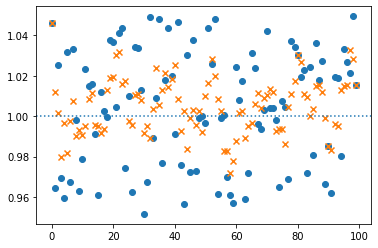

In [110]:
def smooth(r, window=3, hold_edge=False):
    res = np.convolve(r, np.ones(window), 'same') / np.convolve(r * 0 + 1, np.ones(window), 'same')
    if hold_edge:
        res[0] = r[0]
        res[-1] = r[-1]
    return res

test_r =  np.ones(100)*1.0
test_r += (np.random.random(len(test_r))-0.5)/10.0
stest_r = smooth(test_r, window=4, hold_edge=True)

plt.scatter(range(len(test_r)), test_r, marker='o')
plt.scatter(range(len(stest_r)), stest_r, marker='x')
plt.axhline(1.0,linestyle=':')
print(test_r)
print(stest_r)

